In [1]:
# Objective for this Dataset:- we will use various predictive models to see how accurate, 
# they are in detecting whether we can correctly predict which comapnies will face bankrptcy or not.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
plt.rcParams['figure.figsize']=[15,7]

from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support, 
                             roc_auc_score)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier 
import xgboost as XGB
import lightgbm as lgb

In [3]:
data = pd.read_csv("_BANKRUPTCY_PREDICTION.csv")
data.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                               0.780985  ...                     0.716845   
1                               0.781506  ...                     0.795297   
2                               0.780284  ...                     0.774670   
3                               0.781241  ...                     0.739555   
4                               0.781550  ...                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.040003             0.623841                0.601449   
3                    0.003252             0.622929                0.583538   
4                    0.003878             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Equity to Liability  \
0                                           0.564050                0.016469   
1                                           0.570175                0.020794  

In [4]:
# Computing the Descriptive statistics of our numerical features
data.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)  ...  \
count                            6819.000000  ...   
mean                                0.781381  ...   
std                                 0.012679  ...   
min                                 0.000000  ...   
25%                                 0.781567  ...   
50%                                 0.781635  ...   
75%                                 0.781735  ...   
max 

In [5]:
data.shape

(6819, 95)

In [6]:
data.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Bankrupt                                                    0
Length: 95, dtype: int64

In [7]:
# Checking Nan presence

[print(col) for col in data if data[col].isna().sum() > 0]

[]

In [8]:
# find the uniqueness in the dataset
for i in data.columns:
    print("The no.of unique values in",i,"are: ",data.loc[:,i].nunique())

The no.of unique values in  ROA(C) before interest and depreciation before interest are:  3333
The no.of unique values in  ROA(A) before interest and % after tax are:  3151
The no.of unique values in  ROA(B) before interest and depreciation after tax are:  3160
The no.of unique values in  Operating Gross Margin are:  3781
The no.of unique values in  Realized Sales Gross Margin are:  3788
The no.of unique values in  Operating Profit Rate are:  3376
The no.of unique values in  Pre-tax net Interest Rate are:  3789
The no.of unique values in  After-tax net Interest Rate are:  3604
The no.of unique values in  Non-industry income and expenditure/revenue are:  2551
The no.of unique values in  Continuous interest rate (after tax) are:  3617
The no.of unique values in  Operating Expense Rate are:  2966
The no.of unique values in  Research and development expense rate are:  1536
The no.of unique values in  Cash flow rate are:  5557
The no.of unique values in  Interest-bearing debt interest rate 

In [9]:
# check for duplicates
data.duplicated().sum()

0

In [10]:
# Considering the project task, and now that we have a general overview of our data, we need 
# focus our attention on the labels: which are the financially stable and unstable companies? 
# Let's take a look:

print(data['Bankrupt'].value_counts())
print('-'* 30)
print('Financially stable: ', round(data['Bankrupt'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Financially unstable: ', round(data['Bankrupt'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

0    6599
1     220
Name: Bankrupt, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


<AxesSubplot:ylabel='Bankrupt'>

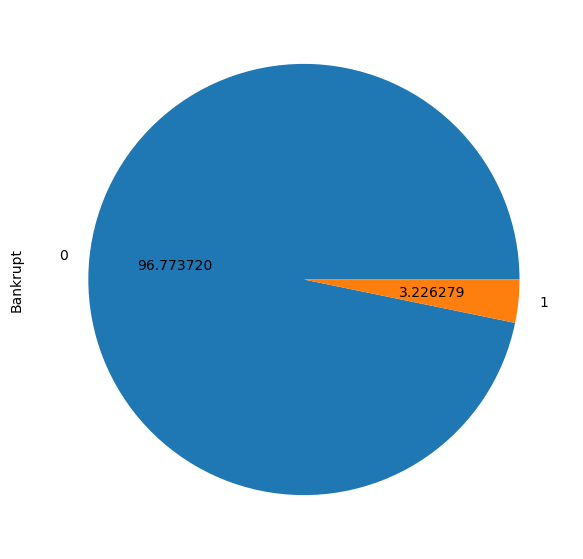

In [11]:
# Checking labels distributions
data['Bankrupt'].value_counts().plot.pie(autopct="%2f")

# we can clearly see how our labels are strongly unbalanced, and this is a the main obstacle that we need to solve to obtain good performances.

In [12]:
# # EDA & Visualisation

# for i in data.columns:
#     plt.figure(figsize=(15,3))
#     sns.distplot(data.loc[:,i],hist=False)
#     plt.grid()
# plt.show()

In [13]:
# Let Find out if our data is skewed or not.
for i in data.columns:
    print("The skewness of",i,"is: ",data.loc[:,i].skew())
    print("------------------------------------------------------------------------------------------------")

The skewness of  ROA(C) before interest and depreciation before interest is:  -0.3239410025682502
------------------------------------------------------------------------------------------------
The skewness of  ROA(A) before interest and % after tax is:  -1.0337268373866921
------------------------------------------------------------------------------------------------
The skewness of  ROA(B) before interest and depreciation after tax is:  -0.7635637203209782
------------------------------------------------------------------------------------------------
The skewness of  Operating Gross Margin is:  -8.04336796118043
------------------------------------------------------------------------------------------------
The skewness of  Realized Sales Gross Margin is:  -8.0665721439936
------------------------------------------------------------------------------------------------
The skewness of  Operating Profit Rate is:  -70.2371643436339
----------------------------------------------------

 ROA(C) before interest and depreciation before interest
-0.3238697397440927


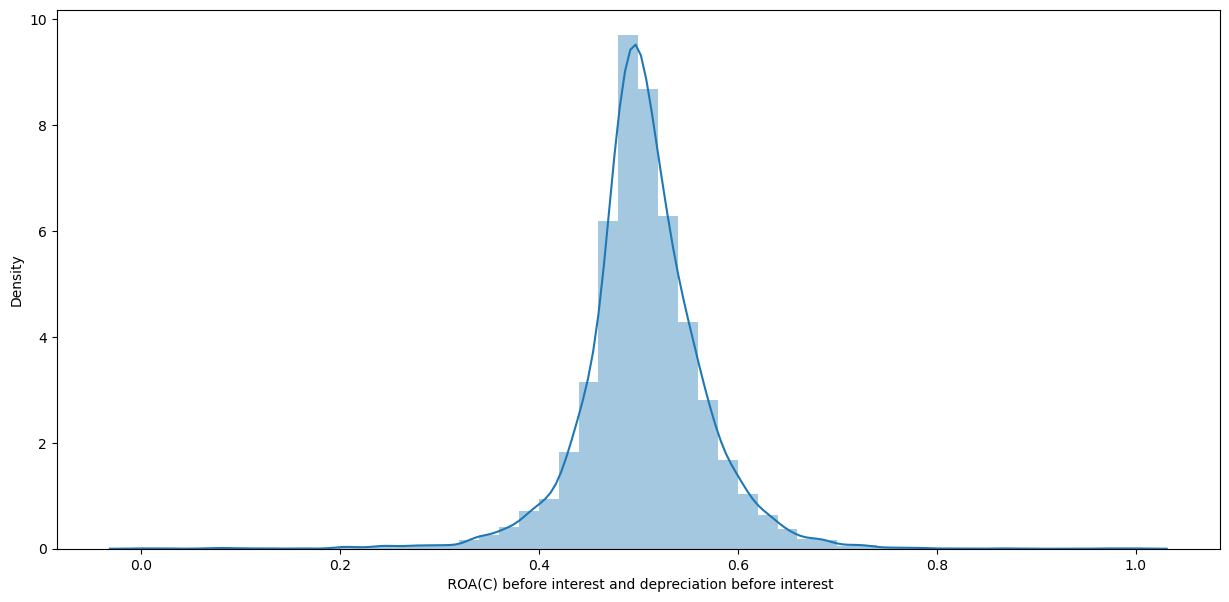

 ROA(A) before interest and % after tax
-1.0334994308736063


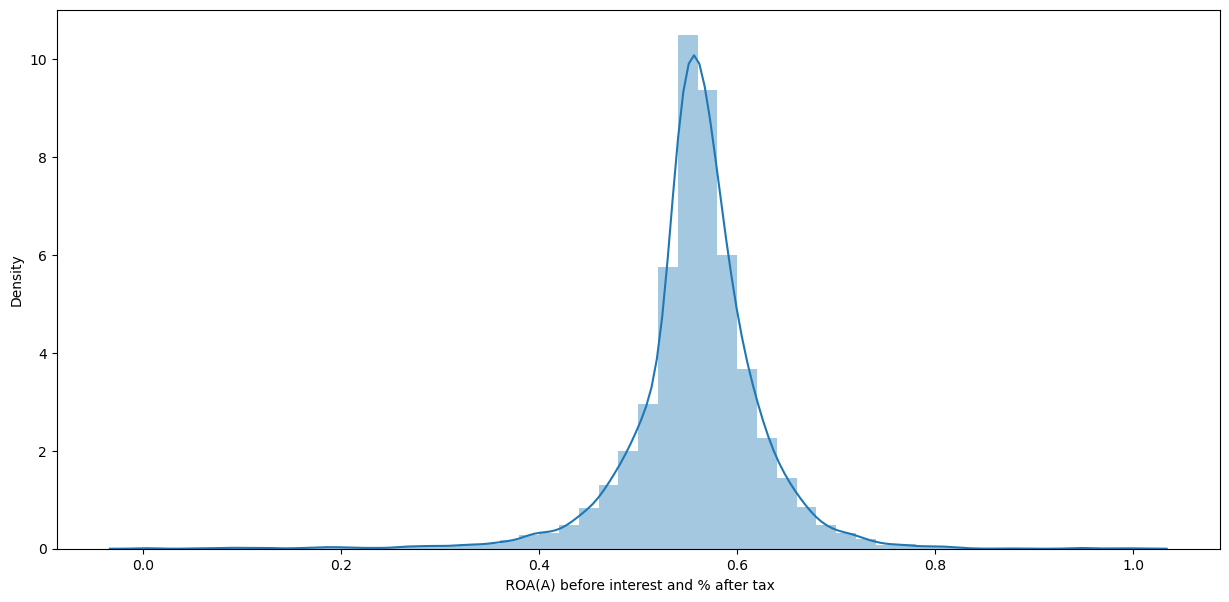

 ROA(B) before interest and depreciation after tax
-0.7633957461938906


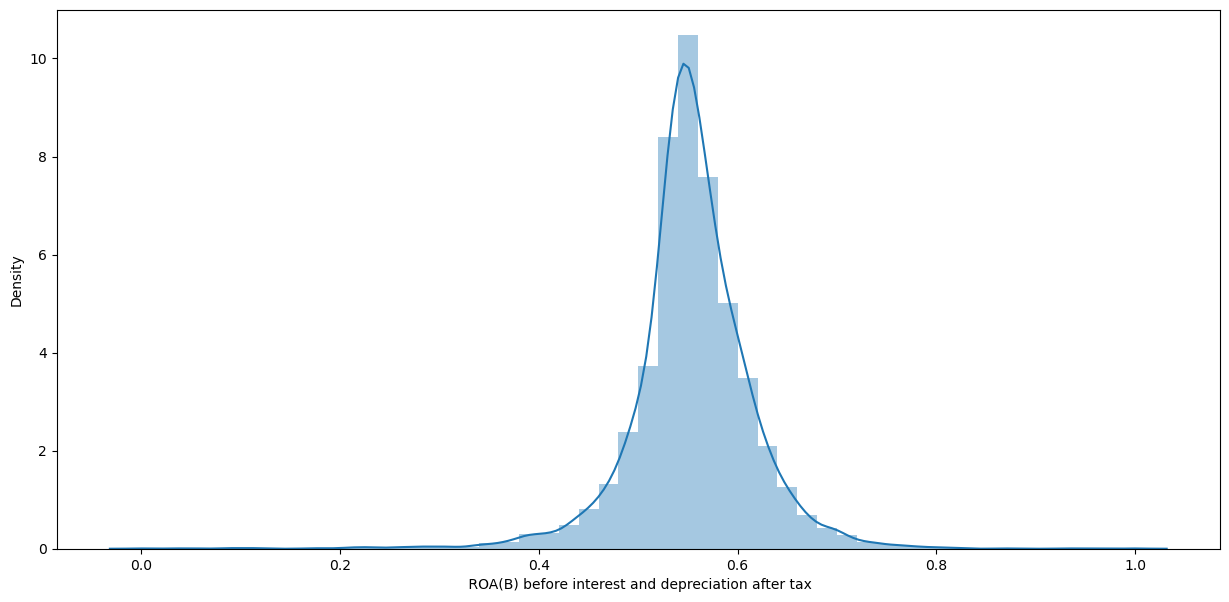

 Operating Gross Margin
-8.041598524424641


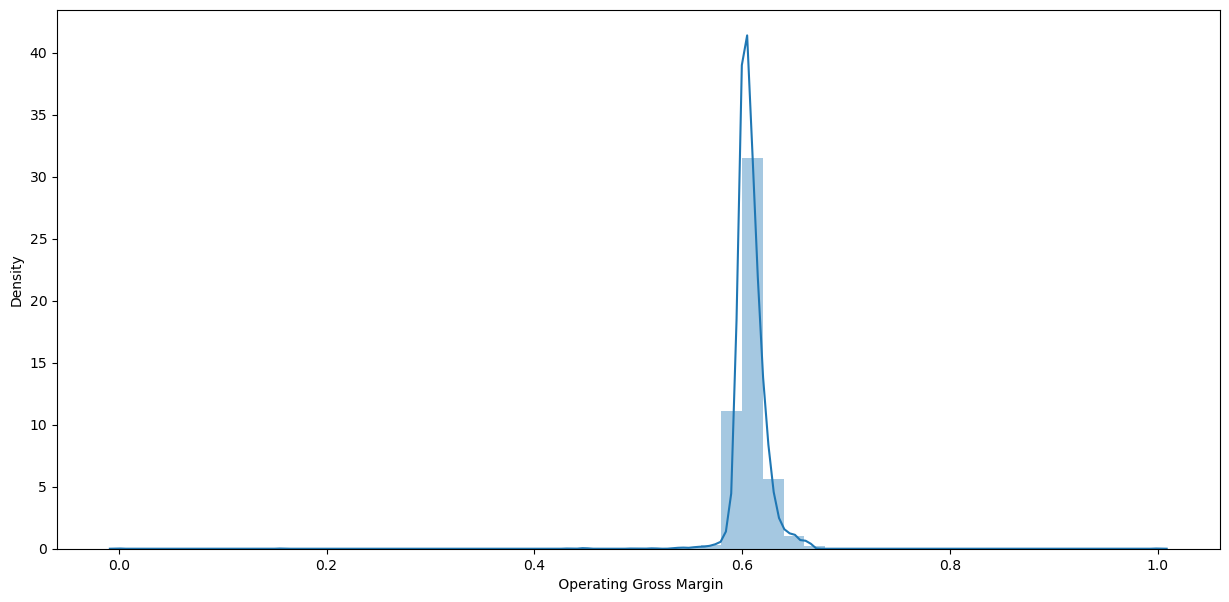

 Realized Sales Gross Margin
-8.064797602618185


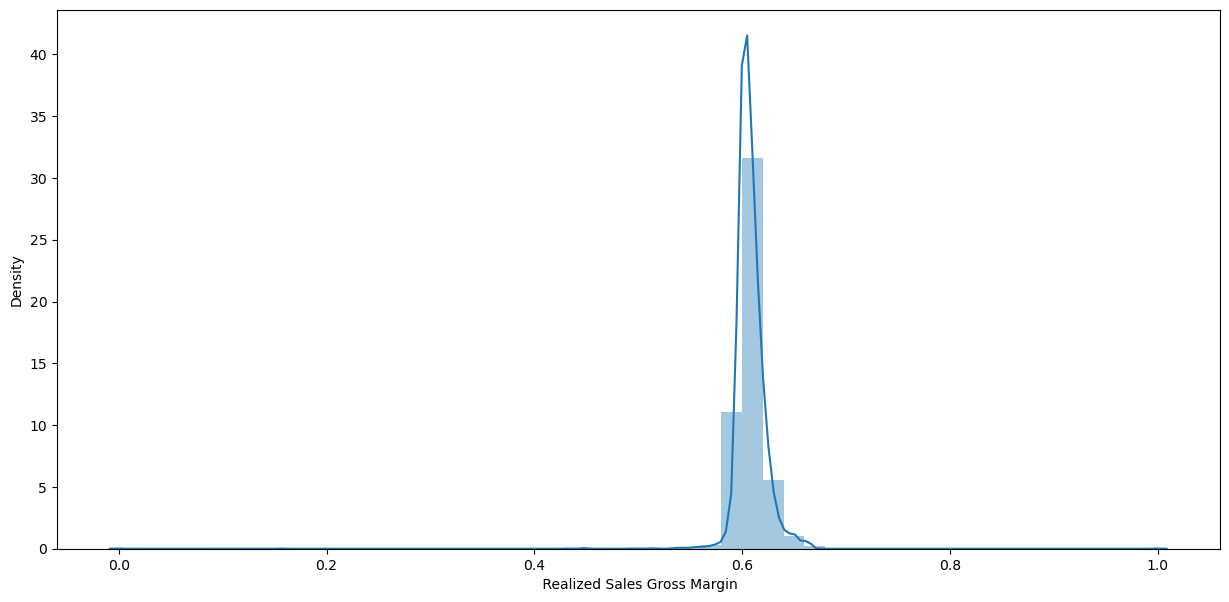

 Operating Profit Rate
-70.22171307734698


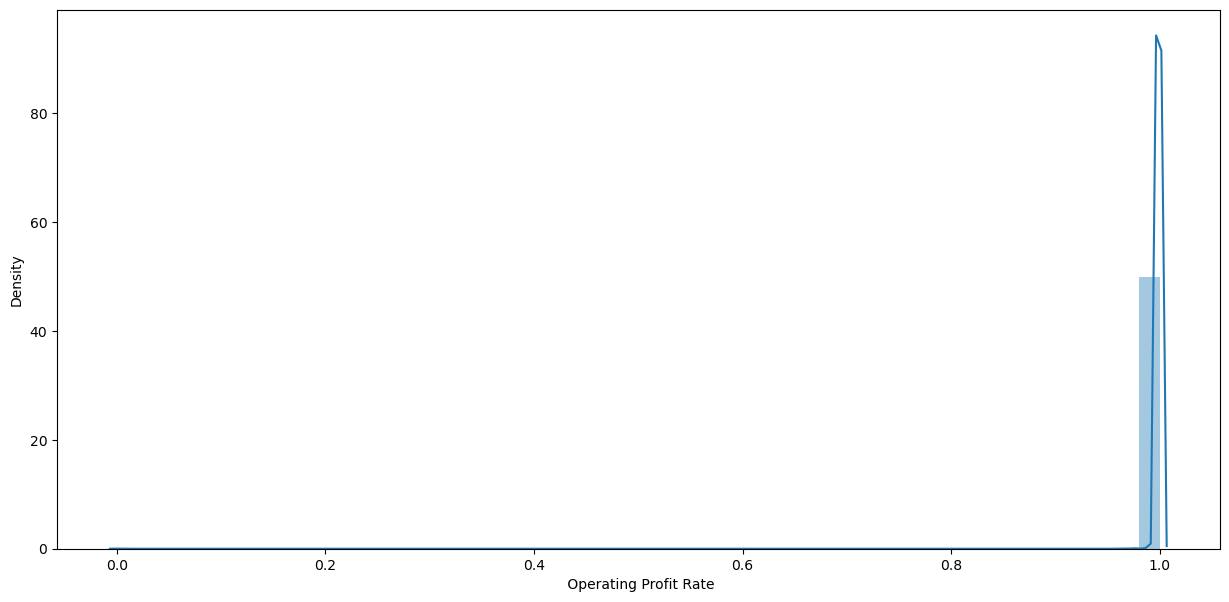

 Pre-tax net Interest Rate
-52.47132097796909


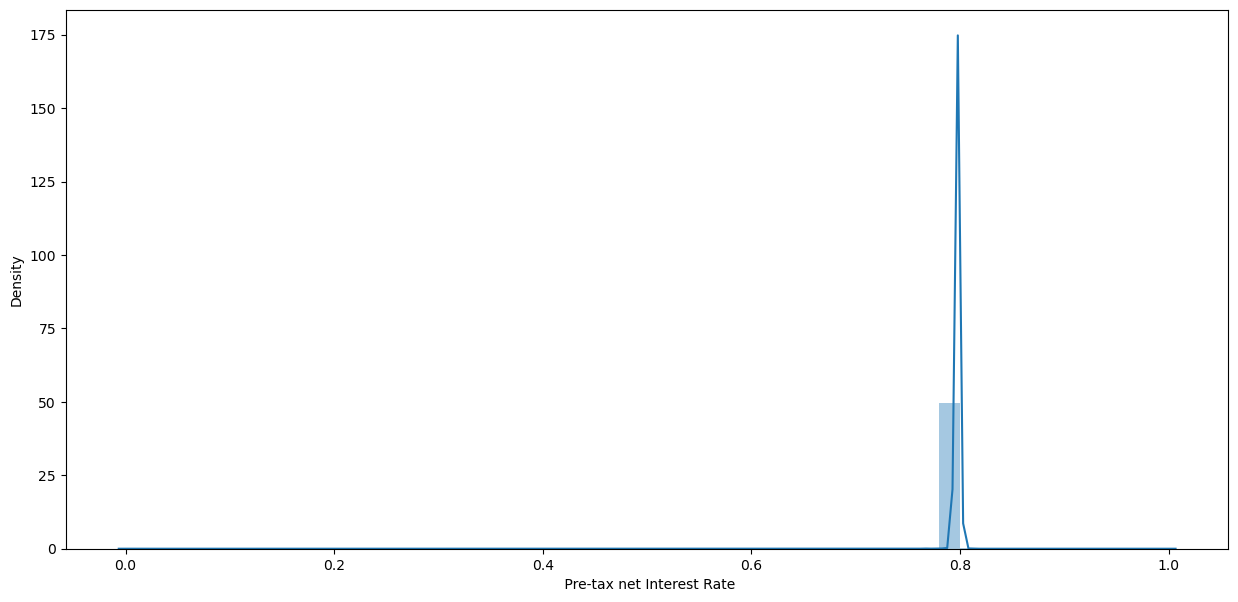

 After-tax net Interest Rate
-52.98408543812865


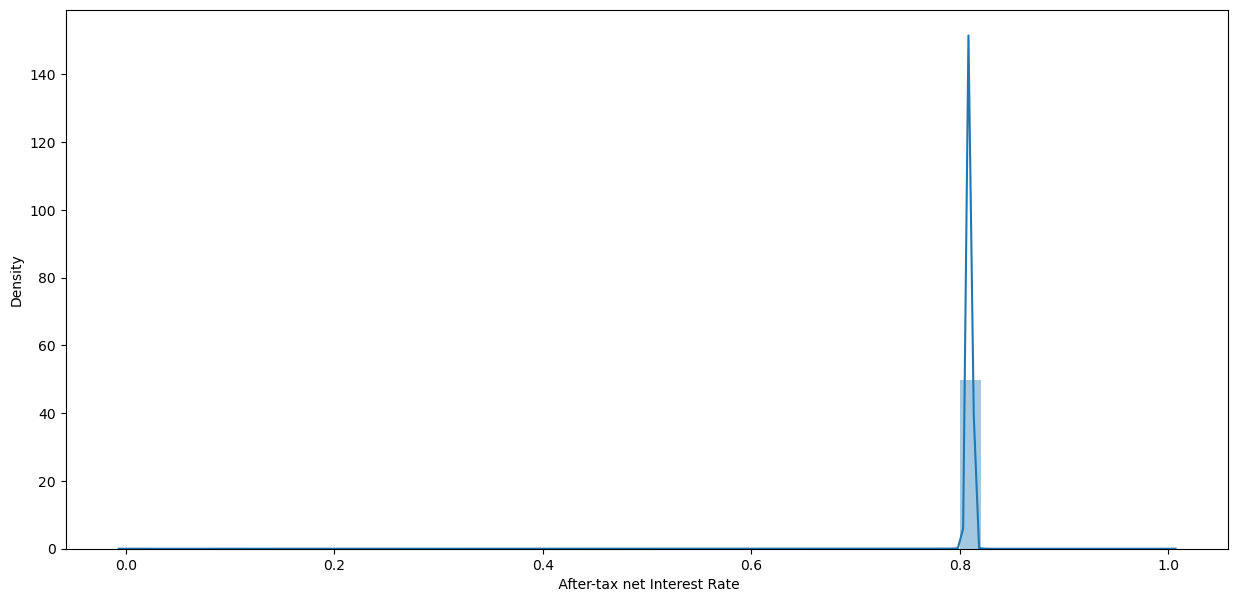

 Non-industry income and expenditure/revenue
39.632968555940295


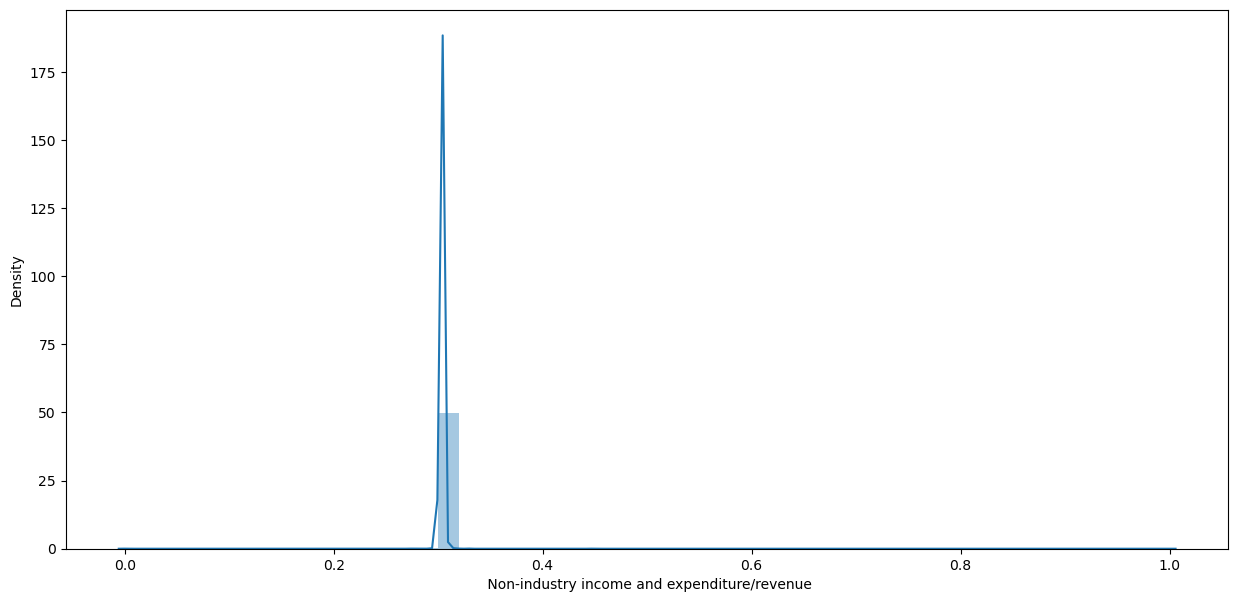

 Continuous interest rate (after tax)
-53.18841745073609


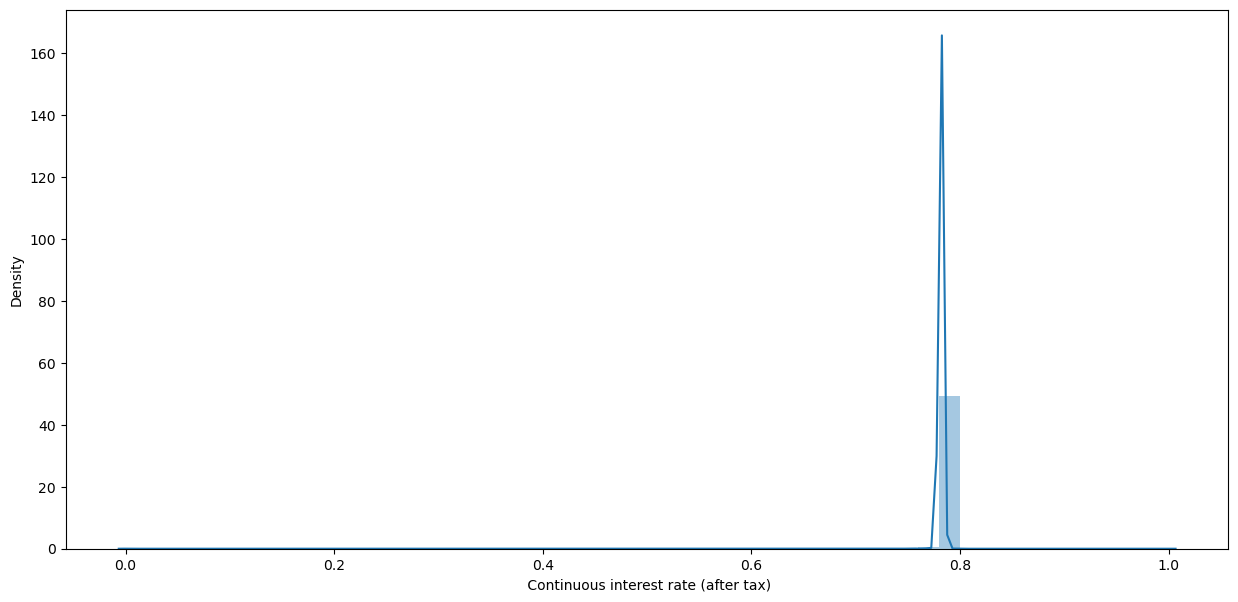

 Operating Expense Rate
1.2483986246061325


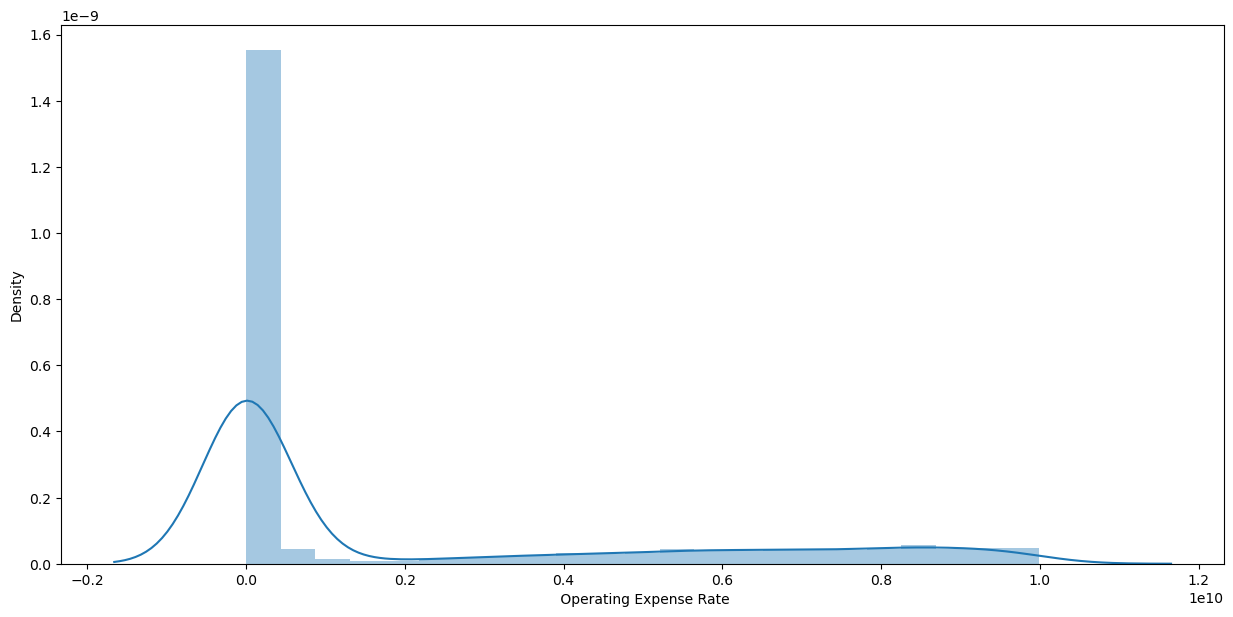

 Research and development expense rate
1.281761198809495


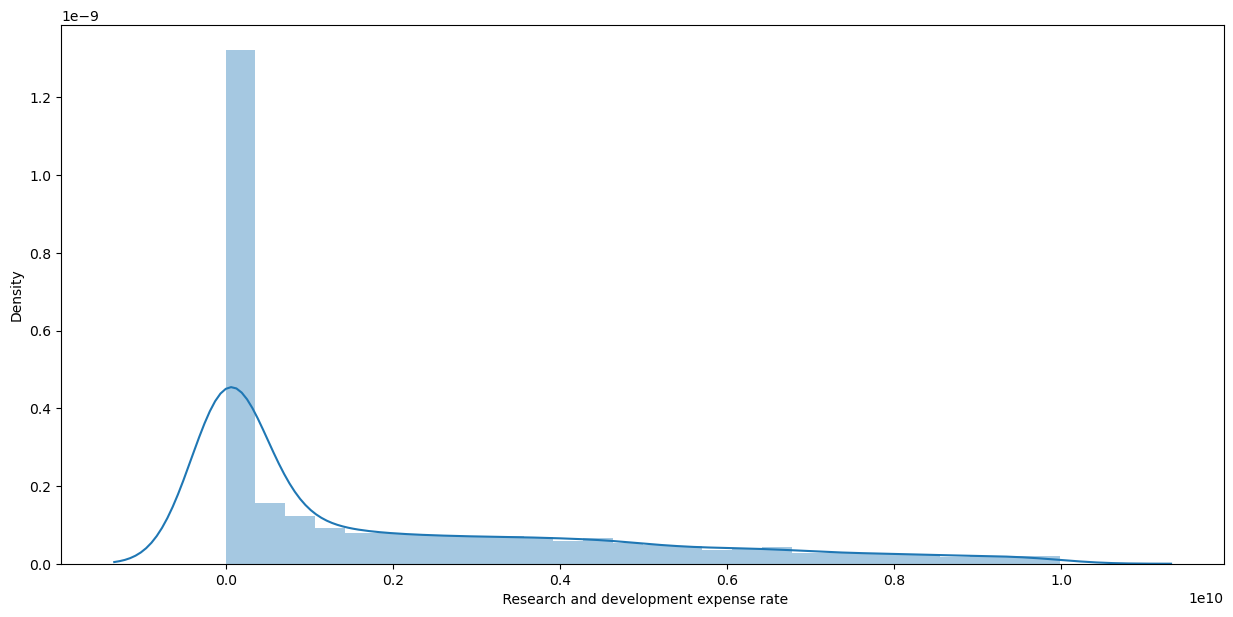

 Cash flow rate
3.9897076662730266


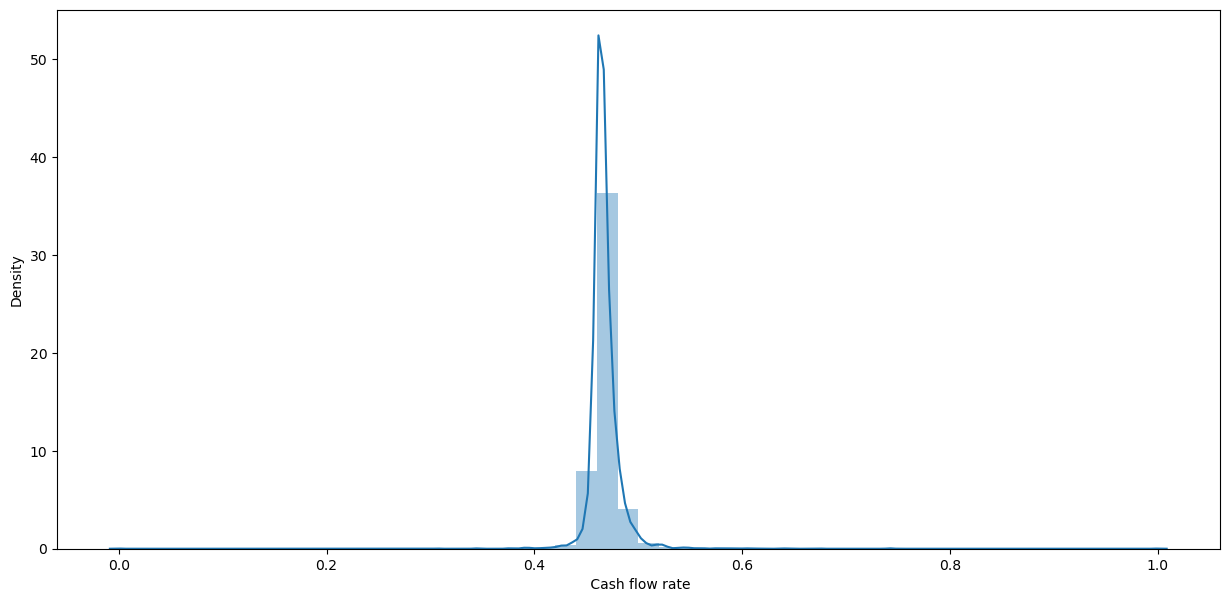

 Interest-bearing debt interest rate
7.031829528591107


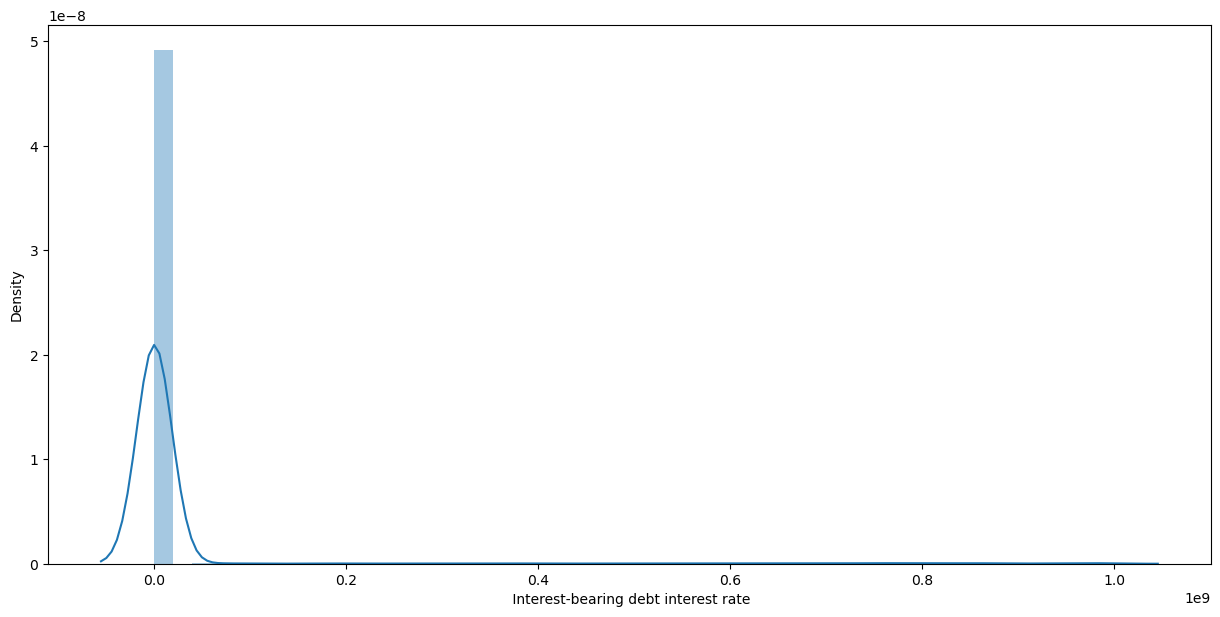

 Tax rate (A)
1.9034564247174581


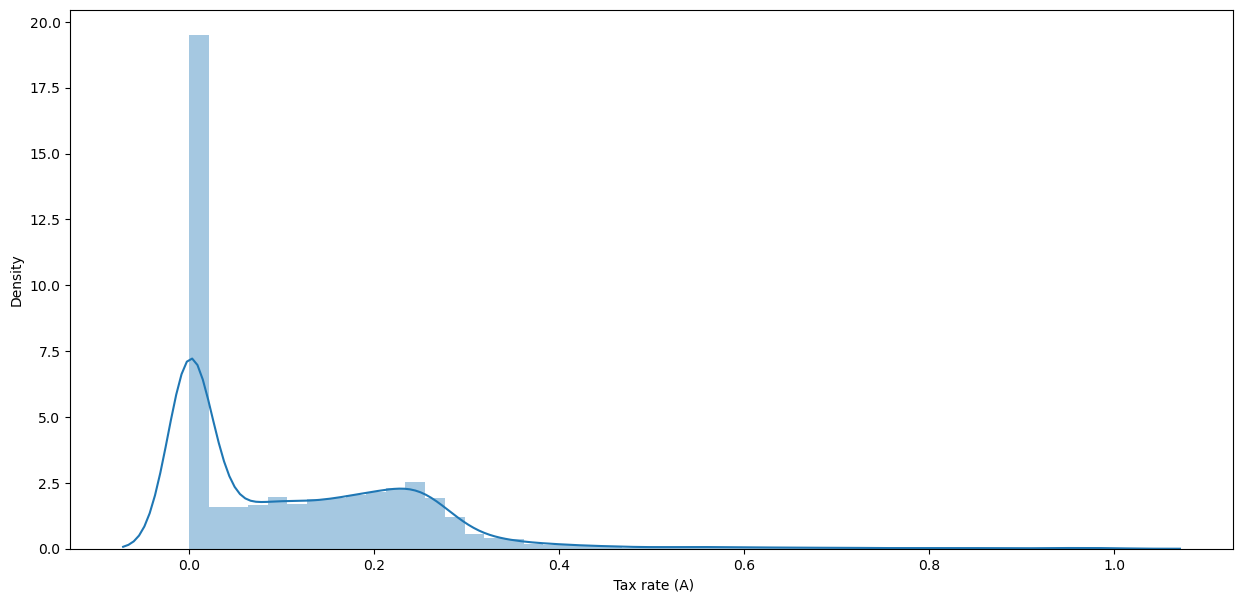

 Net Value Per Share (B)
4.561318925207955


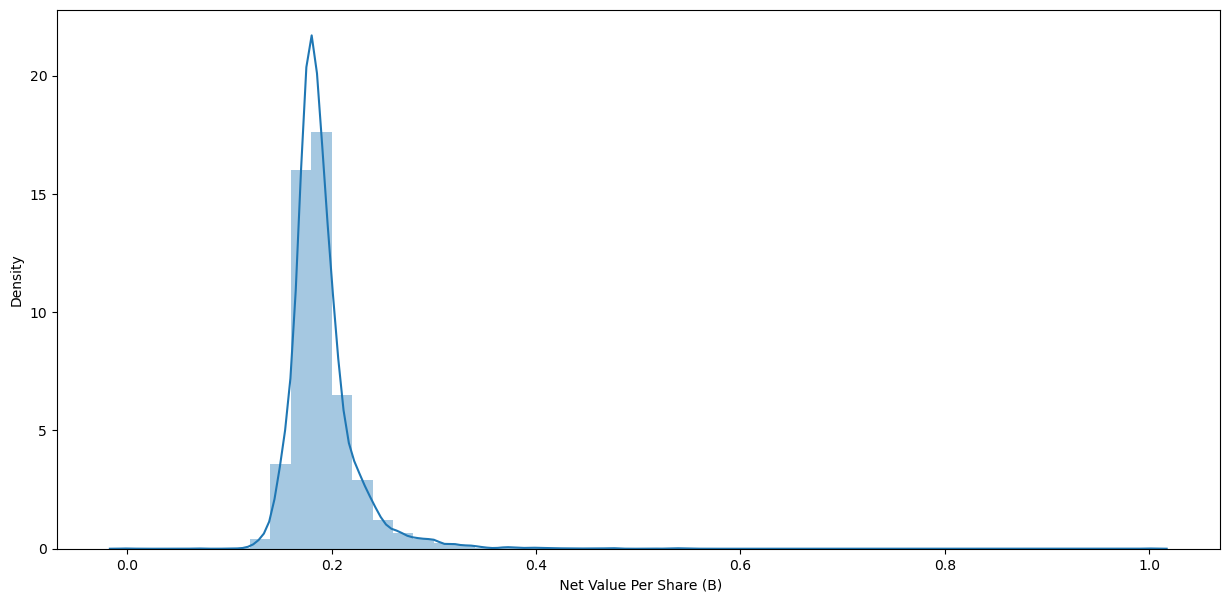

 Net Value Per Share (A)
4.517138126658088


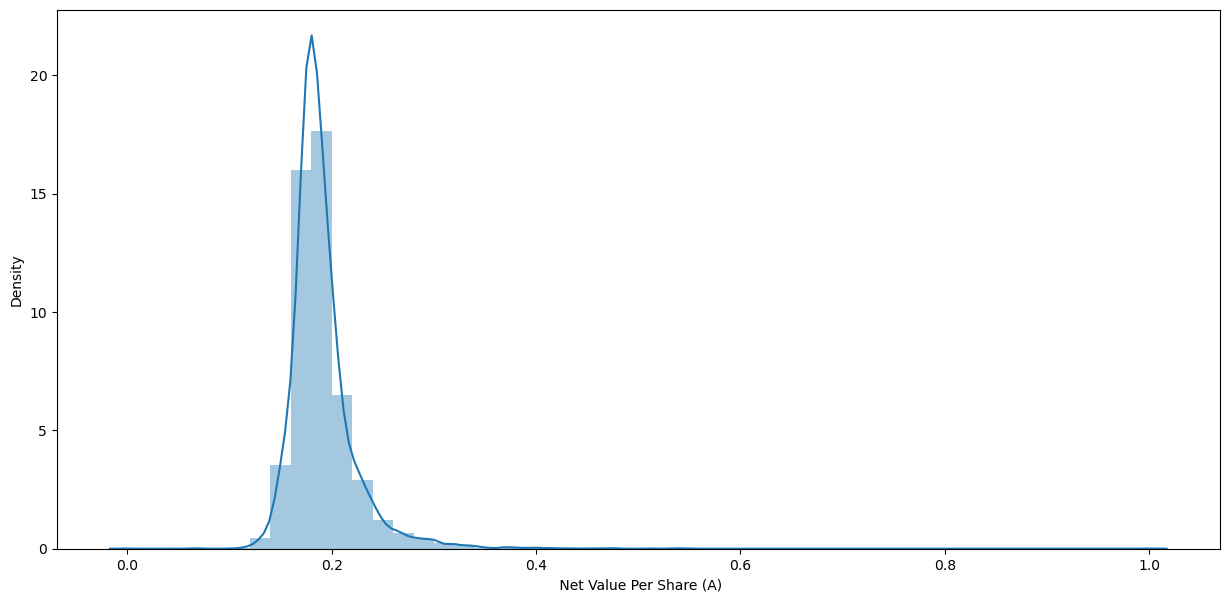

 Net Value Per Share (C)
4.5127475686183125


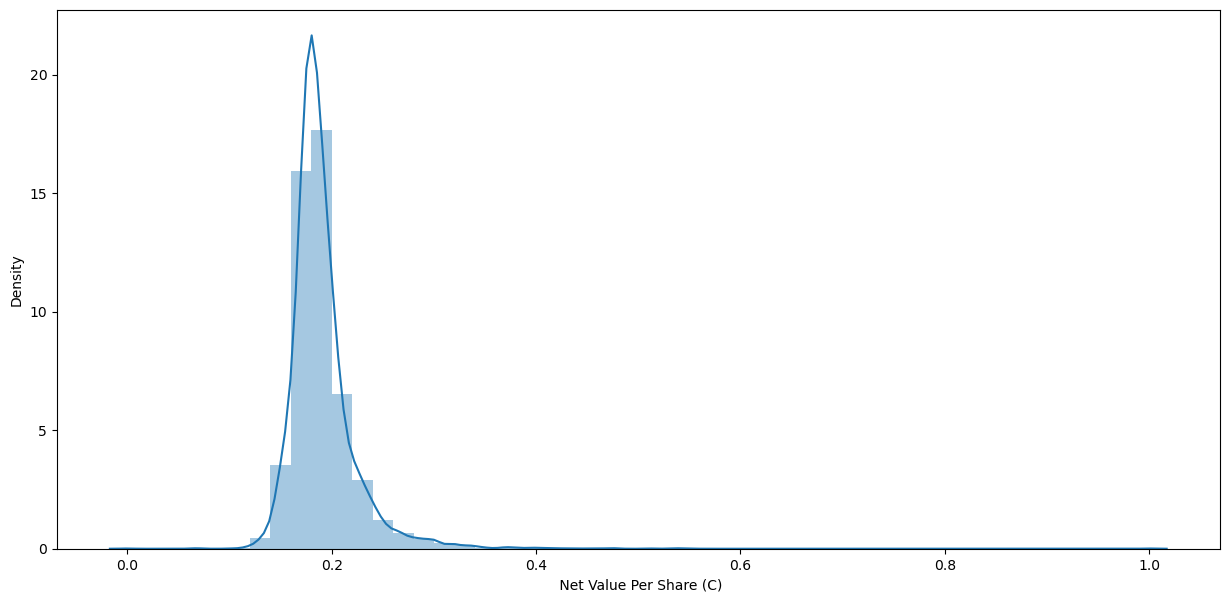

 Persistent EPS in the Last Four Seasons
5.1348332093978


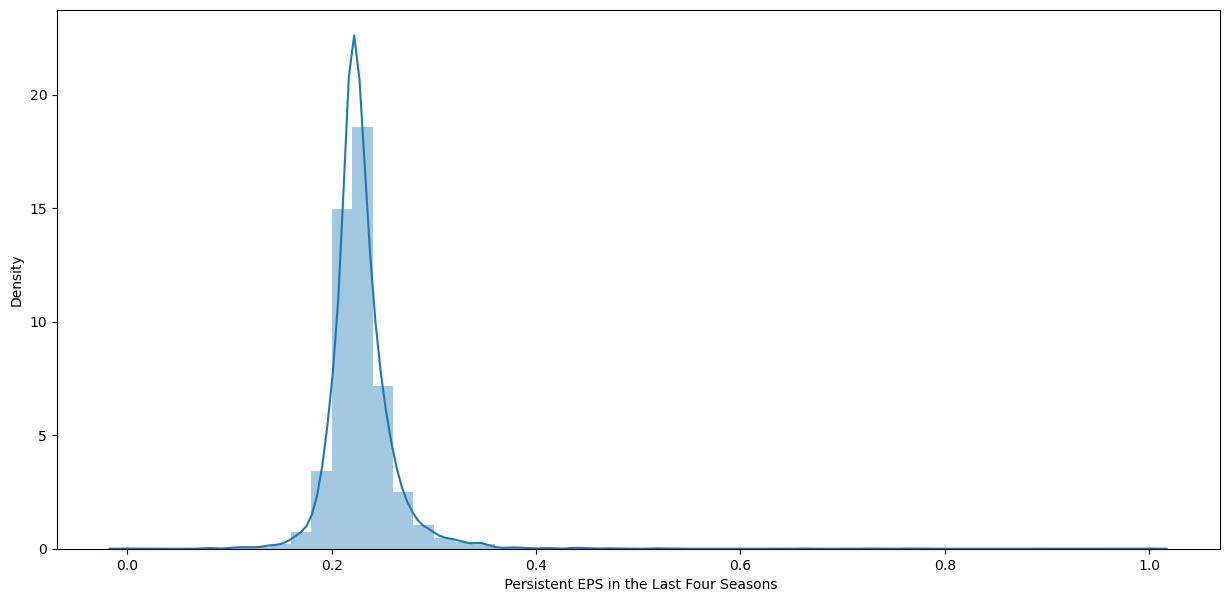

 Cash Flow Per Share
8.017219470332718


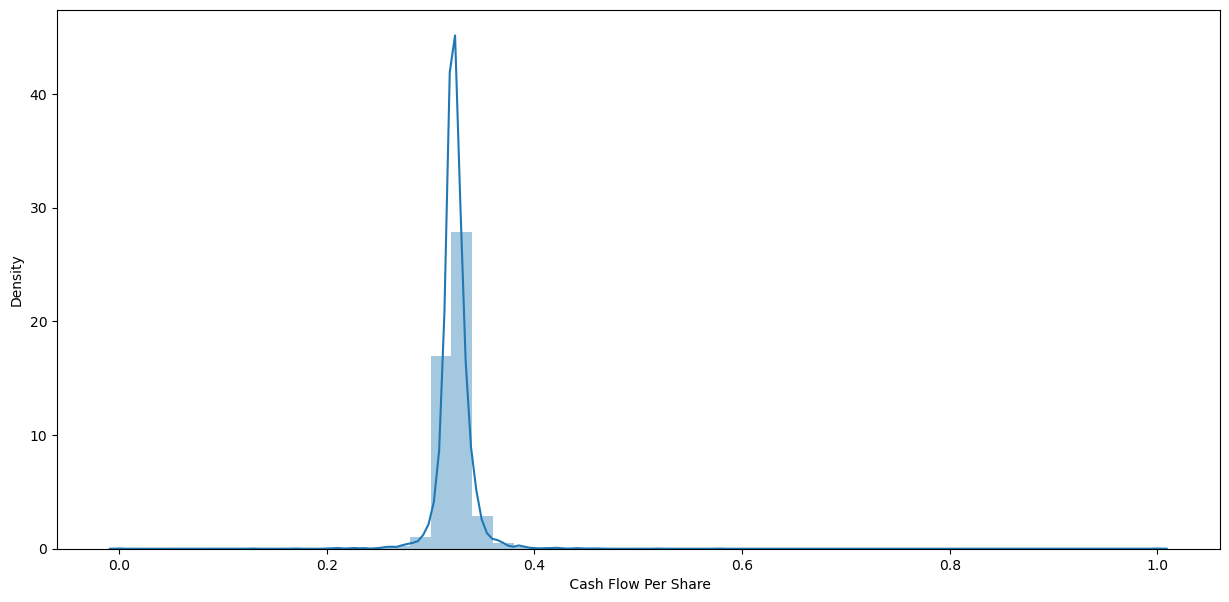

 Revenue Per Share (Yuan �
43.75946962794318


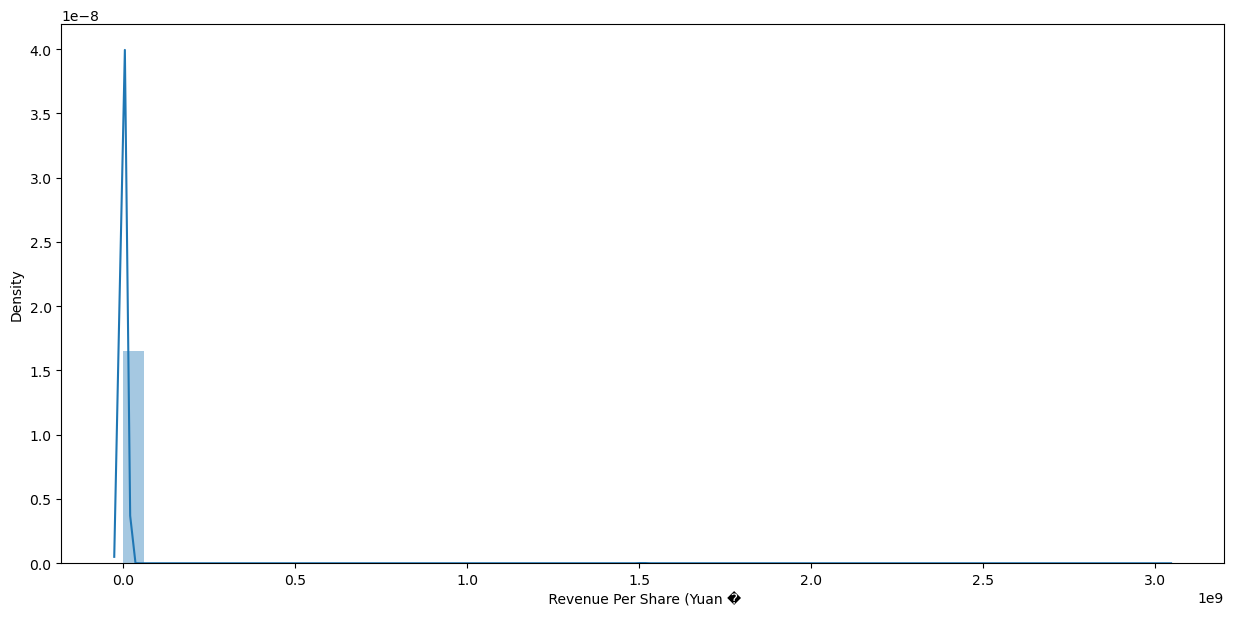

 Operating Profit Per Share (Yuan �
8.809917128951927


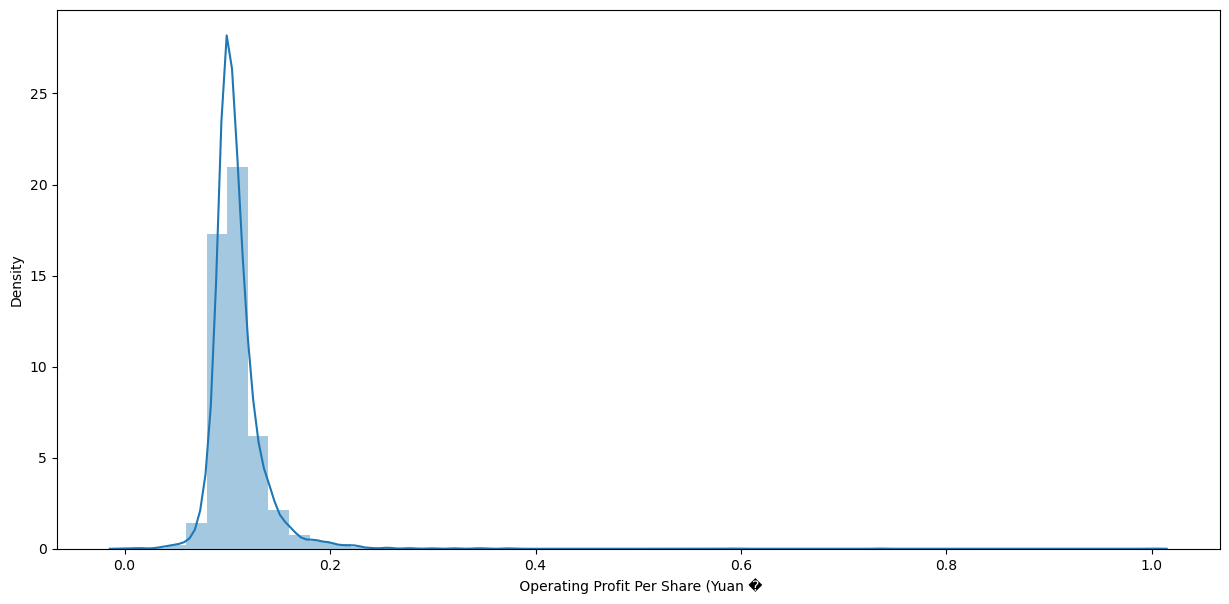

 Per Share Net profit before tax (Yuan �
6.00126966176883


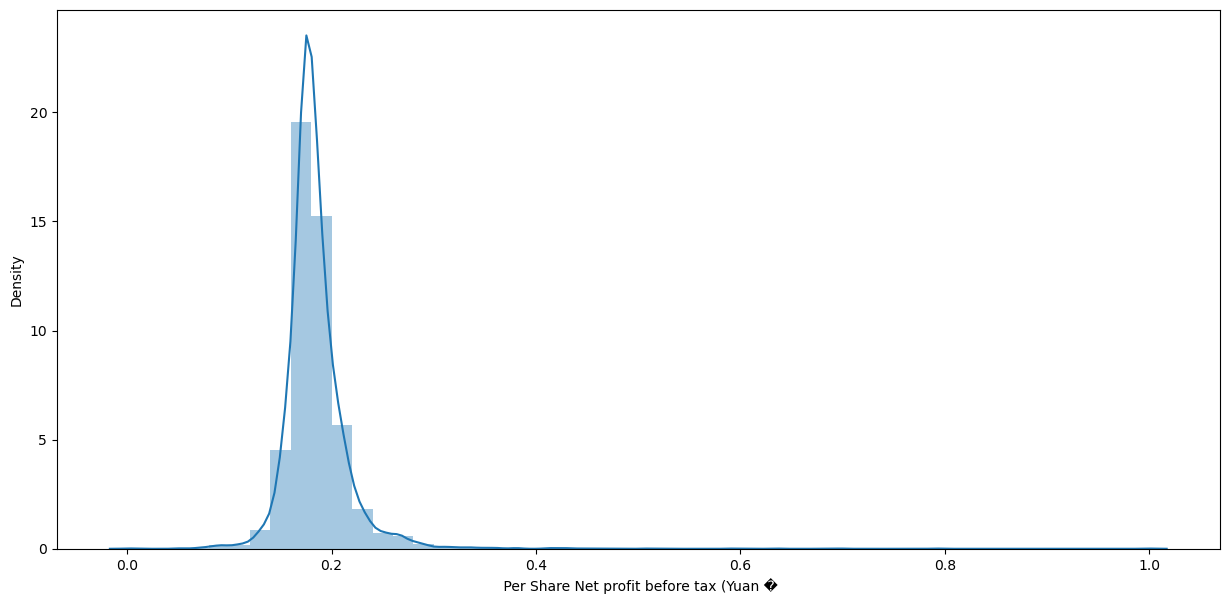

 Realized Sales Gross Profit Growth Rate
77.90796654724593


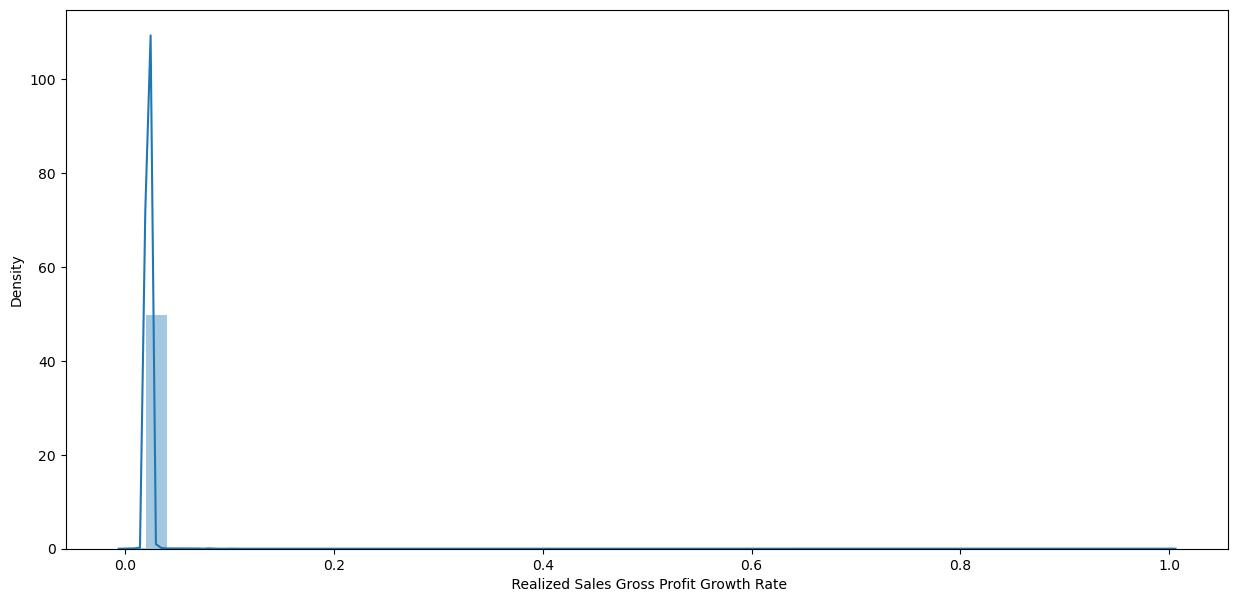

 Operating Profit Growth Rate
-71.67317952858103


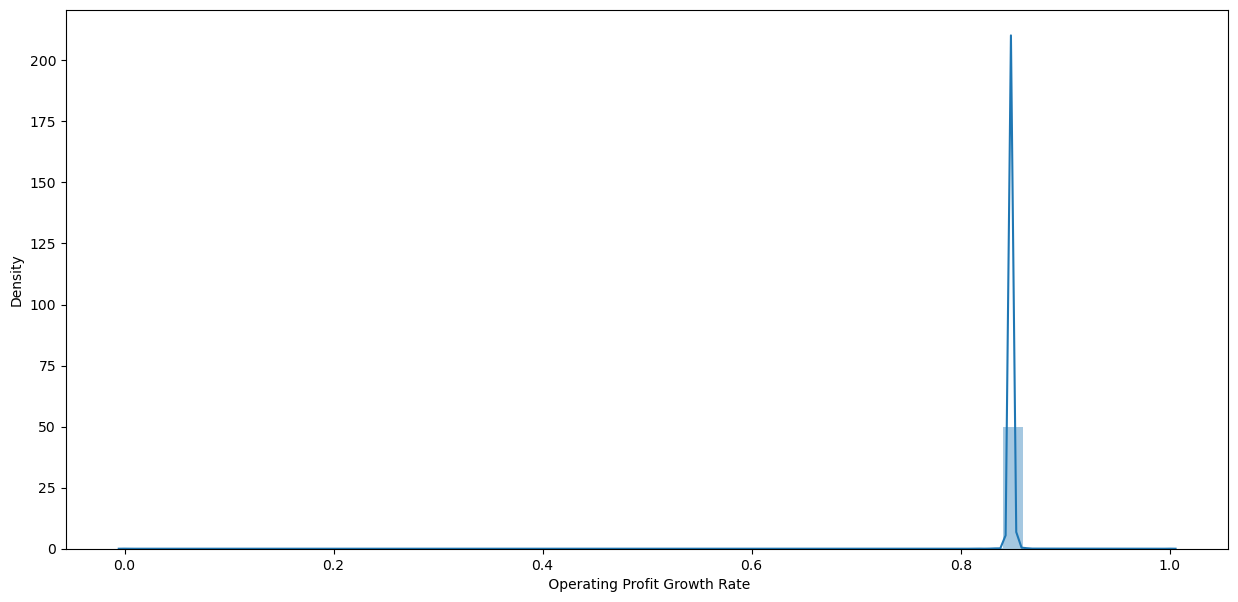

 After-tax Net Profit Growth Rate
-25.57773893968824


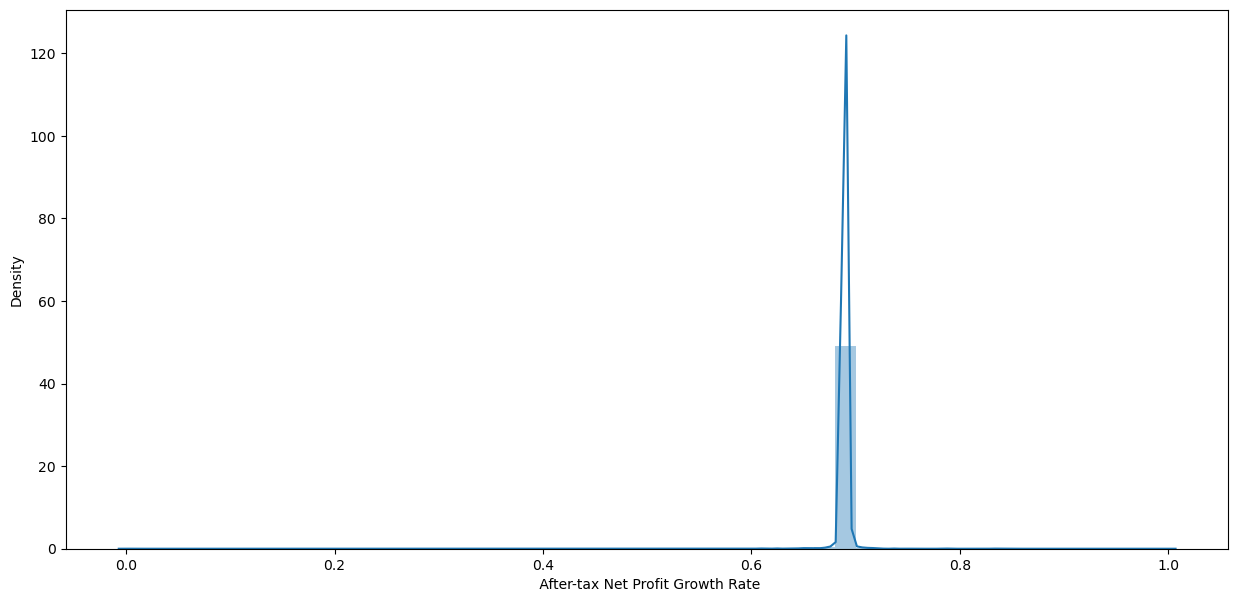

 Regular Net Profit Growth Rate
-25.25728346895553


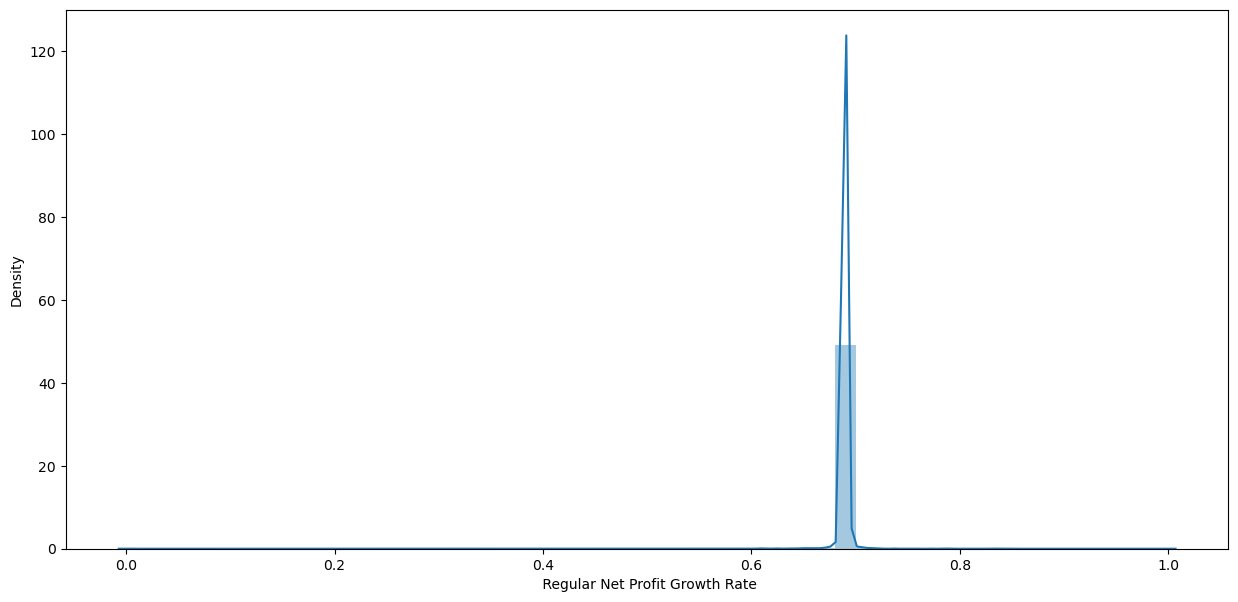

 Continuous Net Profit Growth Rate
67.08277372502162


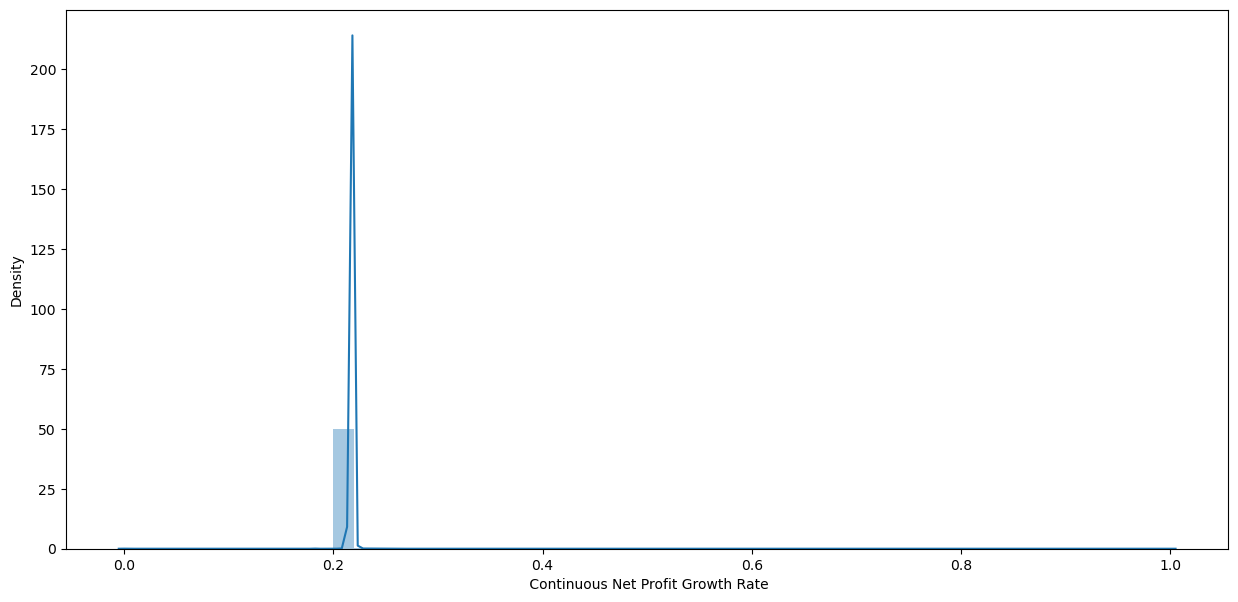

 Total Asset Growth Rate
-0.9185889727652466


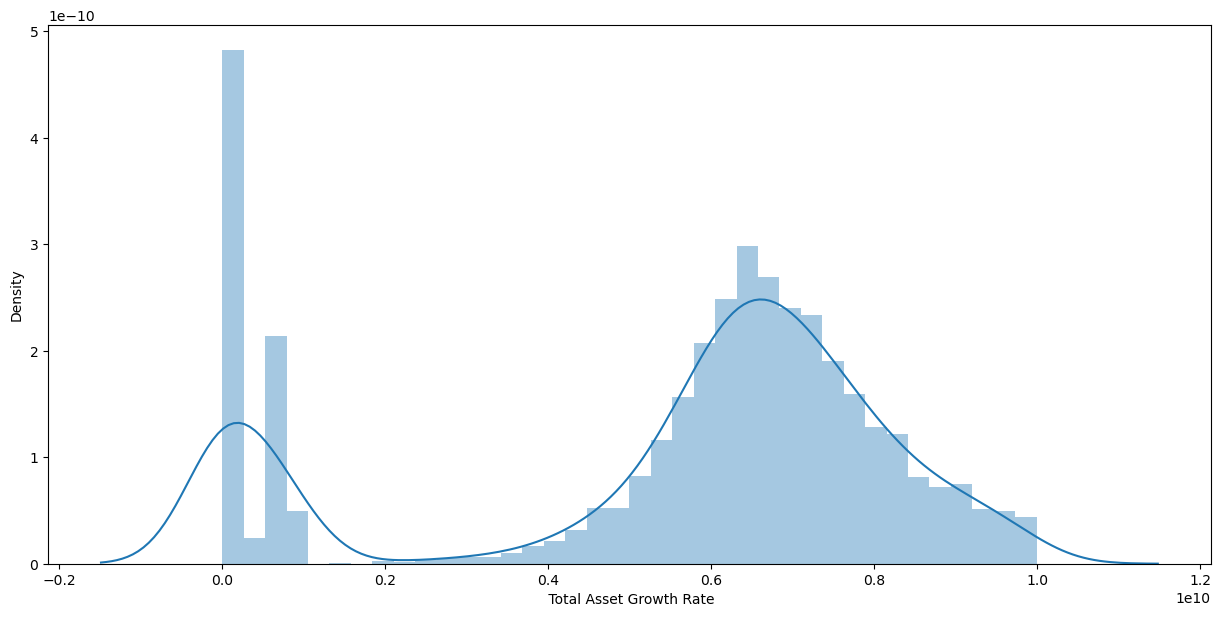

 Net Value Growth Rate
80.27418102892753


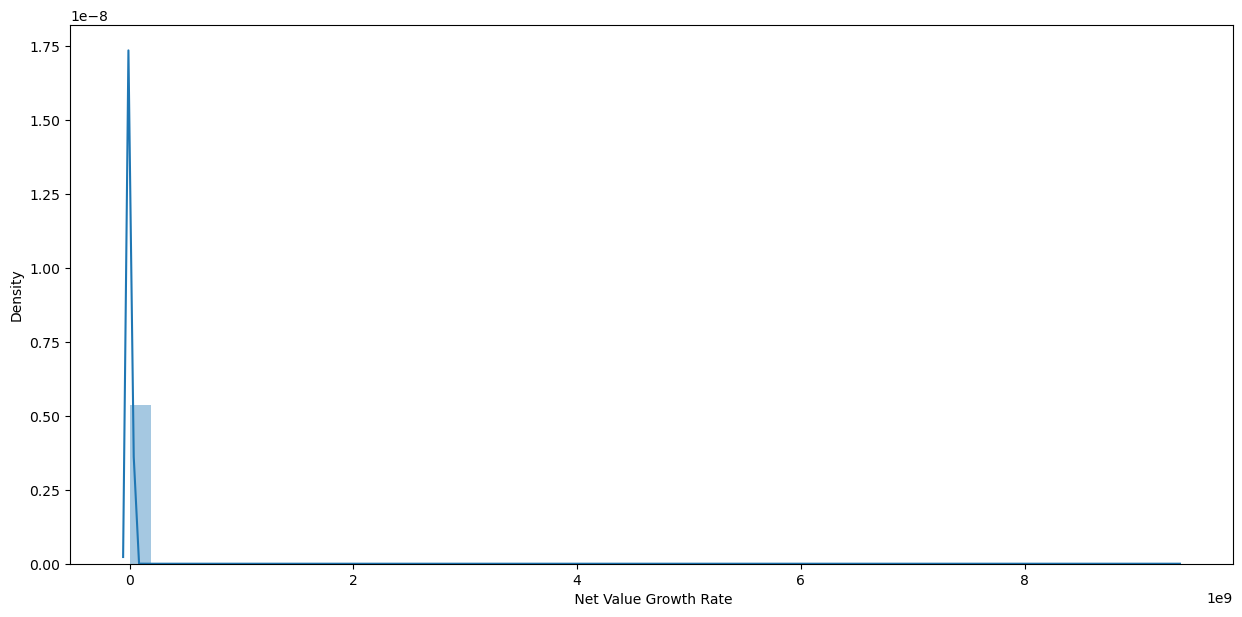

 Total Asset Return Growth Rate Ratio
62.48621186105366


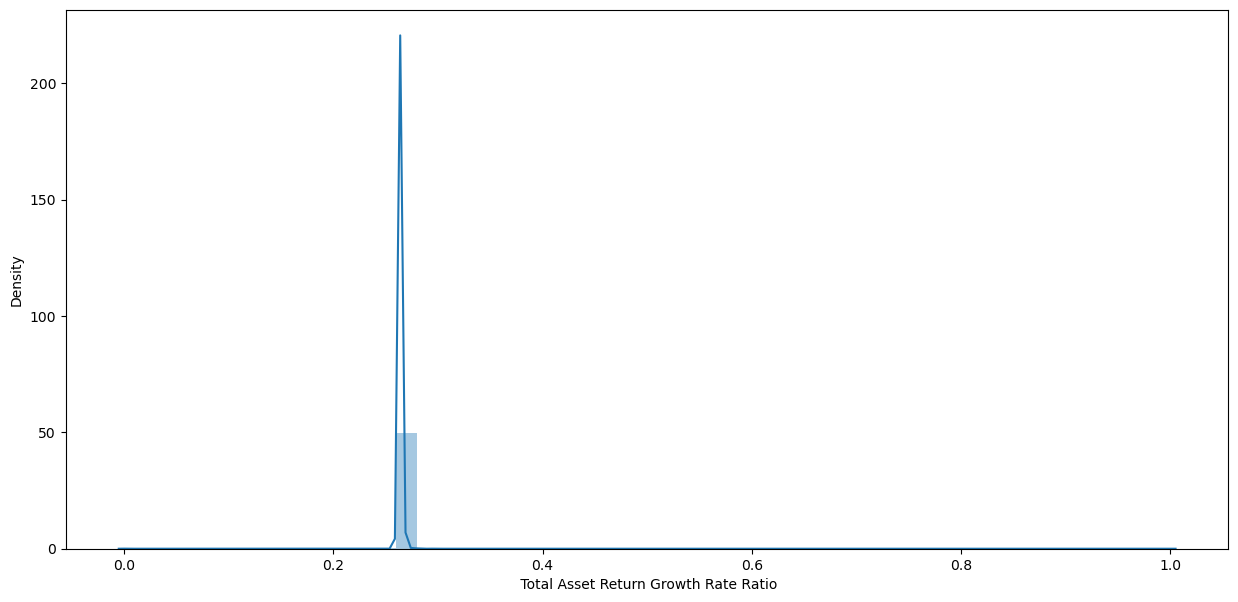

 Cash Reinvestment %
2.31773439048967


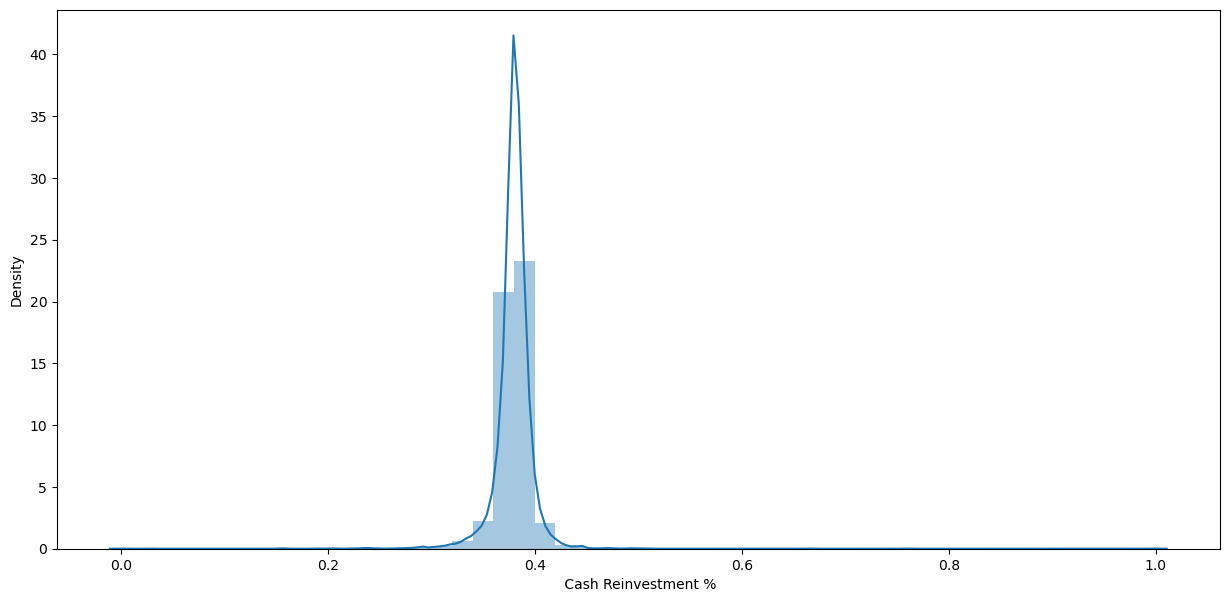

 Current Ratio
82.55907065047776


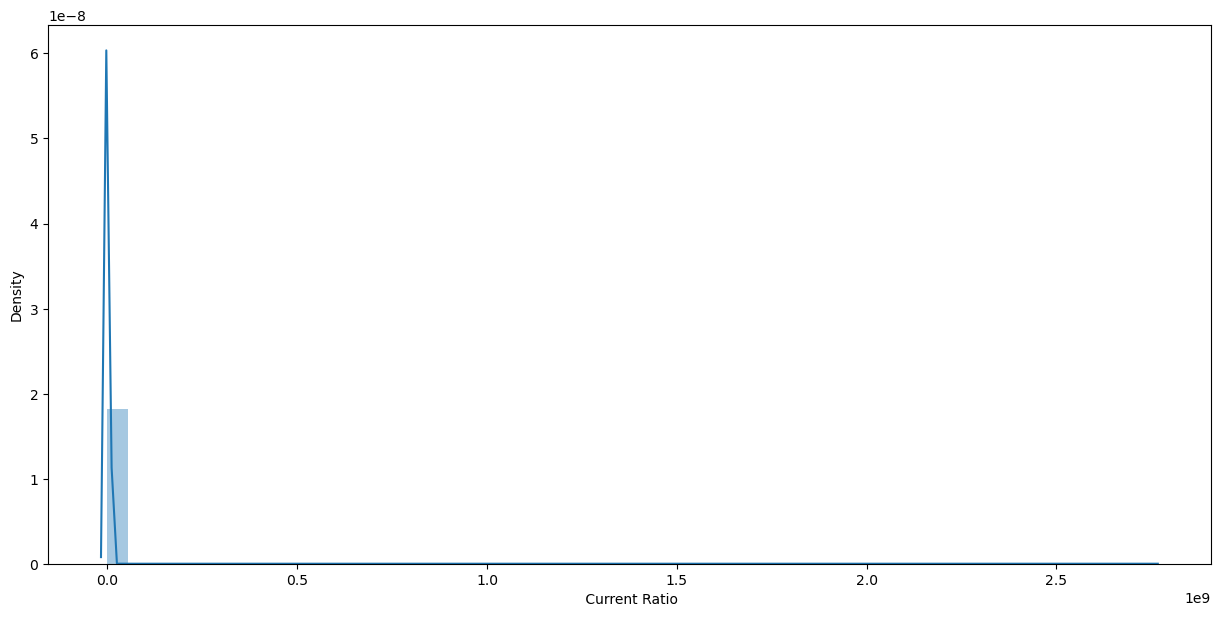

 Quick Ratio
31.637951544483787


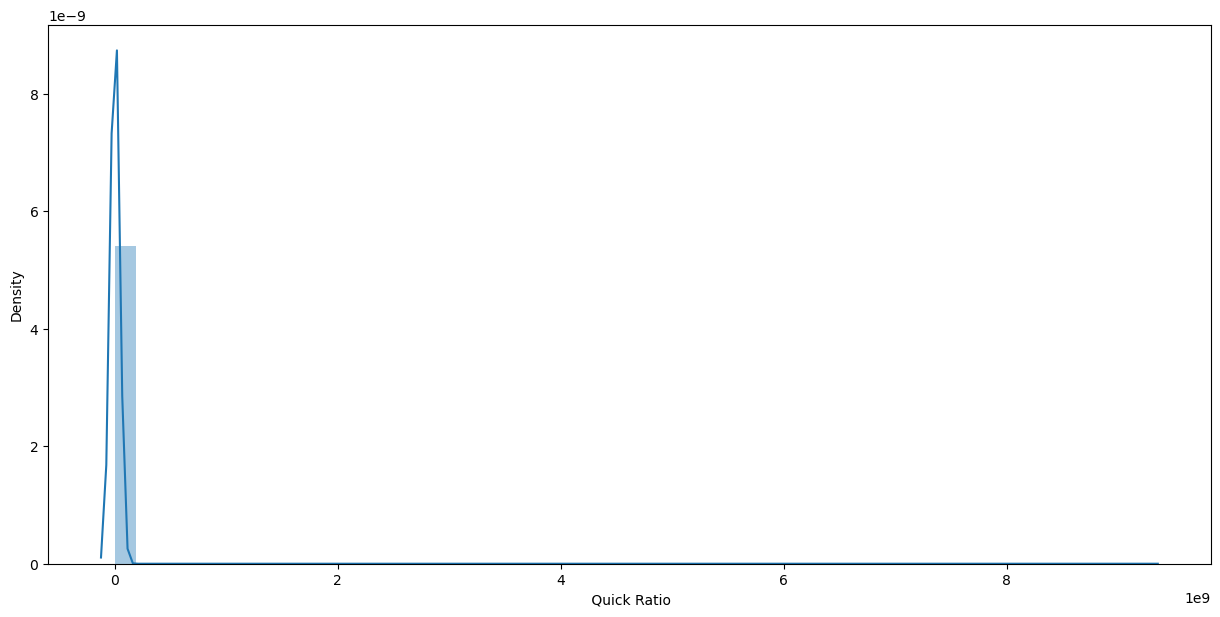

 Interest Expense Ratio
-16.818853379459934


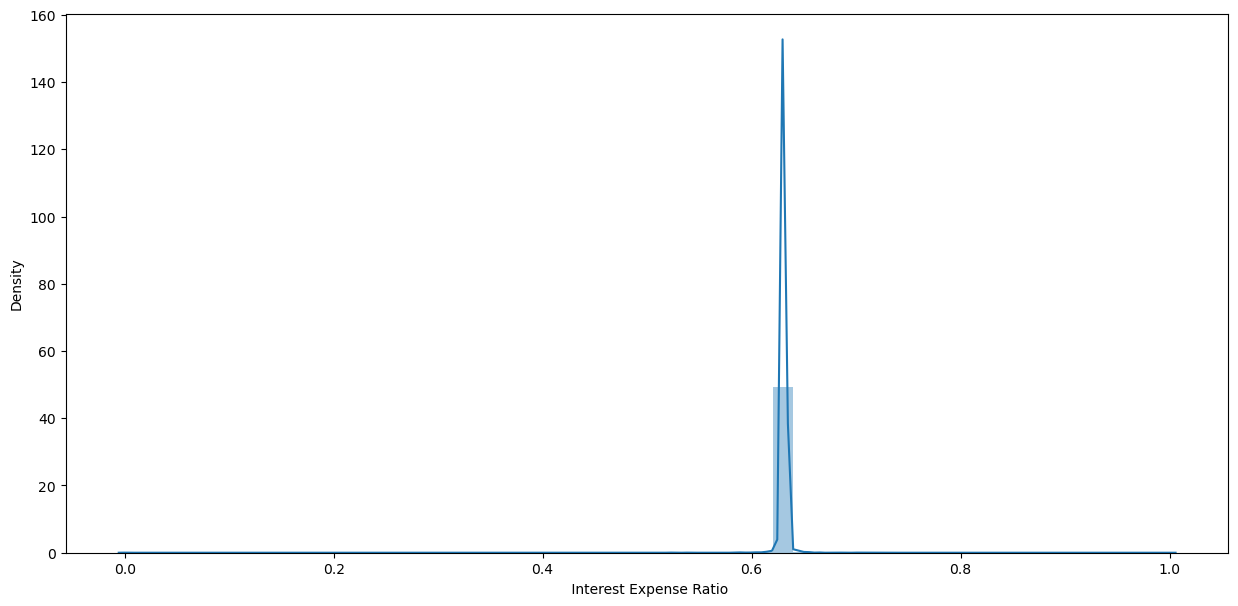

 Total debt/Total net worth
46.3451382723048


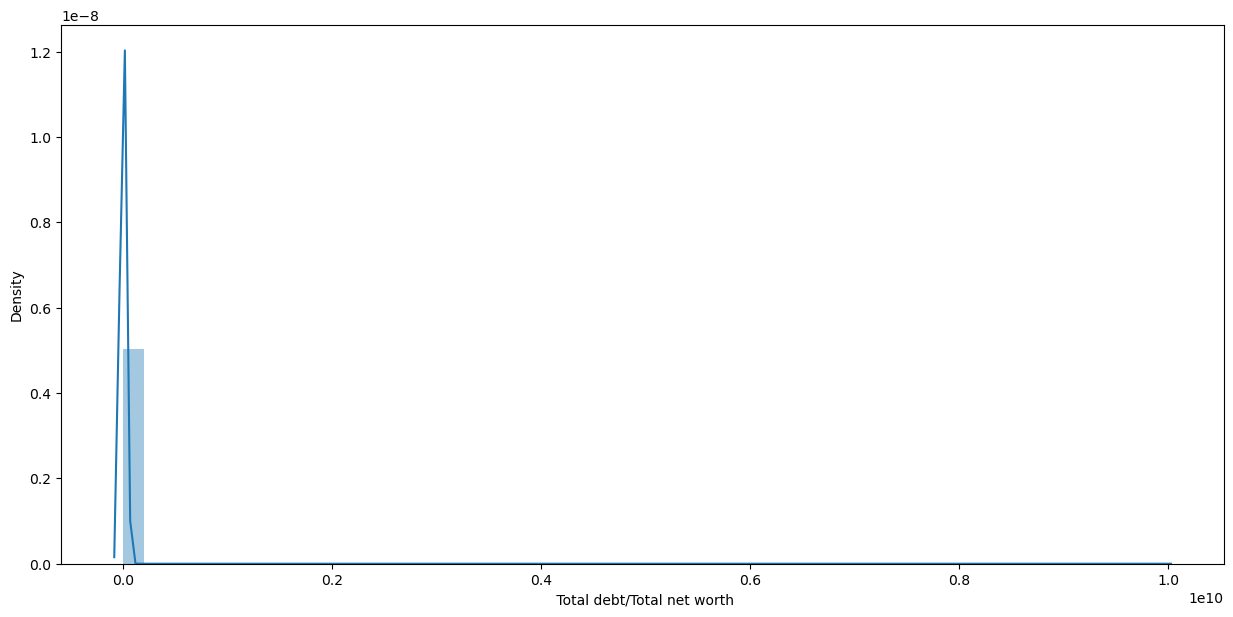

 Debt ratio %
0.9805803543646414


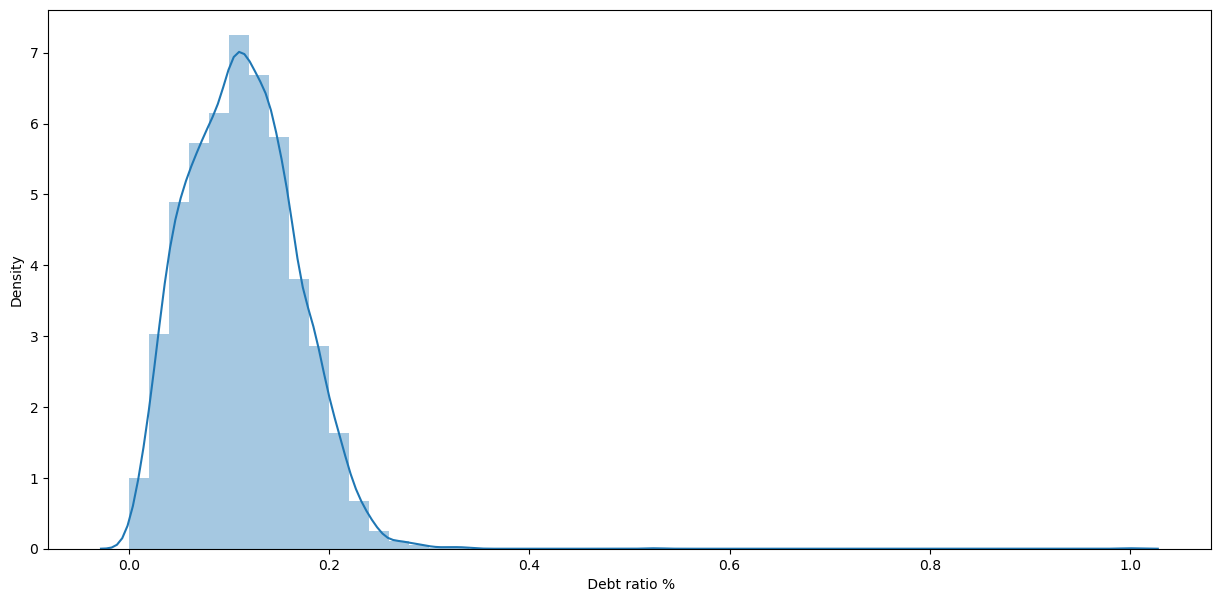

 Net worth/Assets
-0.9805803543646436


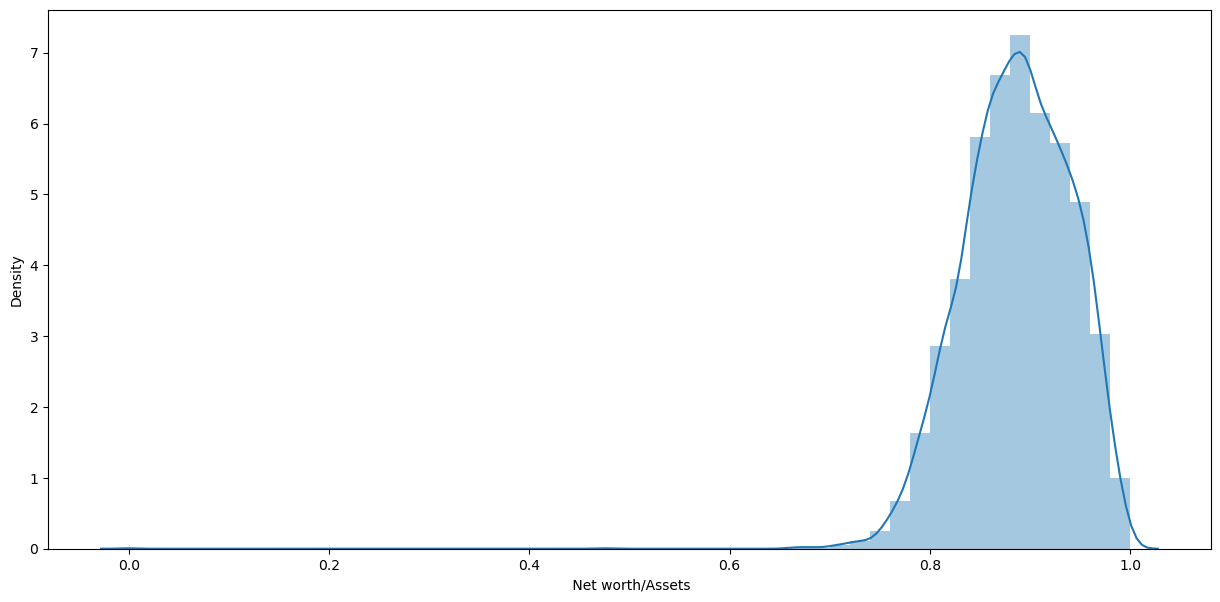

 Long-term fund suitability ratio (A)
24.962380113157717


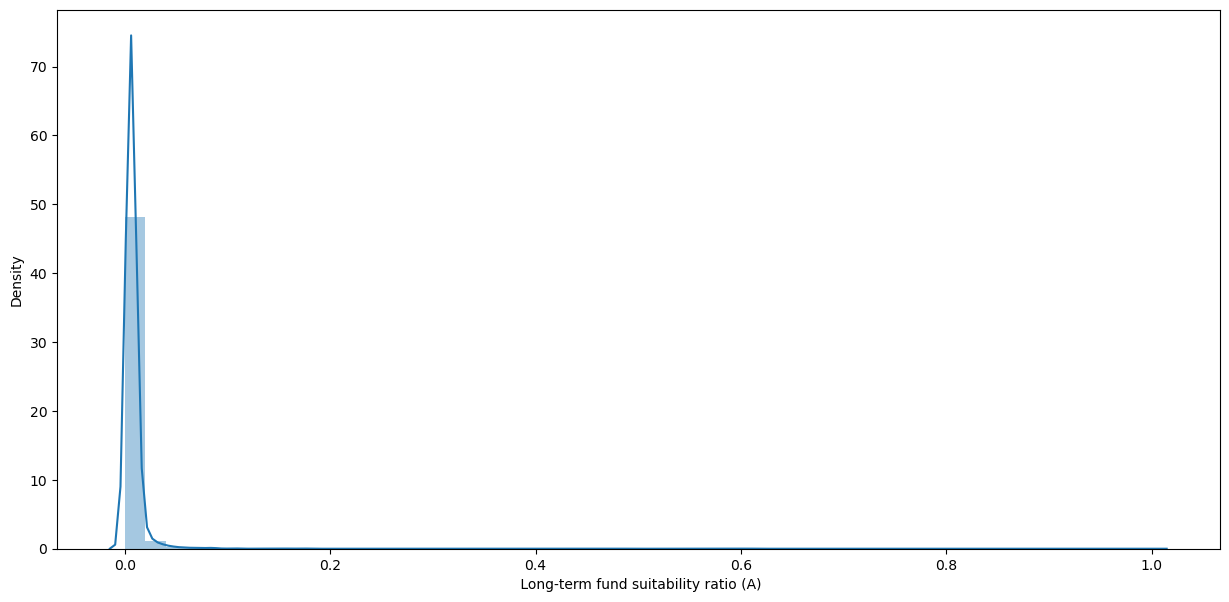

 Borrowing dependency
20.834306519584786


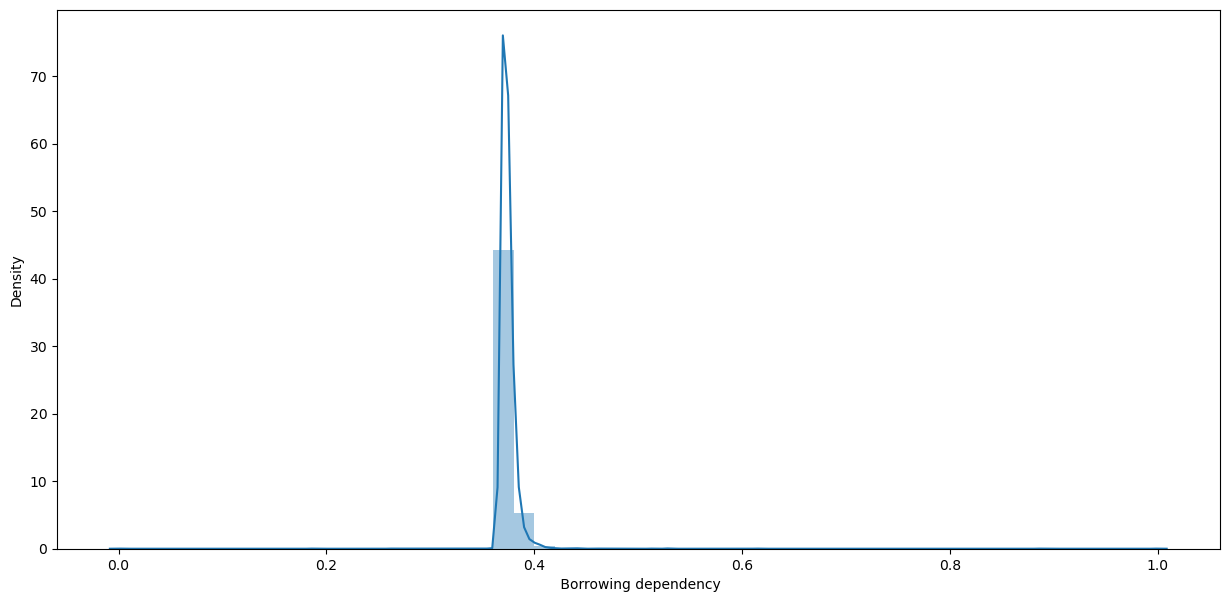

 Contingent liabilities/Net worth
79.65309368028237


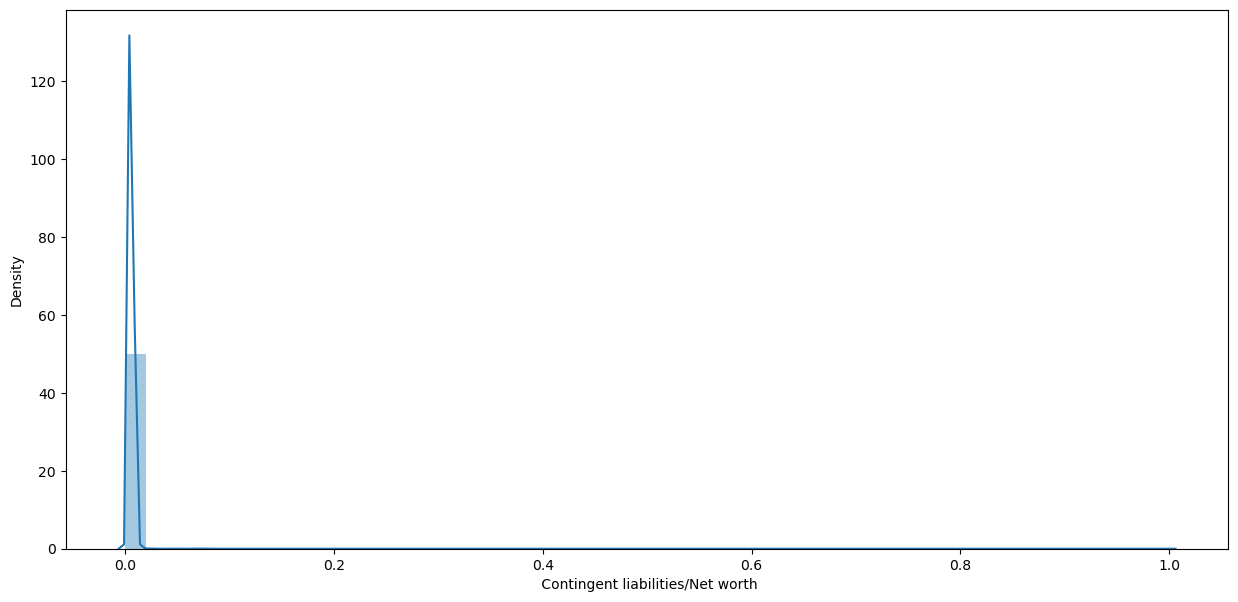

 Operating profit/Paid-in capital
8.94741834894072


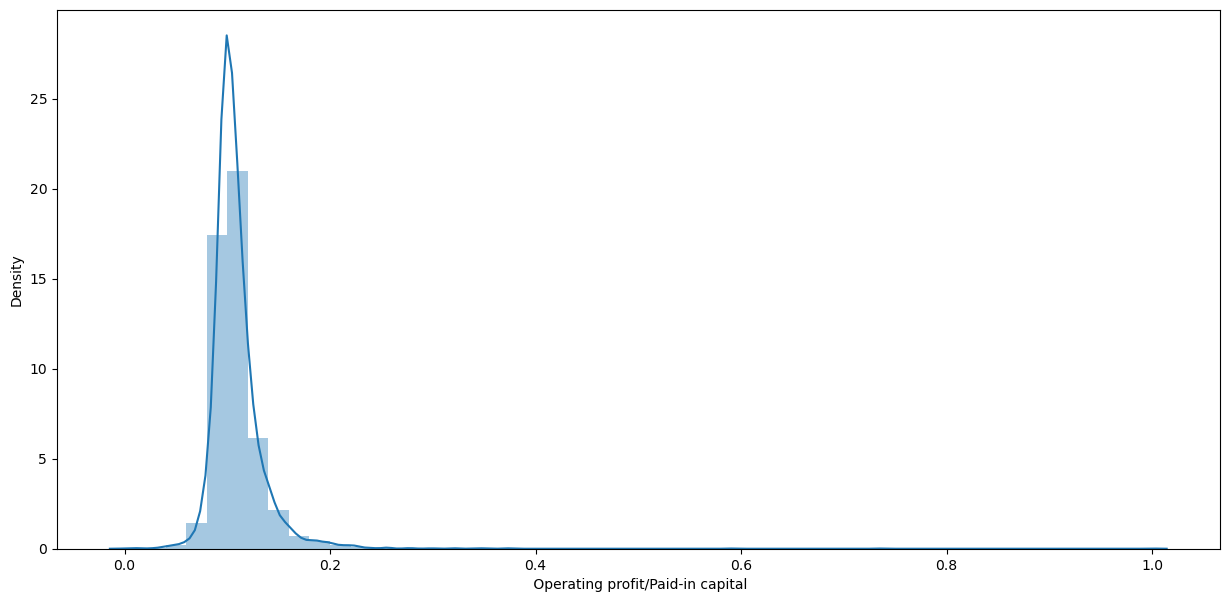

 Net profit before tax/Paid-in capital
6.37802217970934


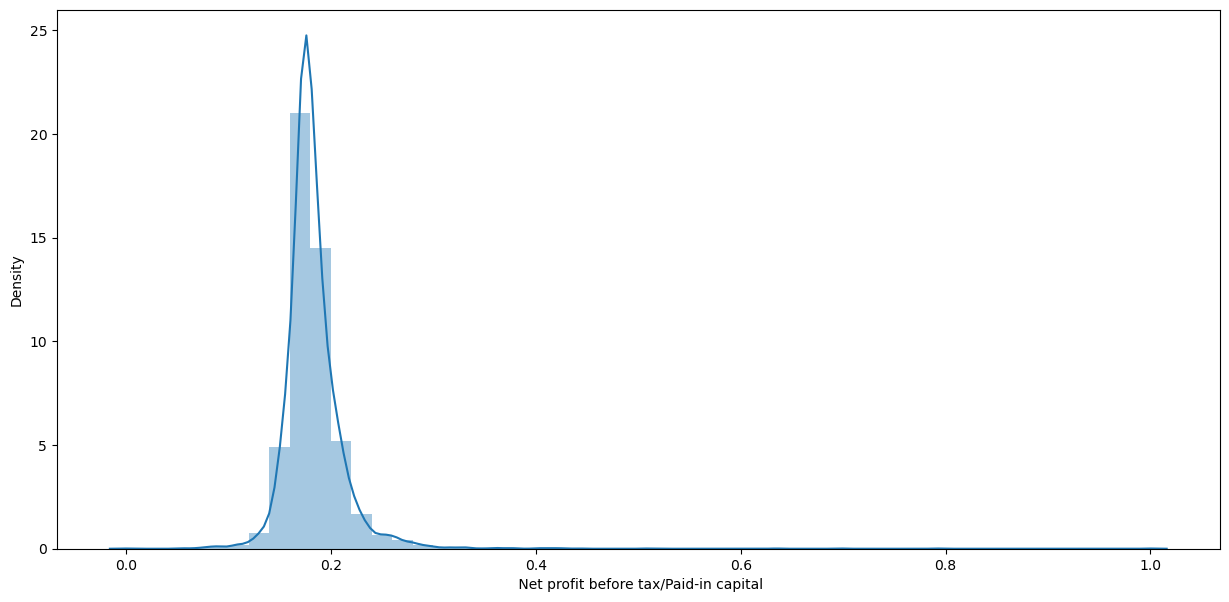

 Inventory and accounts receivable/Net value
13.10934971882925


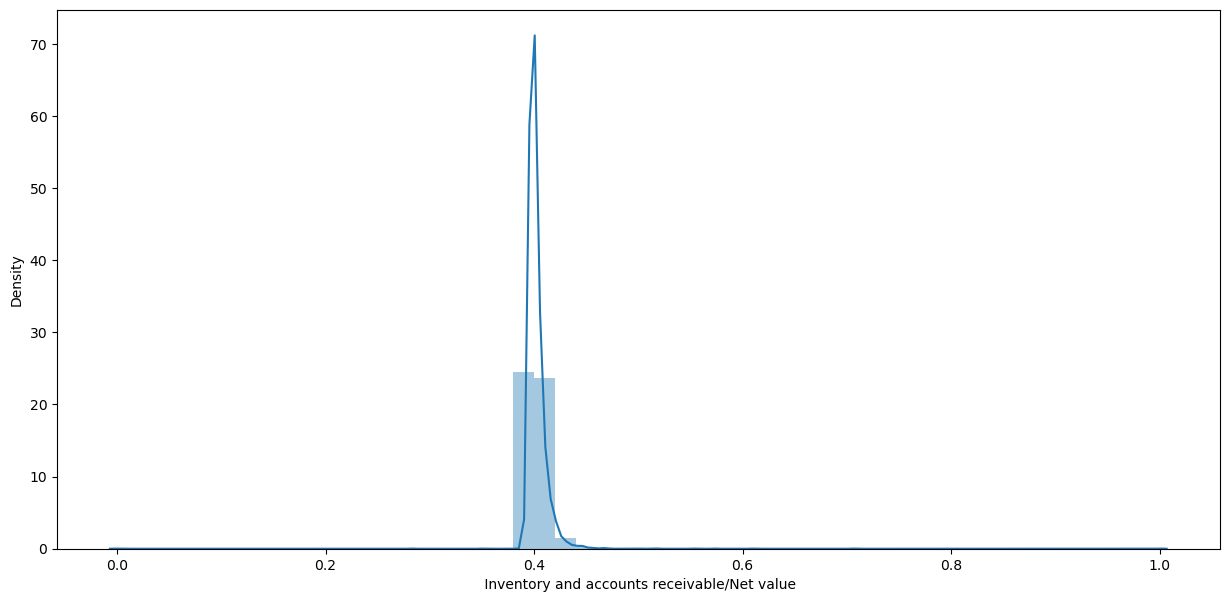

 Total Asset Turnover
2.340391653020638


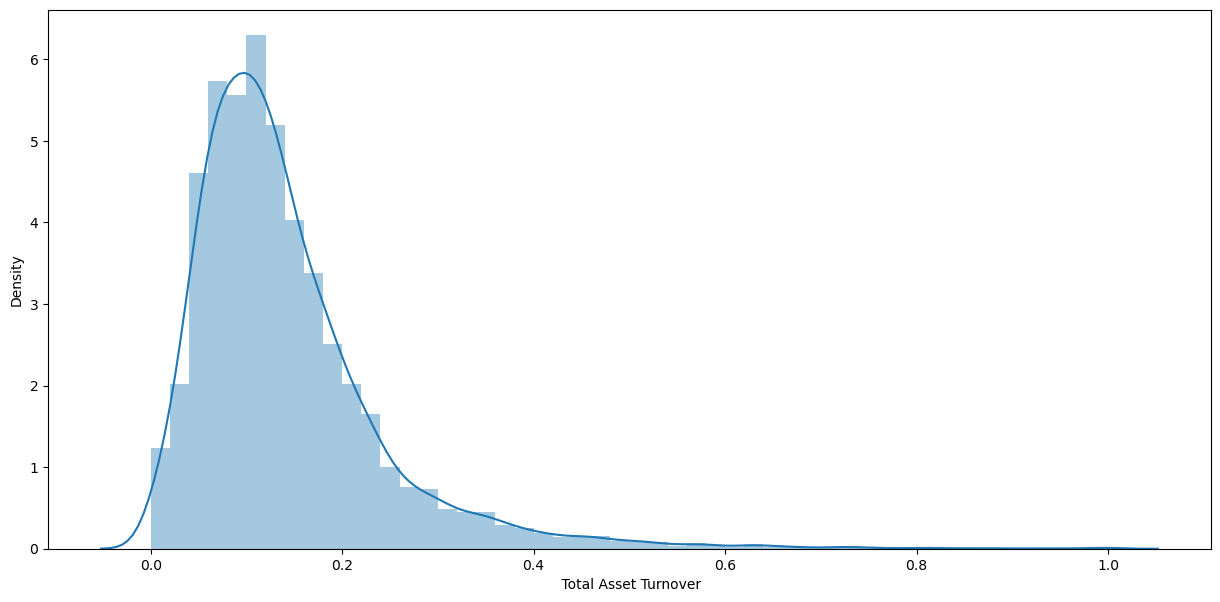

 Accounts Receivable Turnover
25.84086064557749


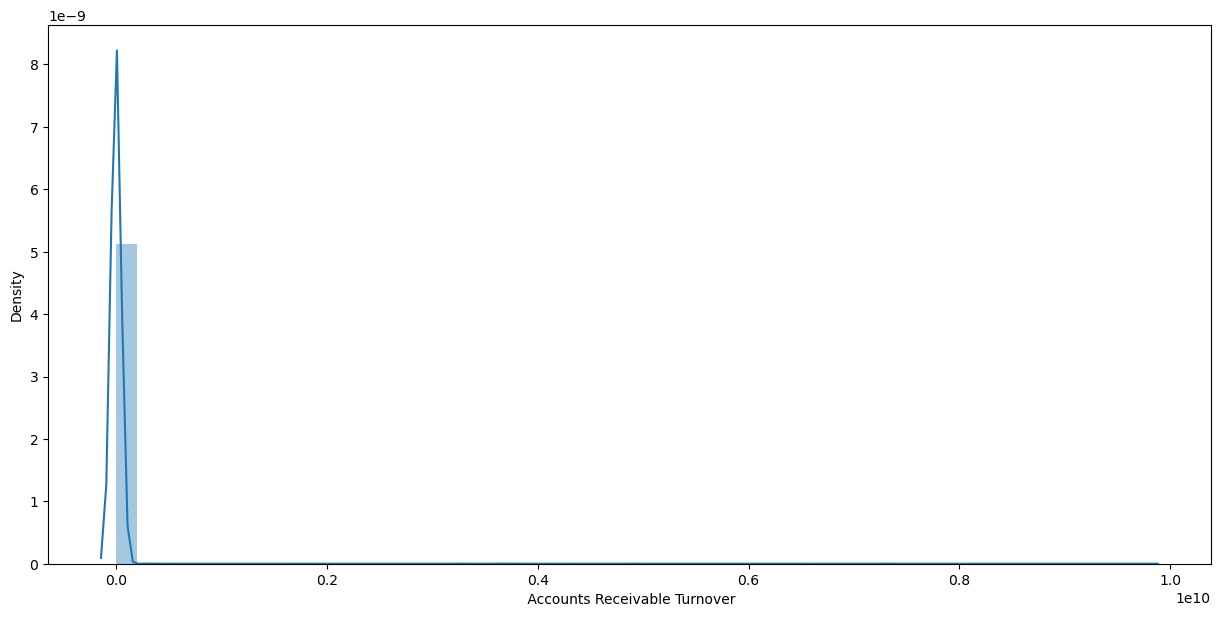

 Average Collection Days
30.573359009239148


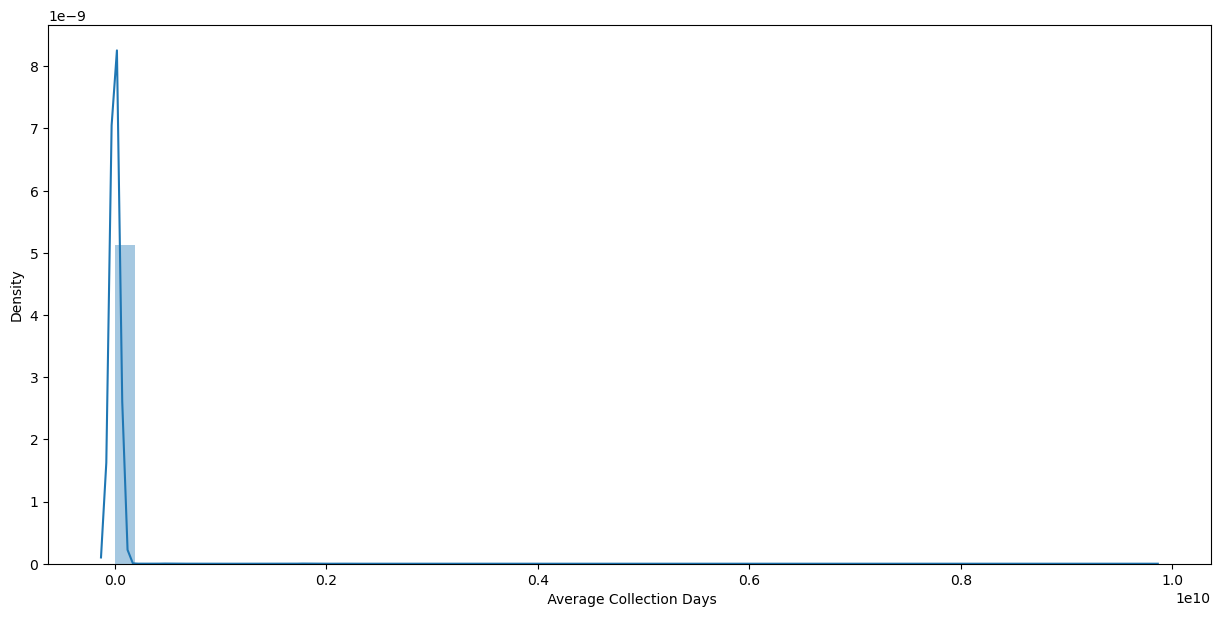

 Inventory Turnover Rate (times)
1.1370384314645894


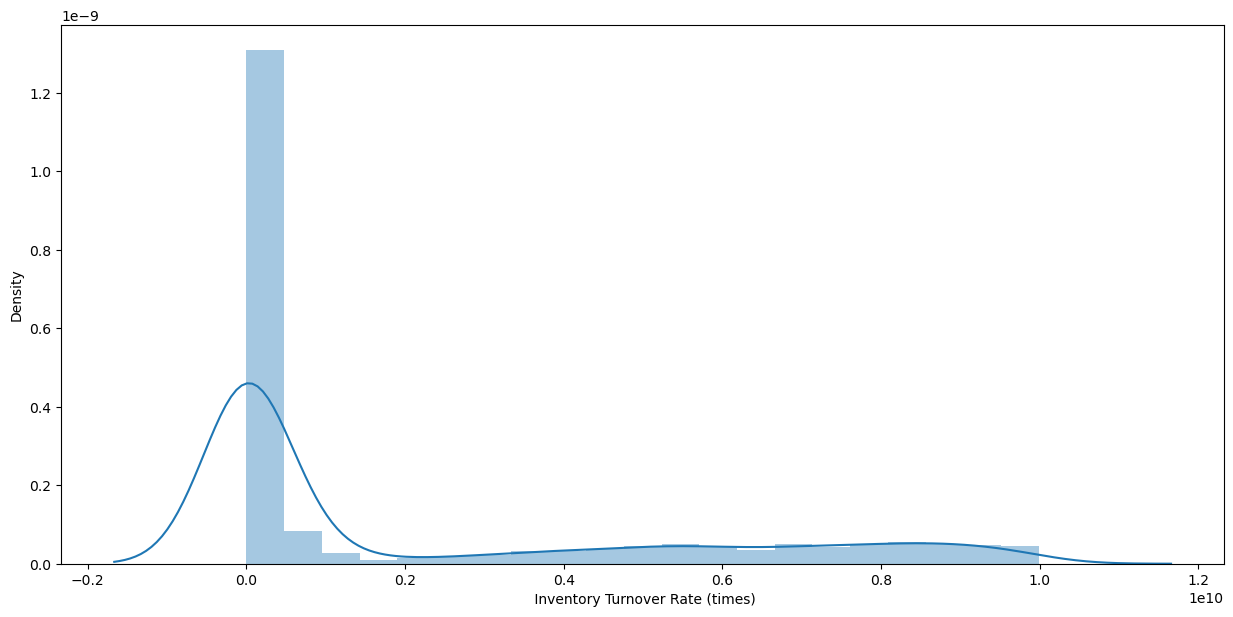

 Fixed Assets Turnover Frequency
2.349285927048202


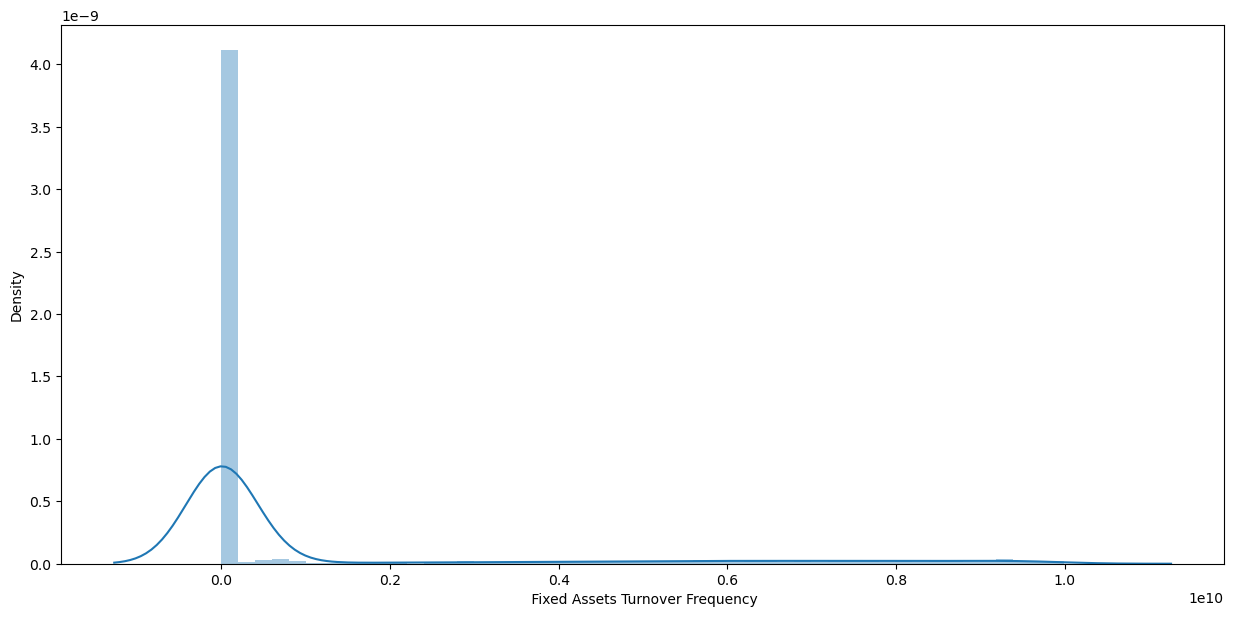

 Net Worth Turnover Rate (times)
8.95987681641135


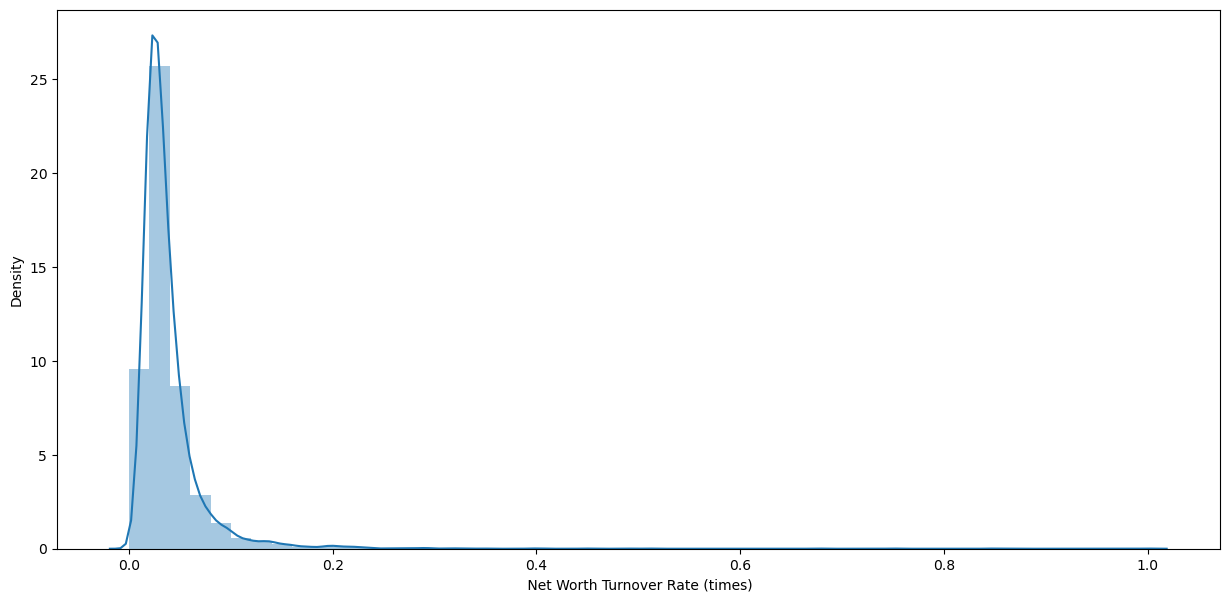

 Revenue per person
59.42140511485555


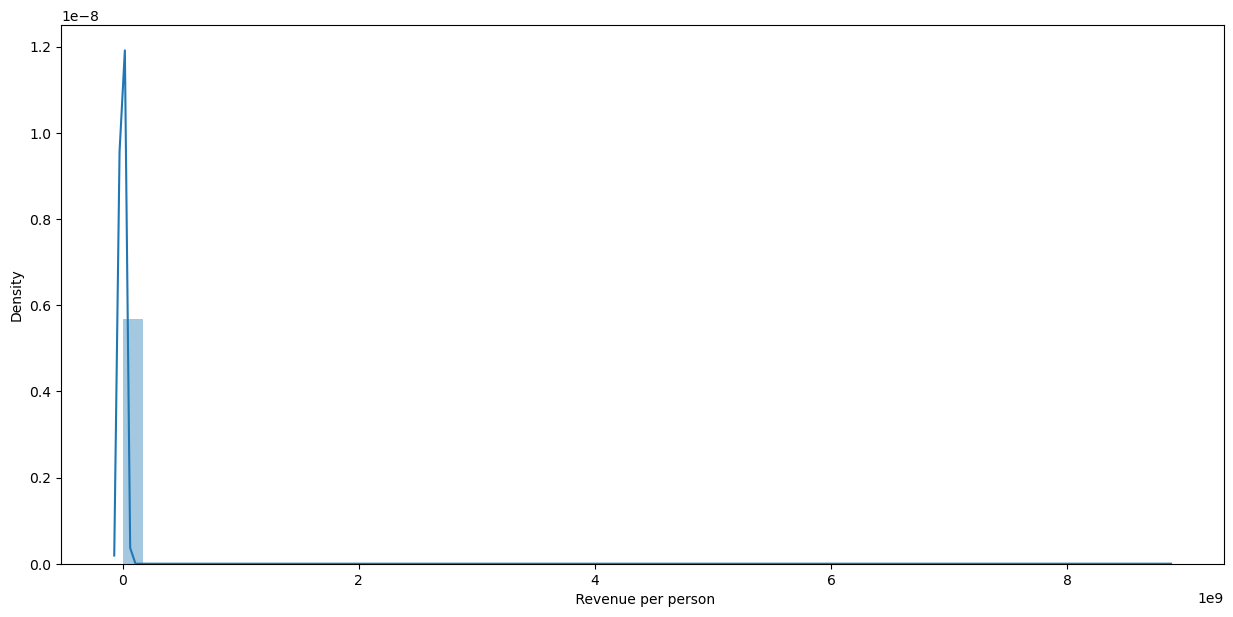

 Operating profit per person
7.786586157616602


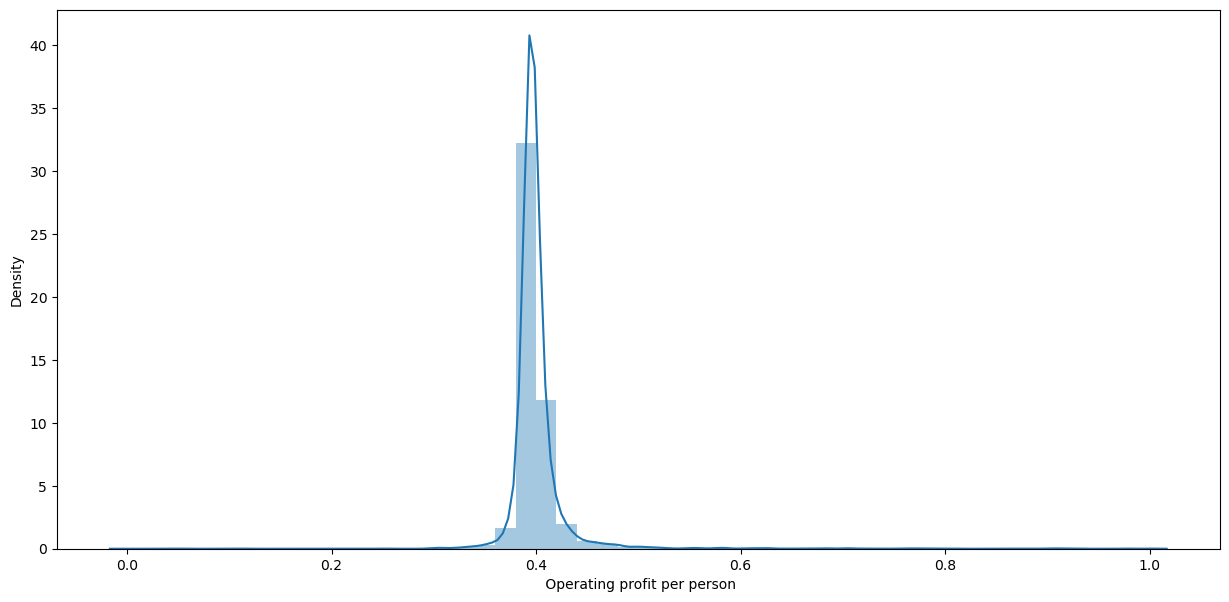

 Allocation rate per person
27.470100365184965


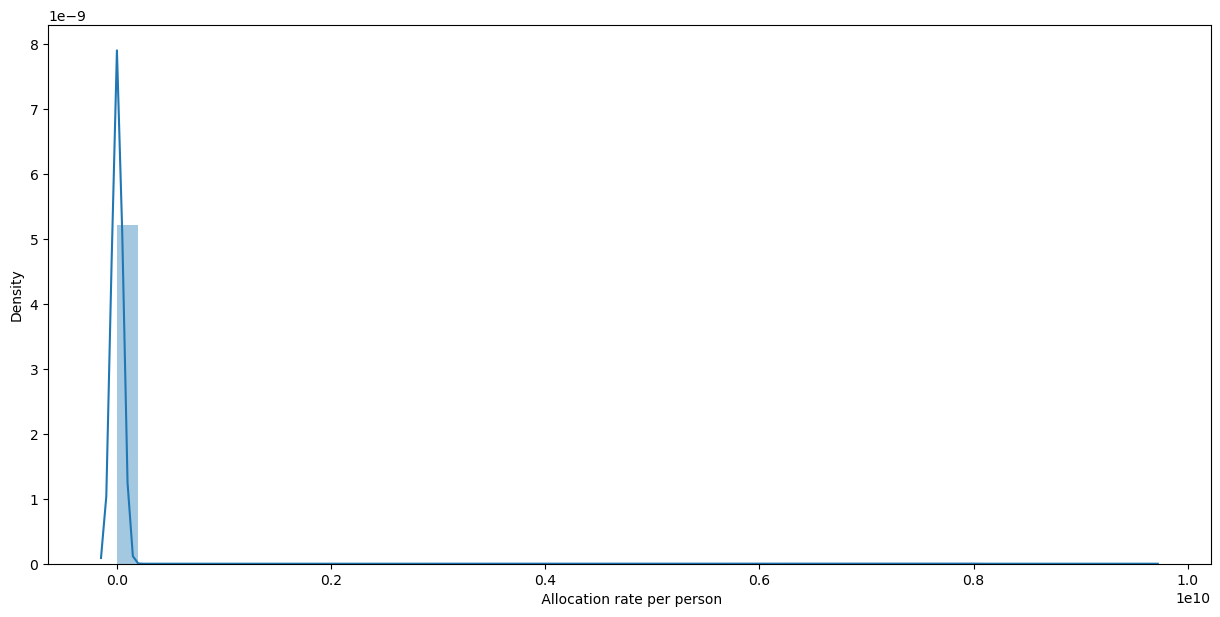

 Working Capital to Total Assets
-0.1922690414780542


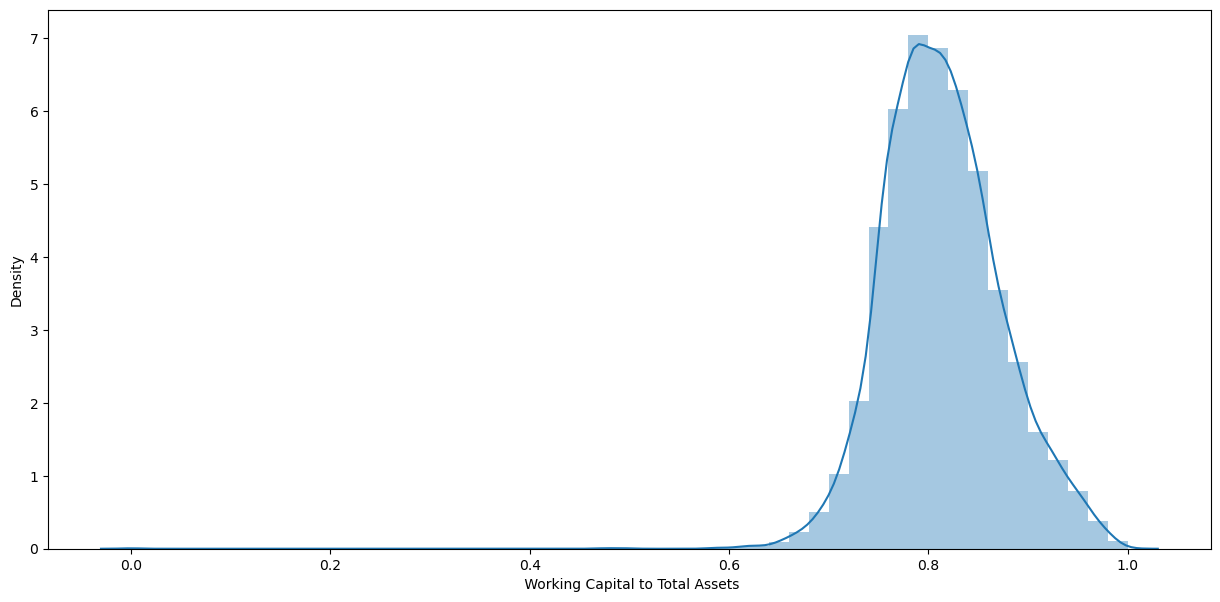

 Quick Assets/Total Assets
0.3372404707353971


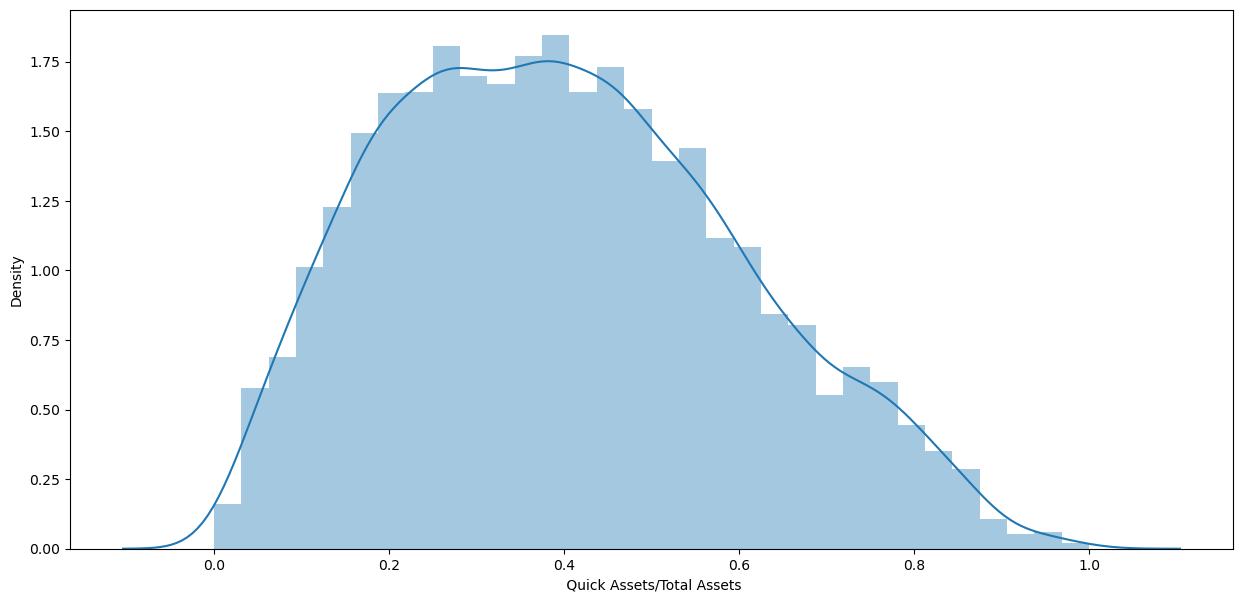

 Current Assets/Total Assets
0.07587361046138037


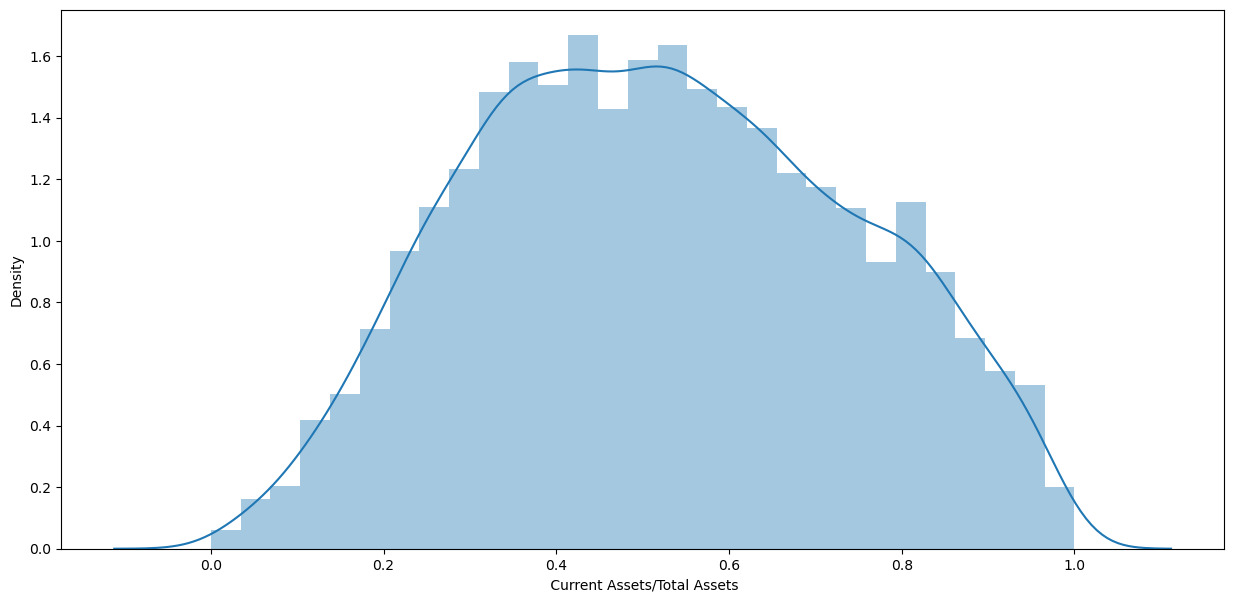

 Cash/Total Assets
2.2298695956685974


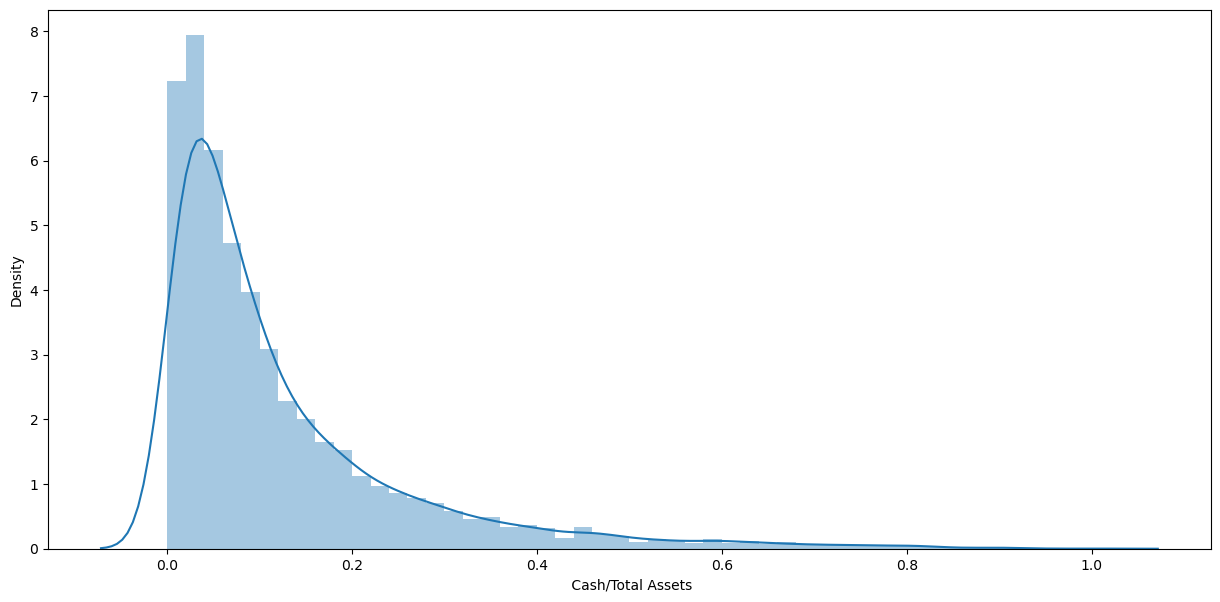

 Quick Assets/Current Liability
47.93675199633802


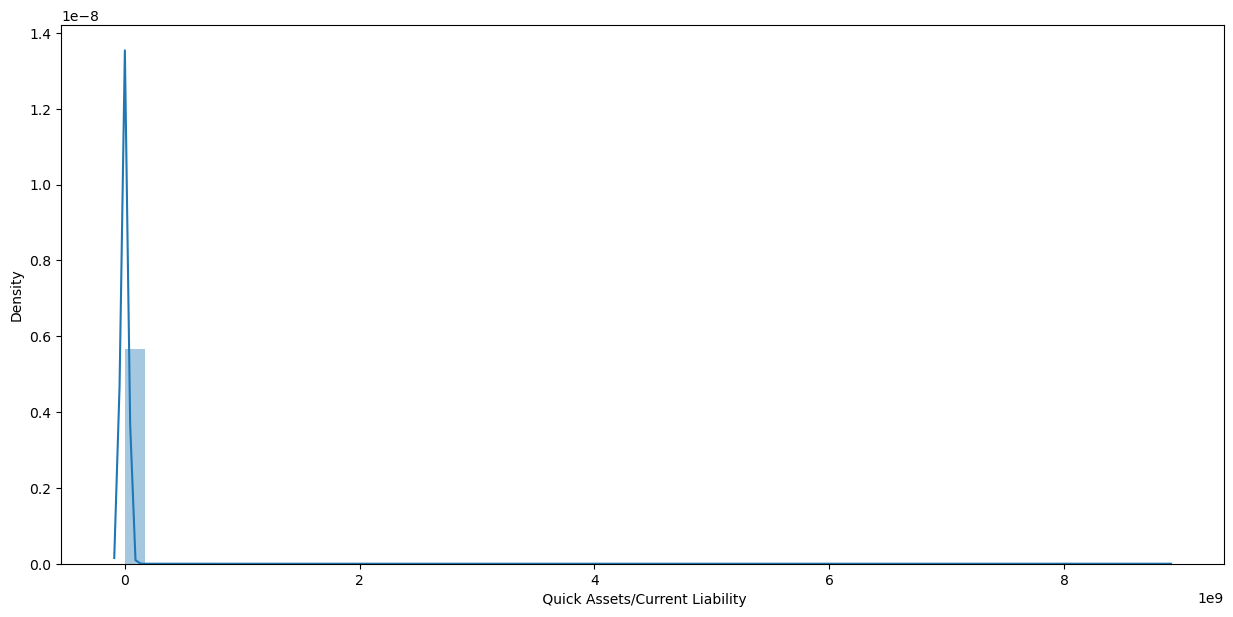

 Cash/Current Liability
14.860497831392582


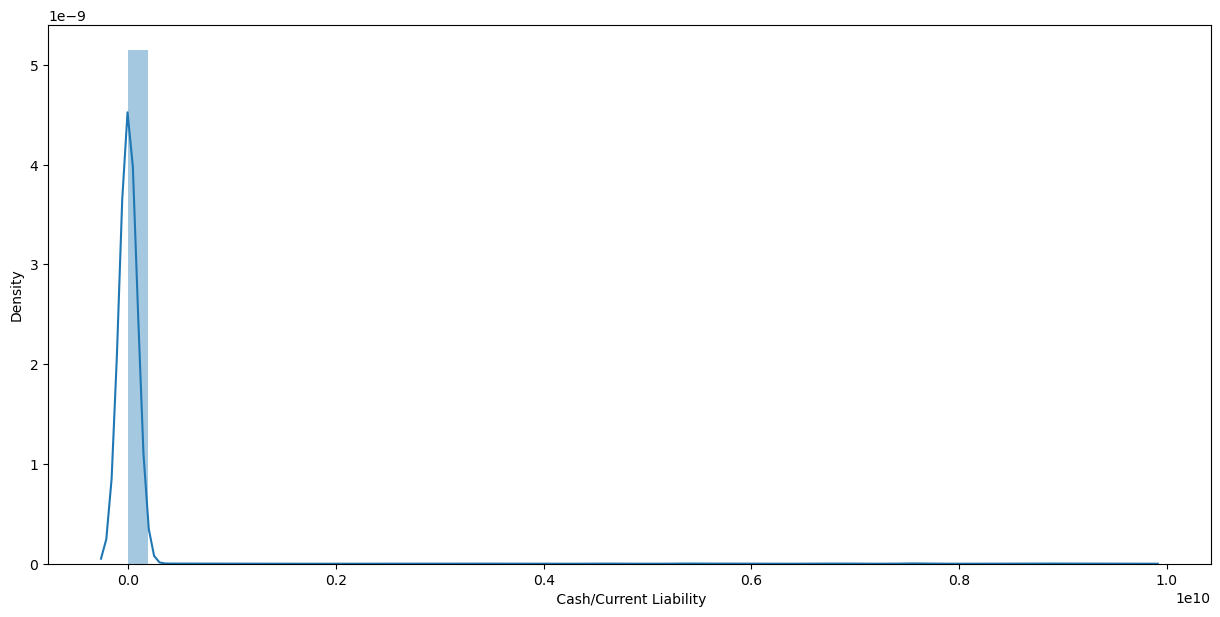

 Current Liability to Assets
1.607849623097504


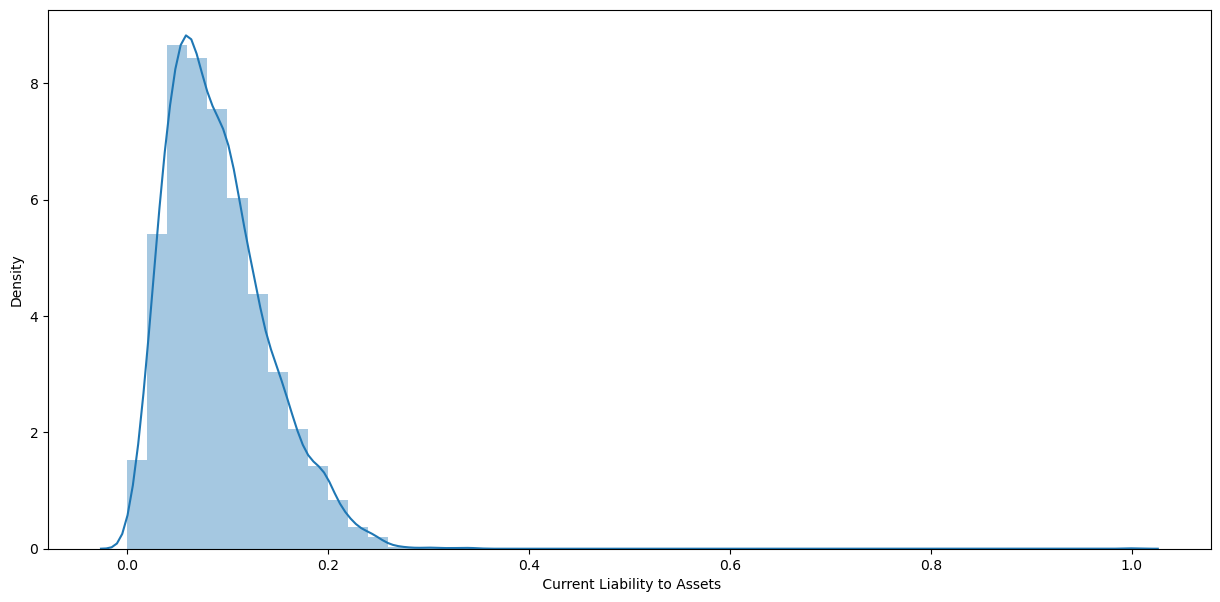

 Operating Funds to Liability
3.7764663326103007


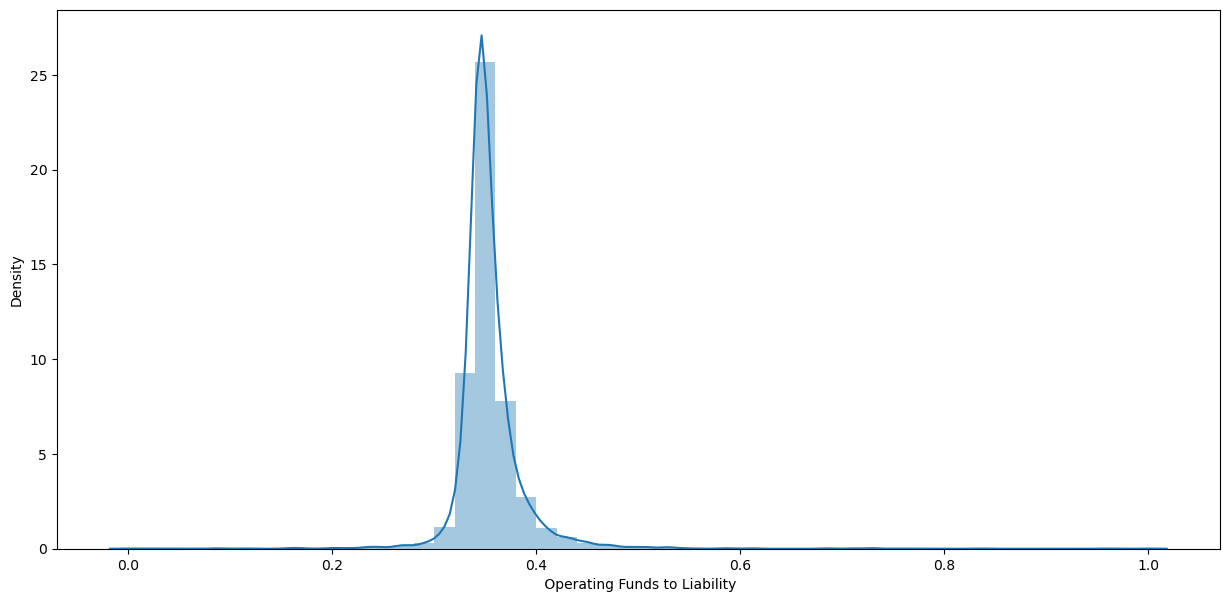

 Inventory/Working Capital
45.3222771370695


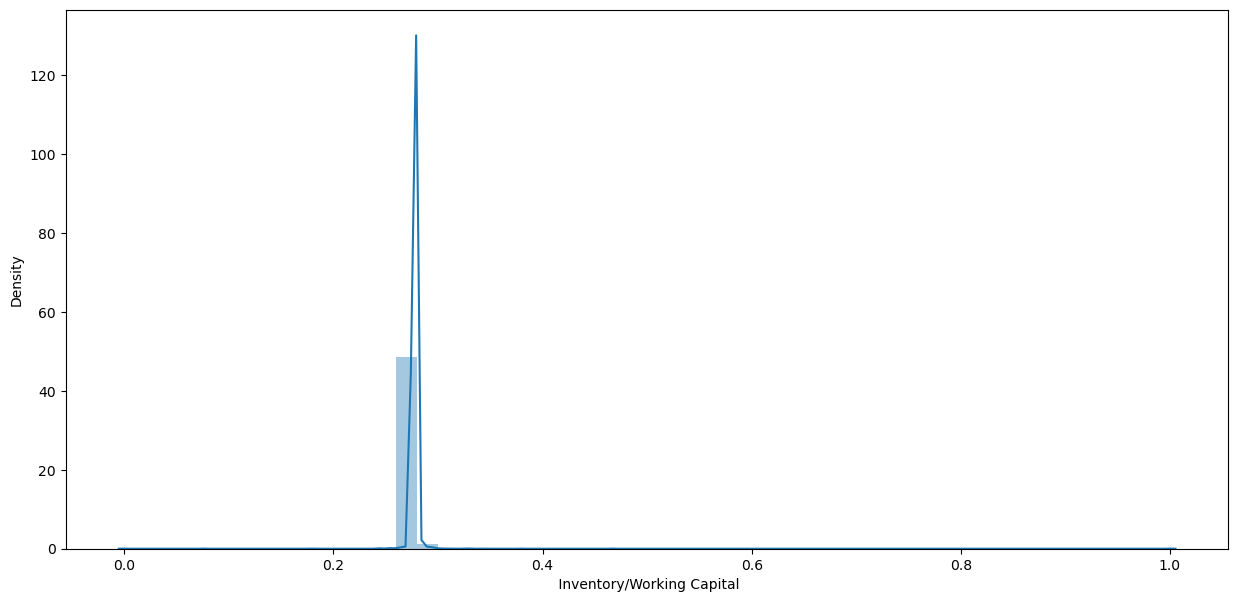

 Inventory/Current Liability
11.962955873864377


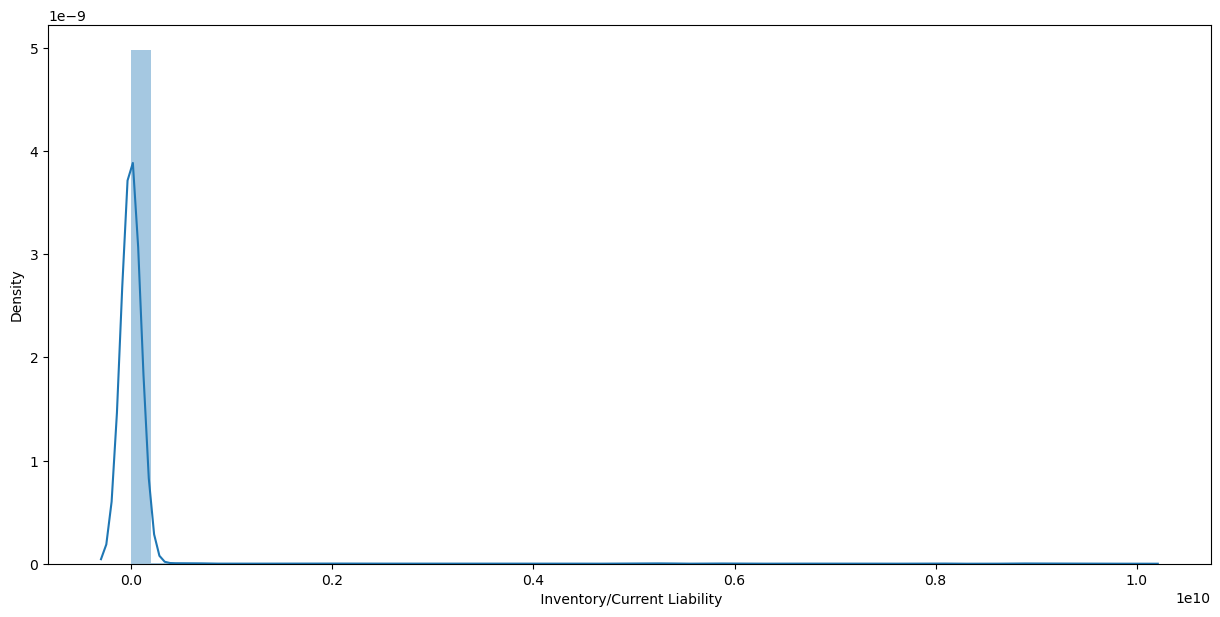

 Current Liabilities/Liability
-0.8348632009375933


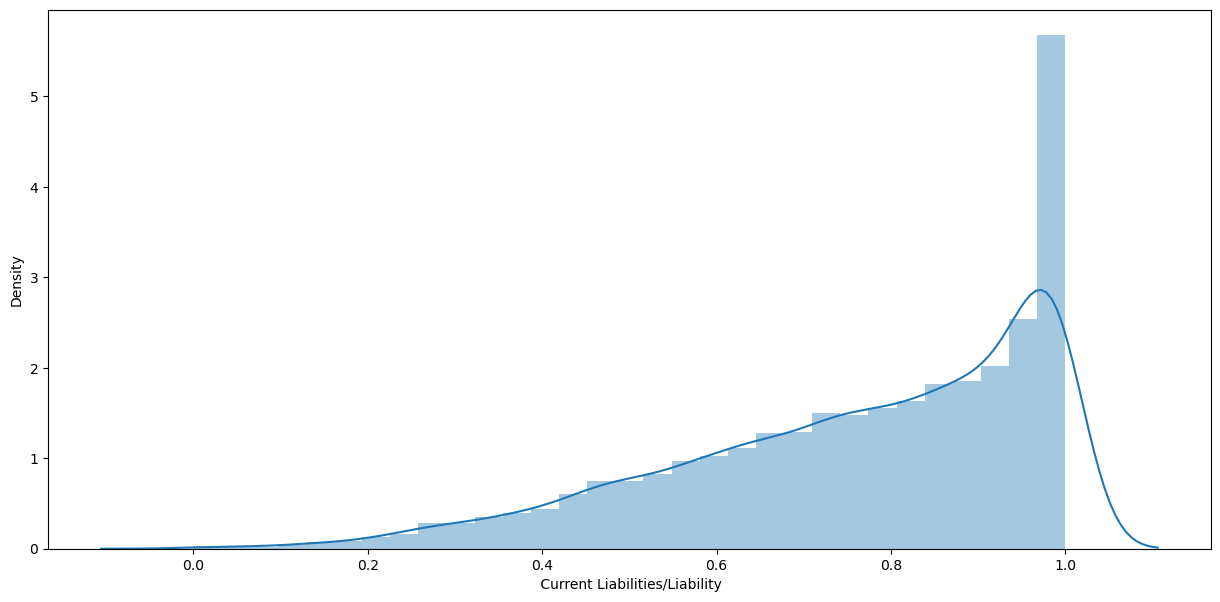

 Working Capital/Equity
-36.195689718256155


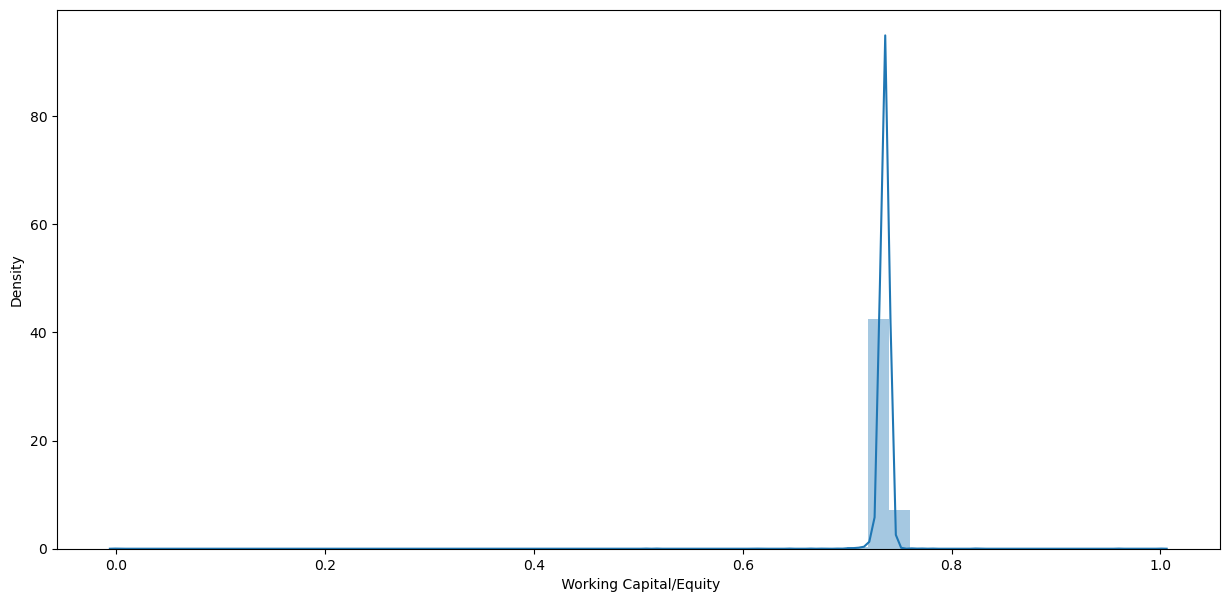

 Current Liabilities/Equity
23.79392923714183


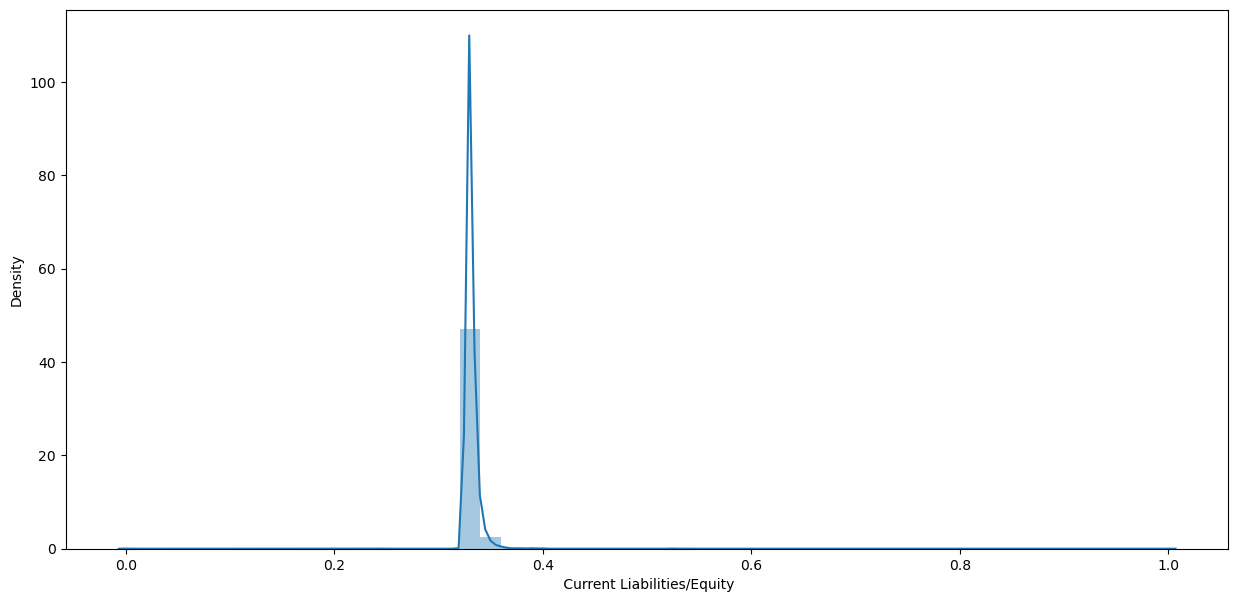

 Long-term Liability to Current Assets
12.39887892189244


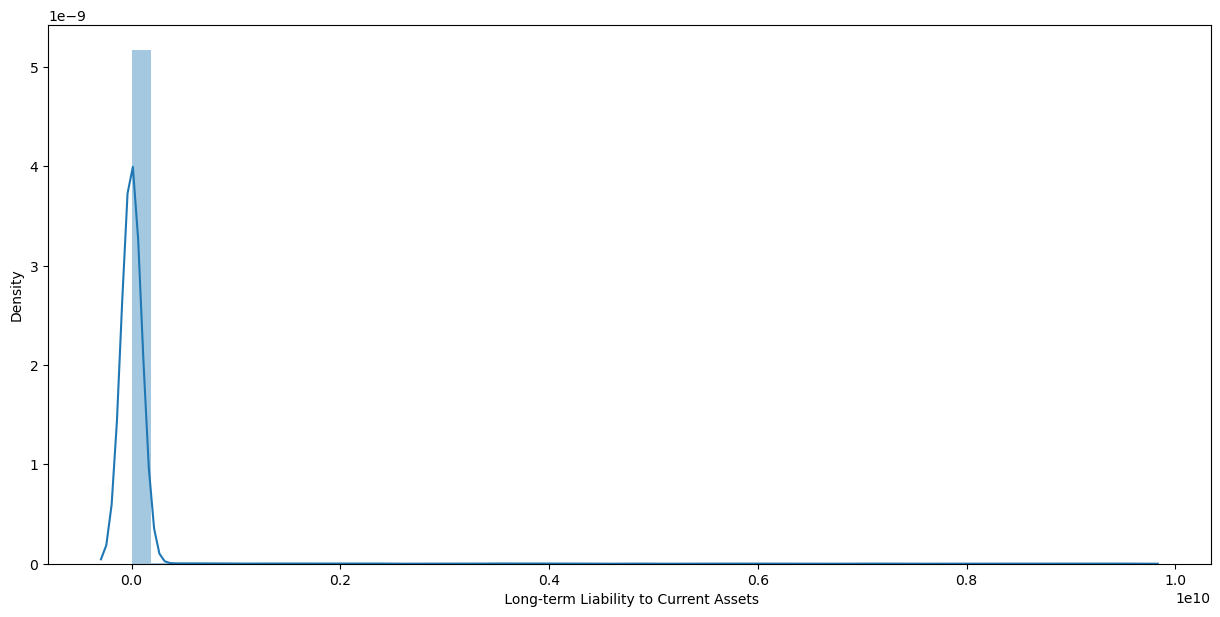

 Retained Earnings to Total Assets
-11.137123414330752


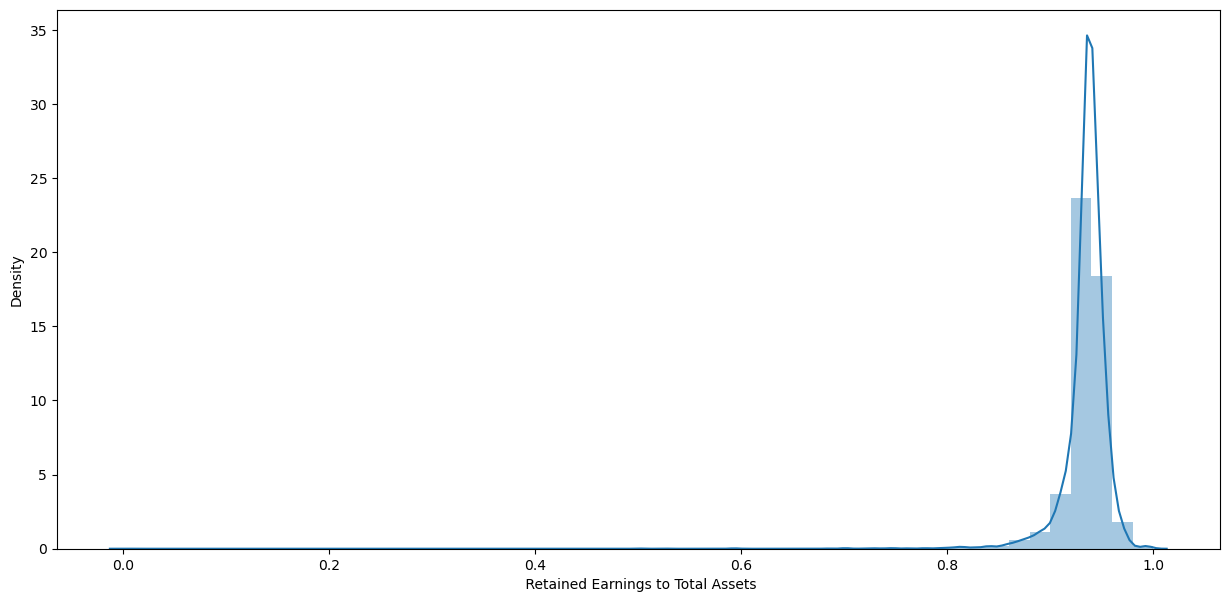

 Total income/Total expense
82.31431171350266


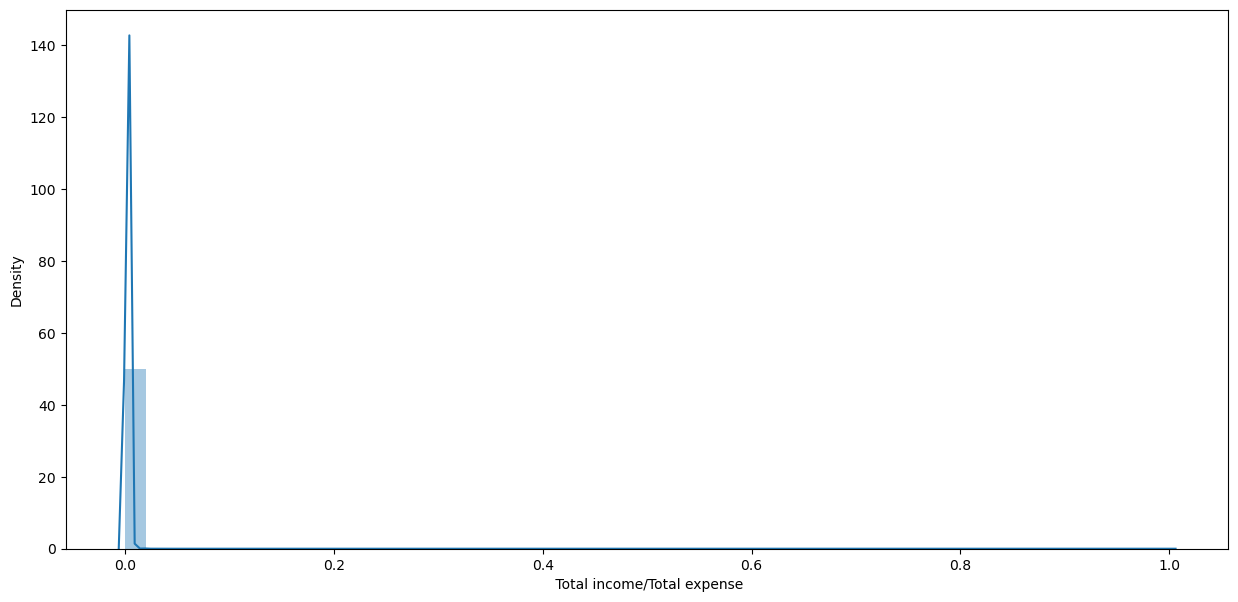

 Total expense/Assets
9.479641696147775


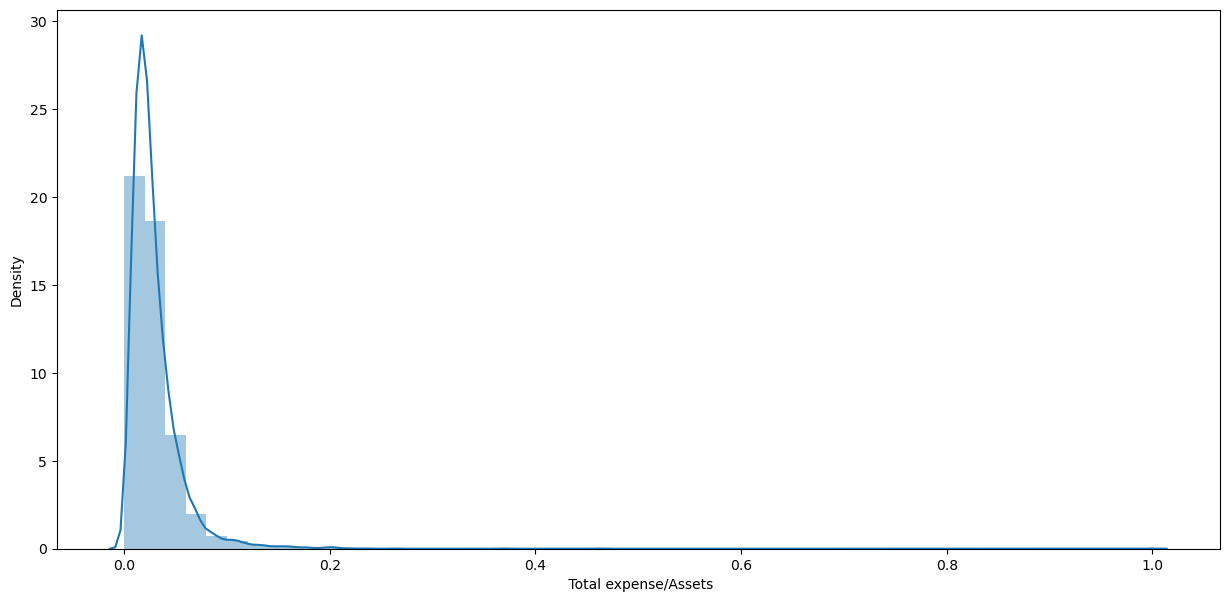

 Current Asset Turnover Rate
2.1154901555722523


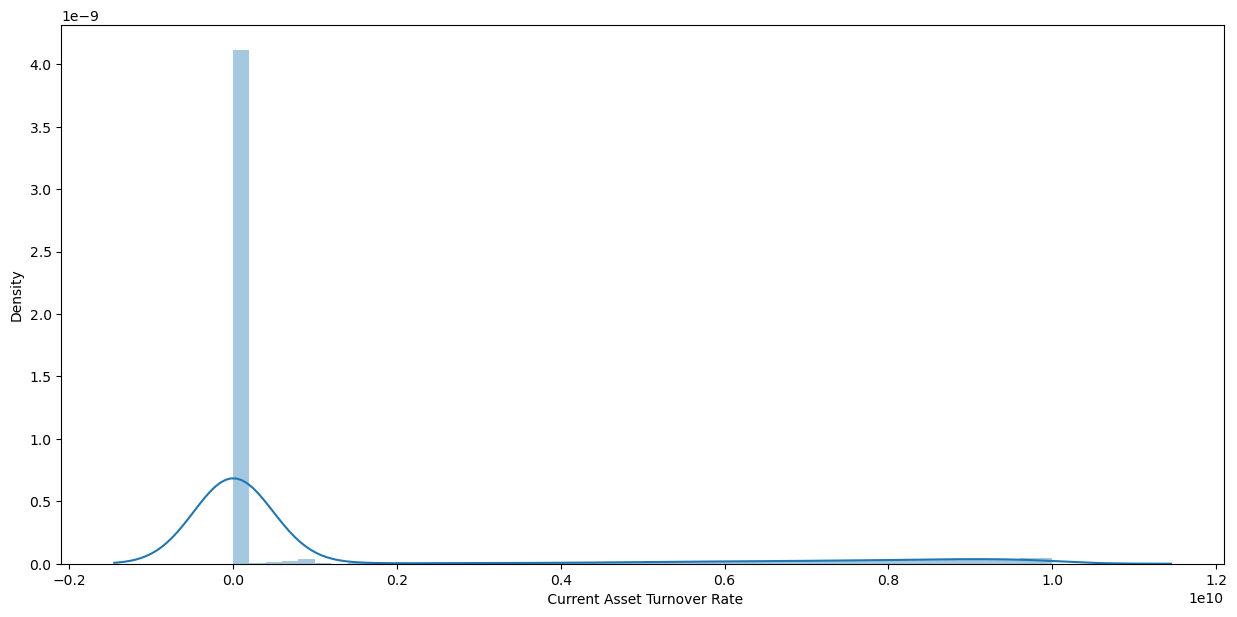

 Quick Asset Turnover Rate
1.1371032563472043


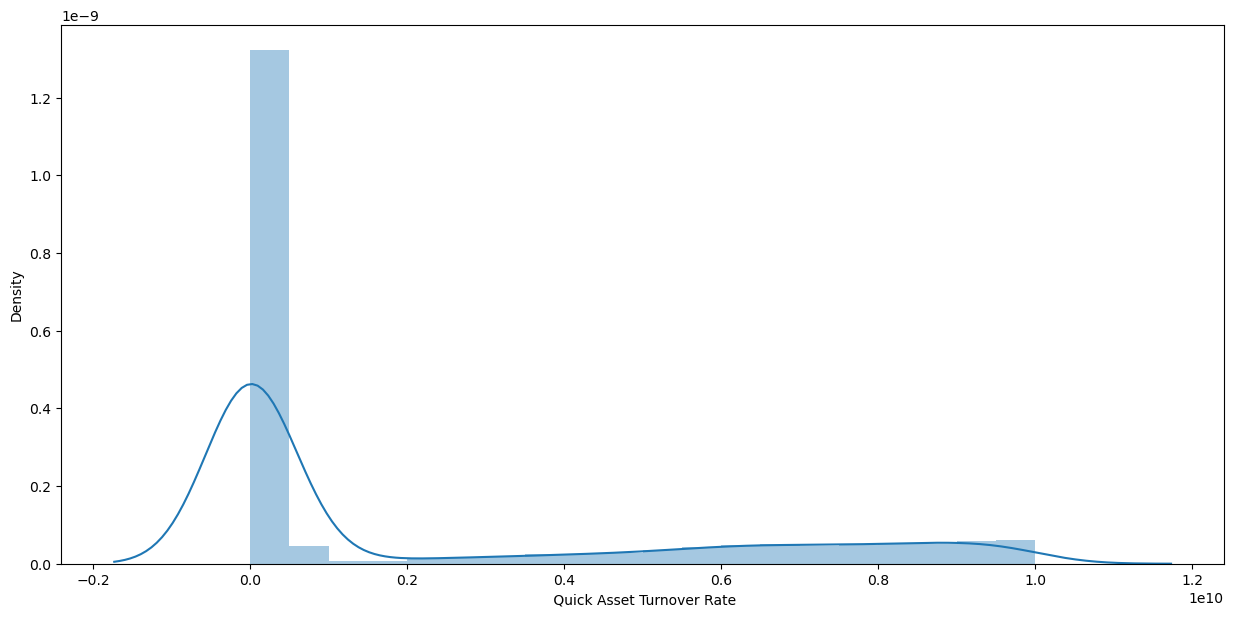

 Working capitcal Turnover Rate
-28.57832238661453


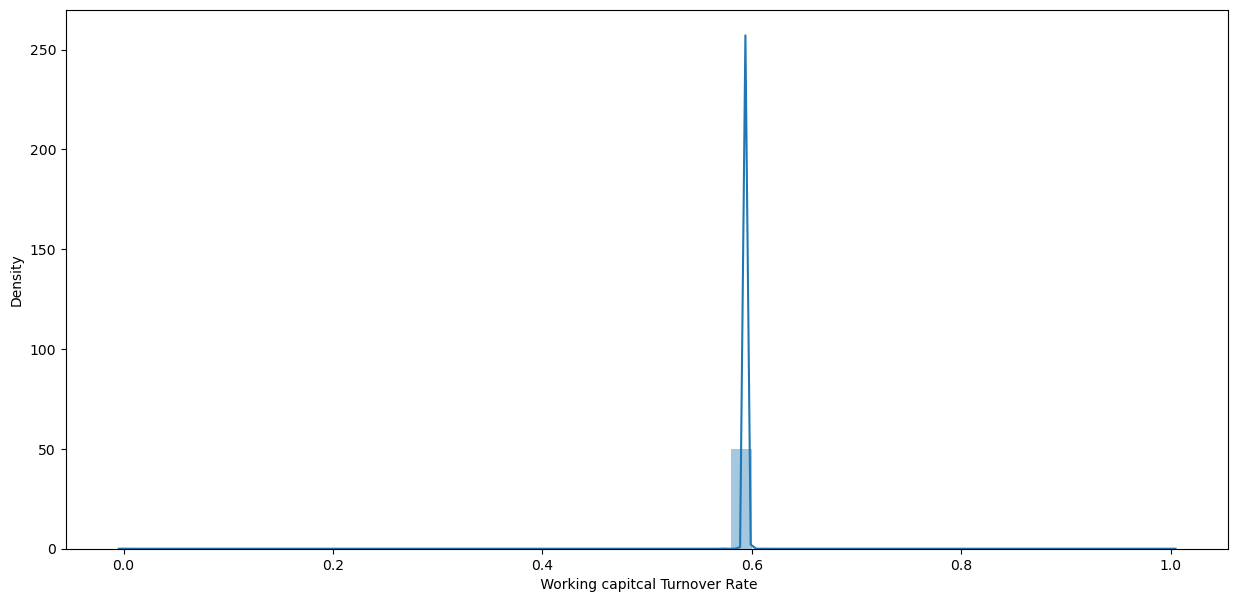

 Cash Turnover Rate
0.953907162488574


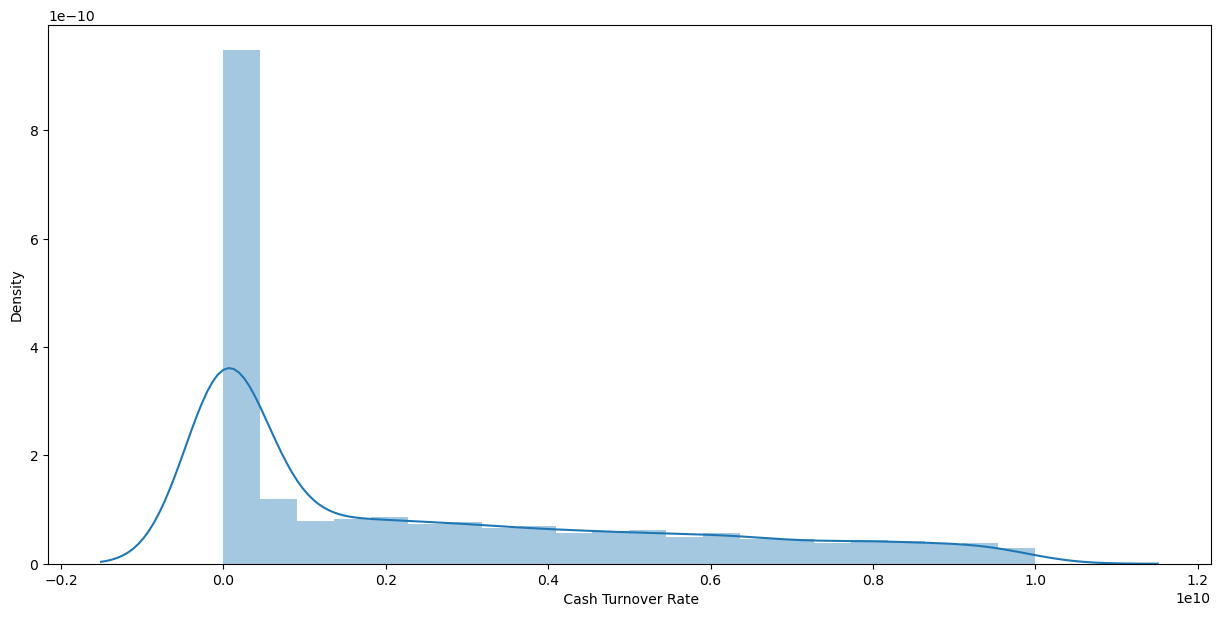

 Cash Flow to Sales
-47.85858154492399


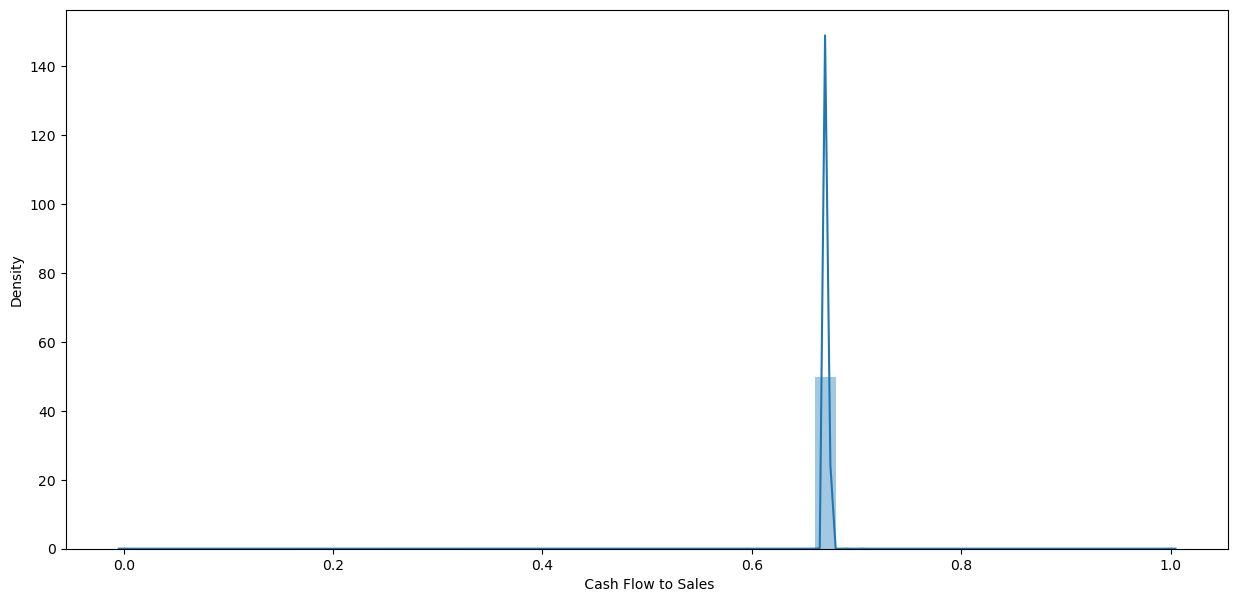

 Fixed Assets to Assets
82.55907065047784


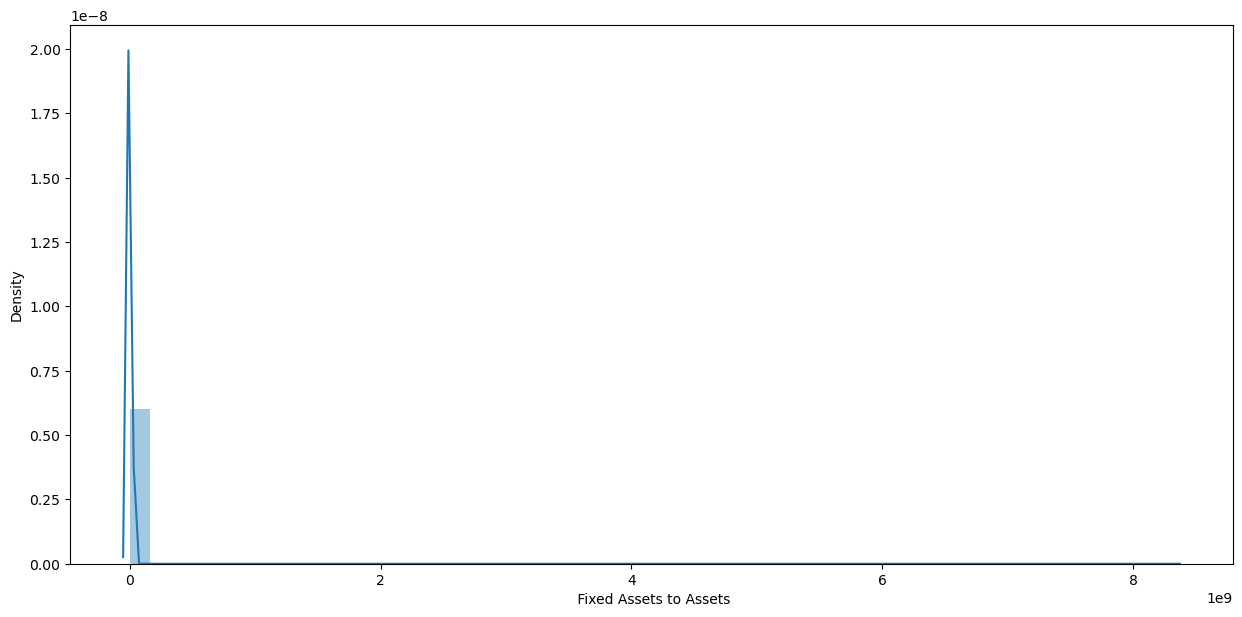

 Current Liability to Liability
-0.8348632009375933


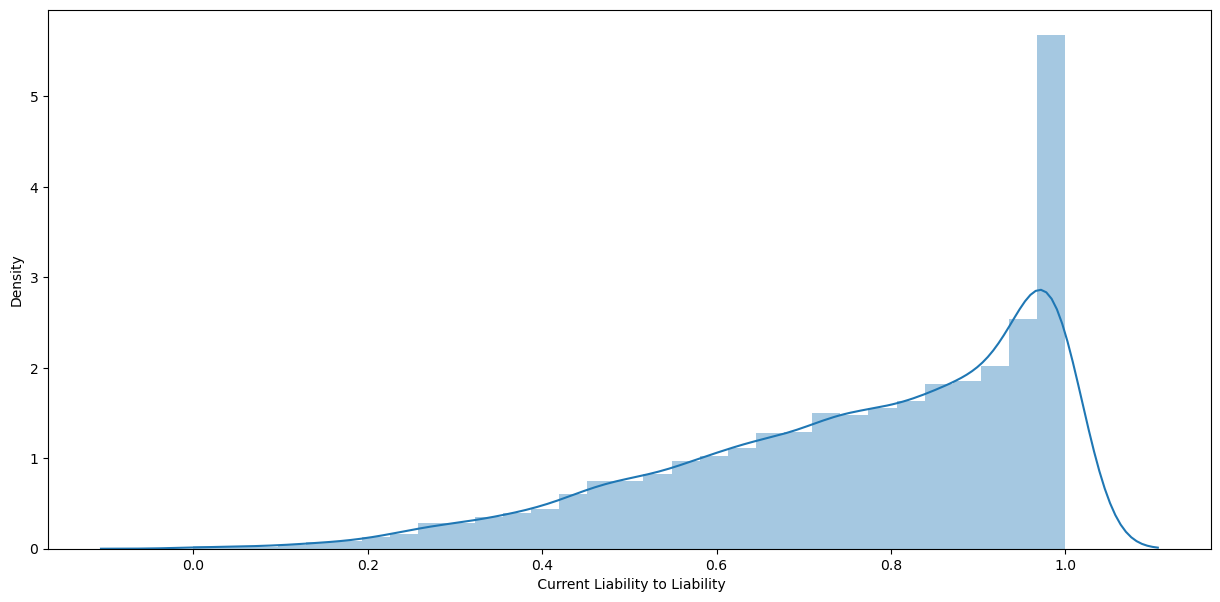

 Current Liability to Equity
23.79392923714183


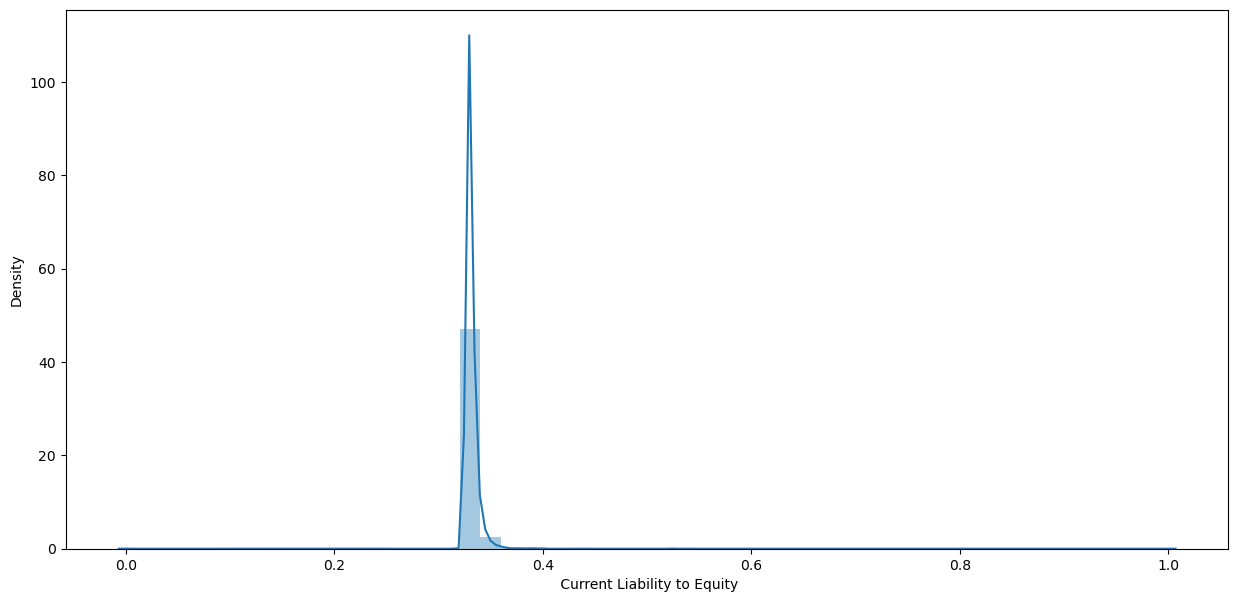

 Equity to Long-term Liability
33.78250641792069


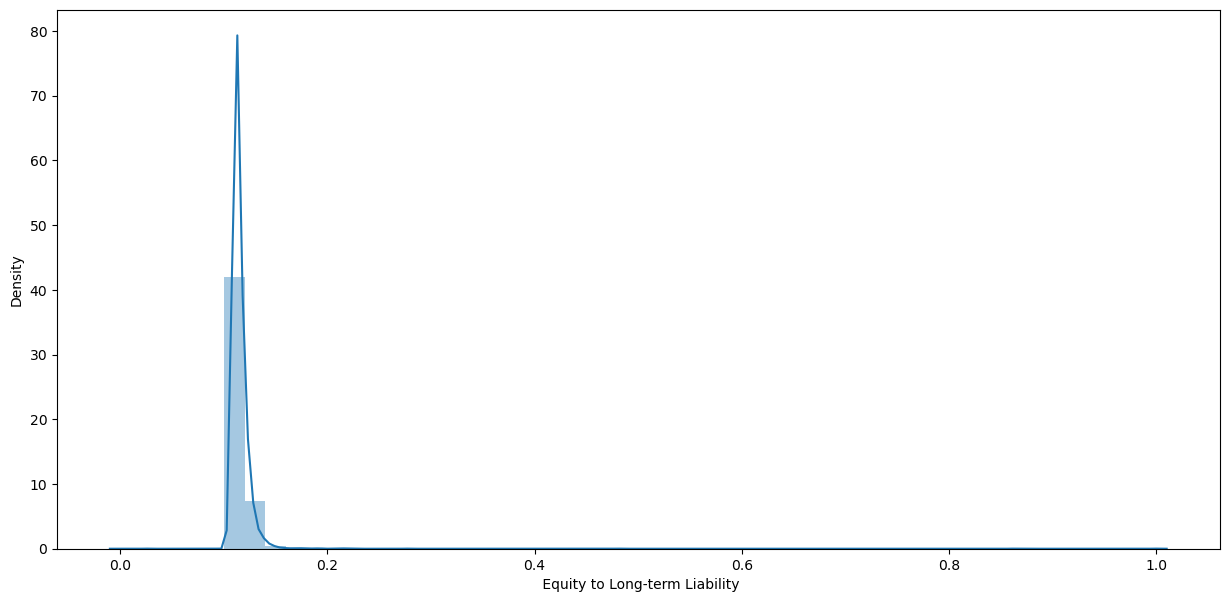

 Cash Flow to Total Assets
-0.22810748143902004


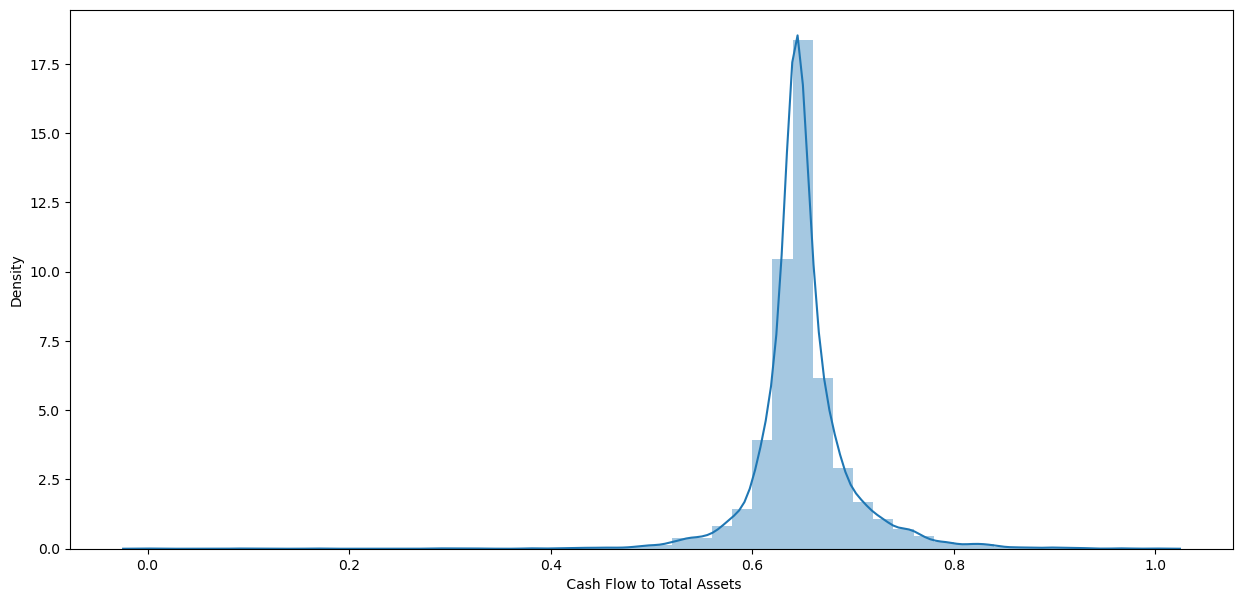

 Cash Flow to Liability
1.0077409980689034


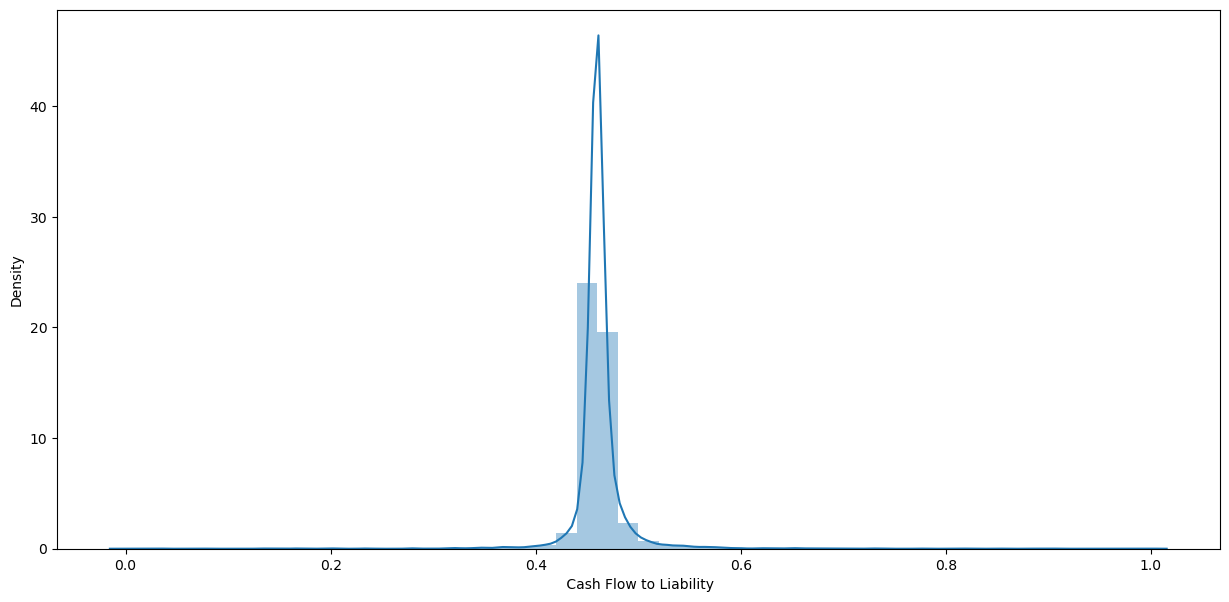

 CFO to Assets
-0.4436648396536406


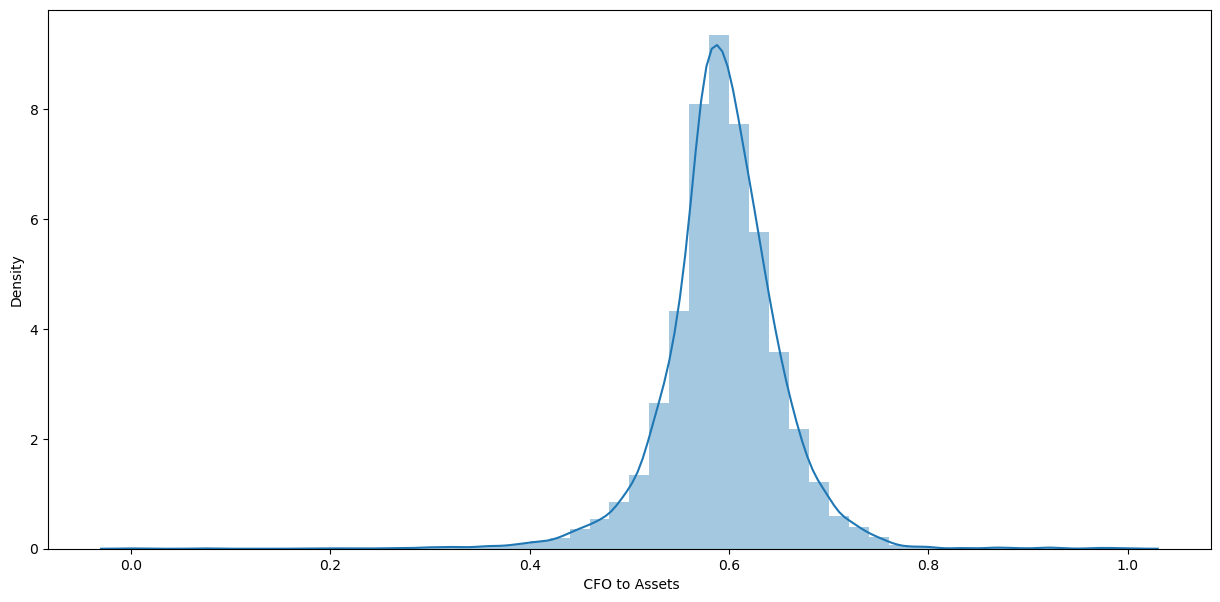

 Cash Flow to Equity
19.93910085850765


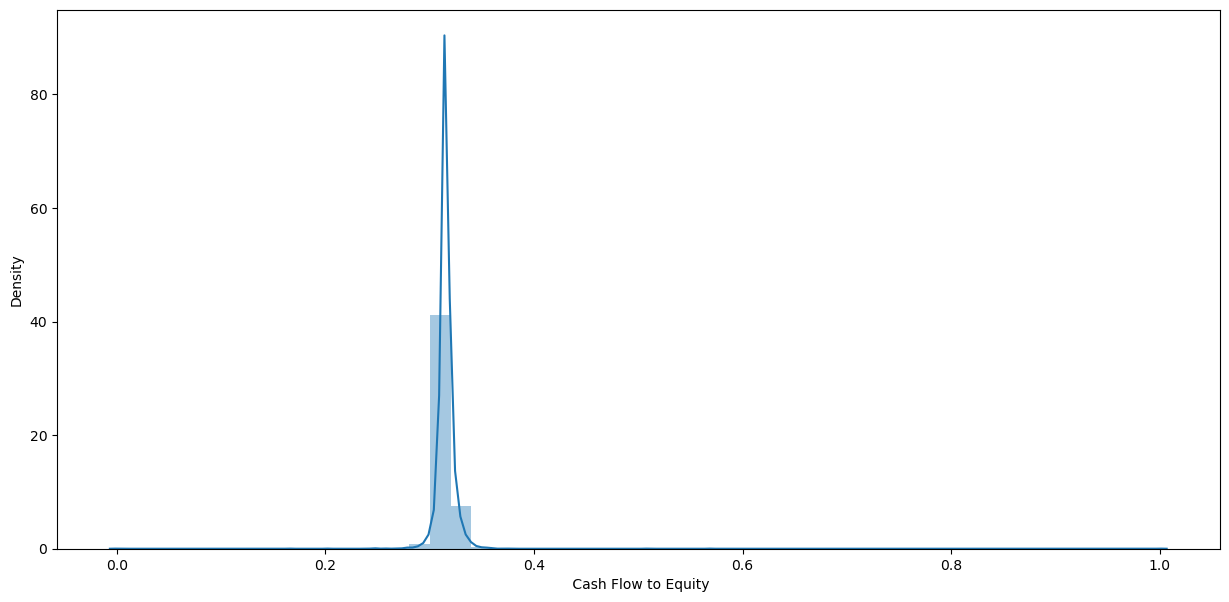

 Current Liability to Current Assets
13.185759207452024


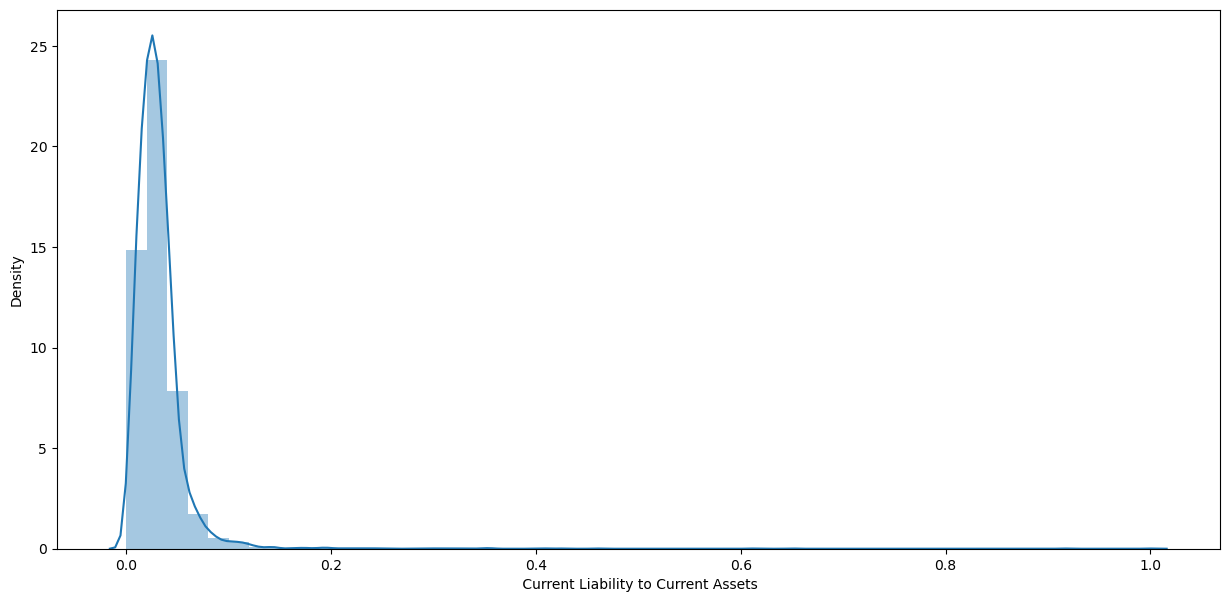

 Liability-Assets Flag
29.144058992709777


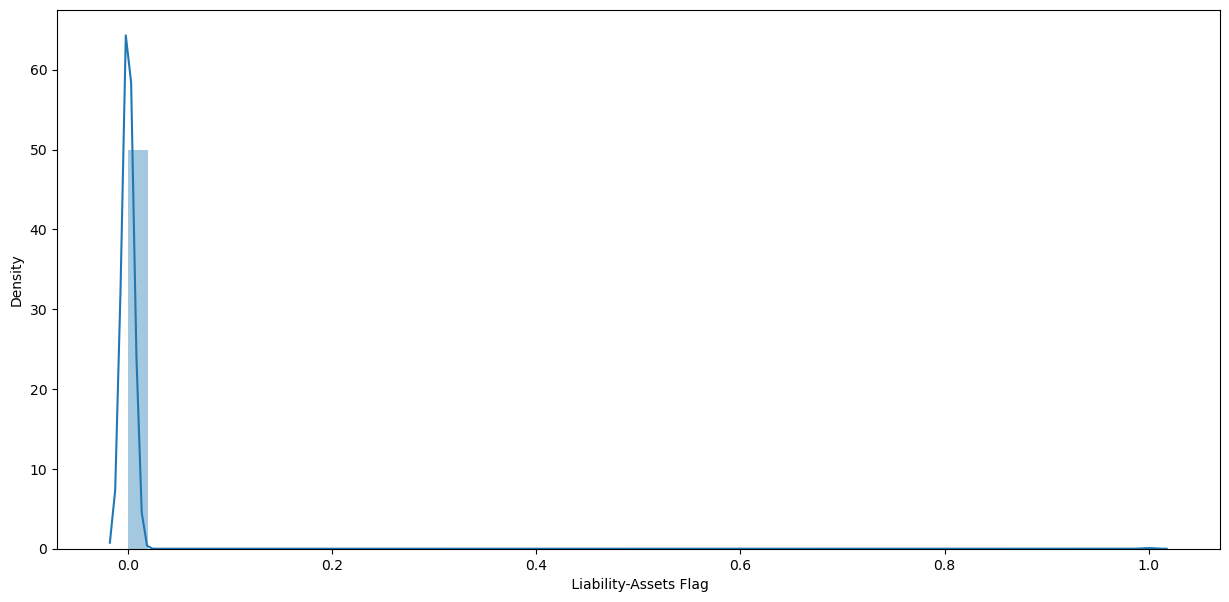

 Net Income to Total Assets
-3.683286320177034


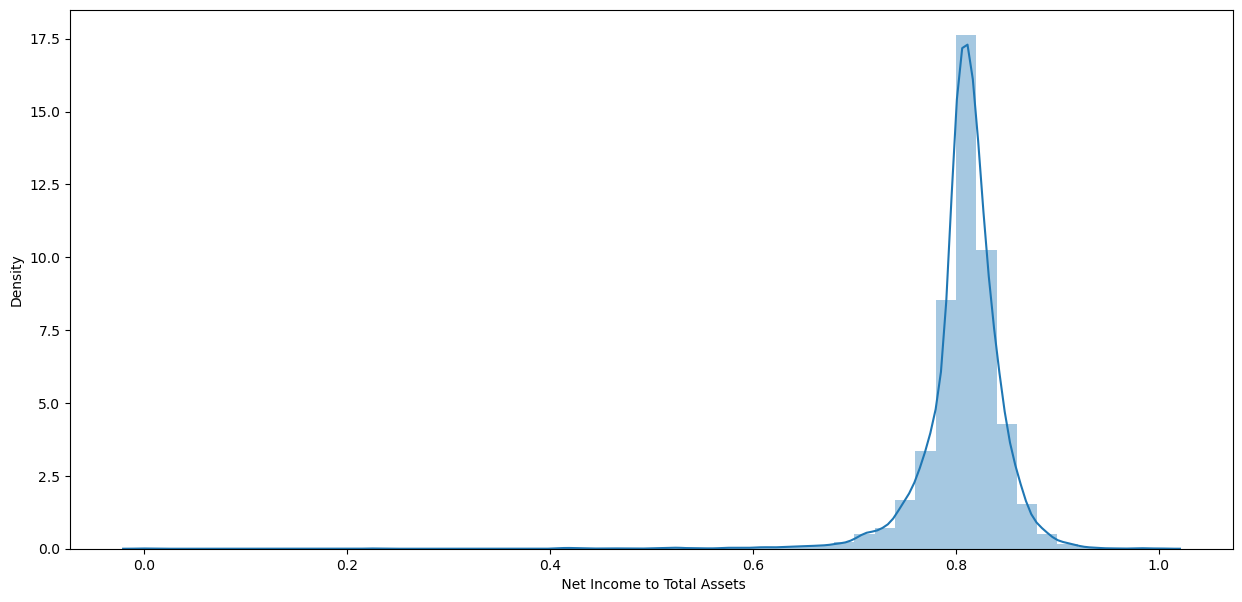

 Total assets to GNP price
21.75419627984264


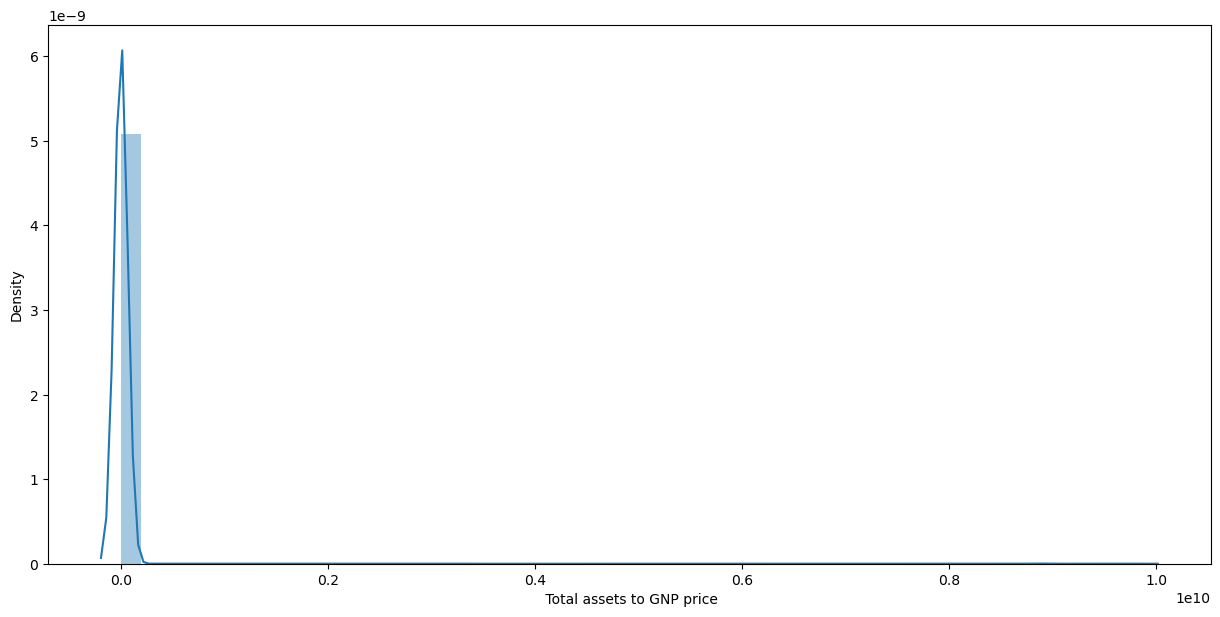

 No-credit Interval
-11.583016447729667


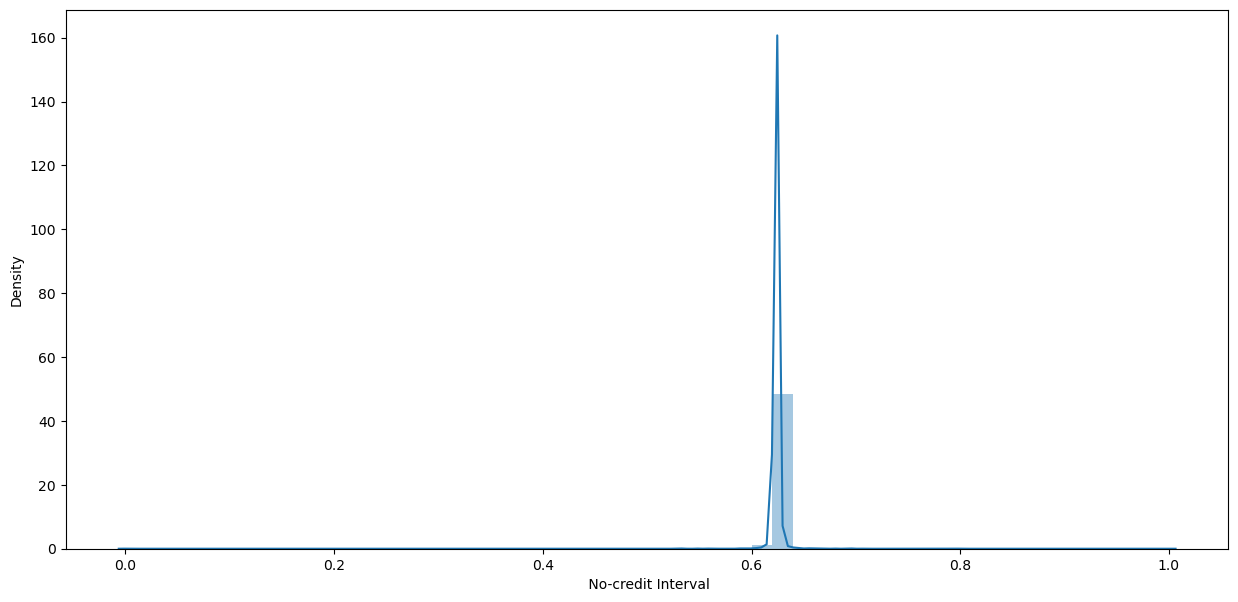

 Gross Profit to Sales
-8.041455197181818


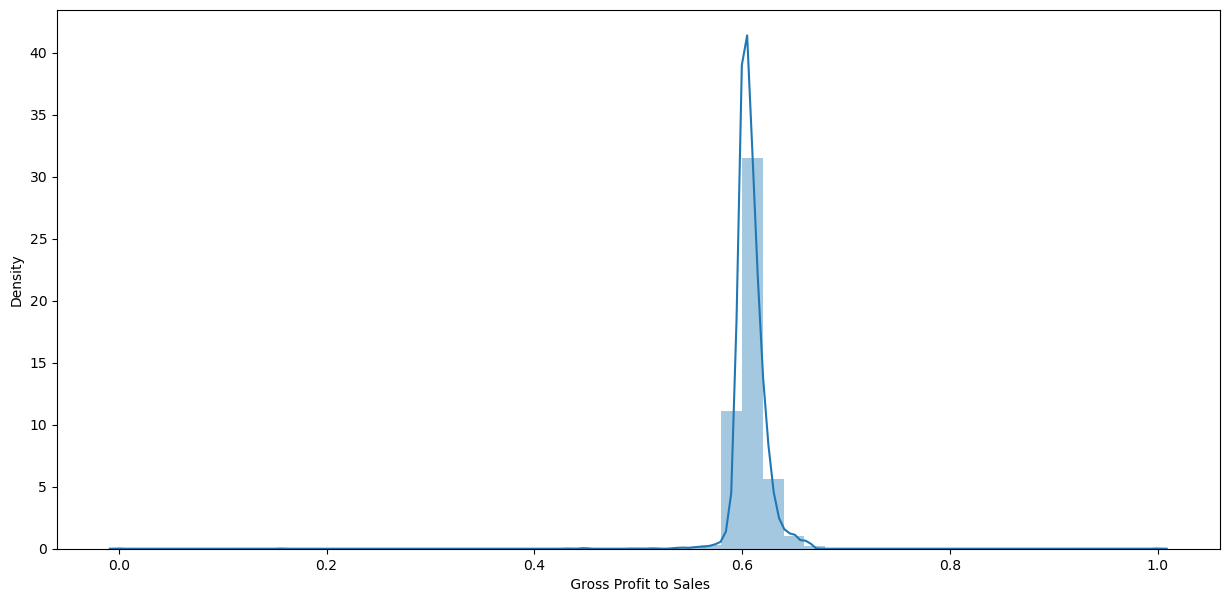

 Net Income to Stockholder's Equity
-37.956349385997754


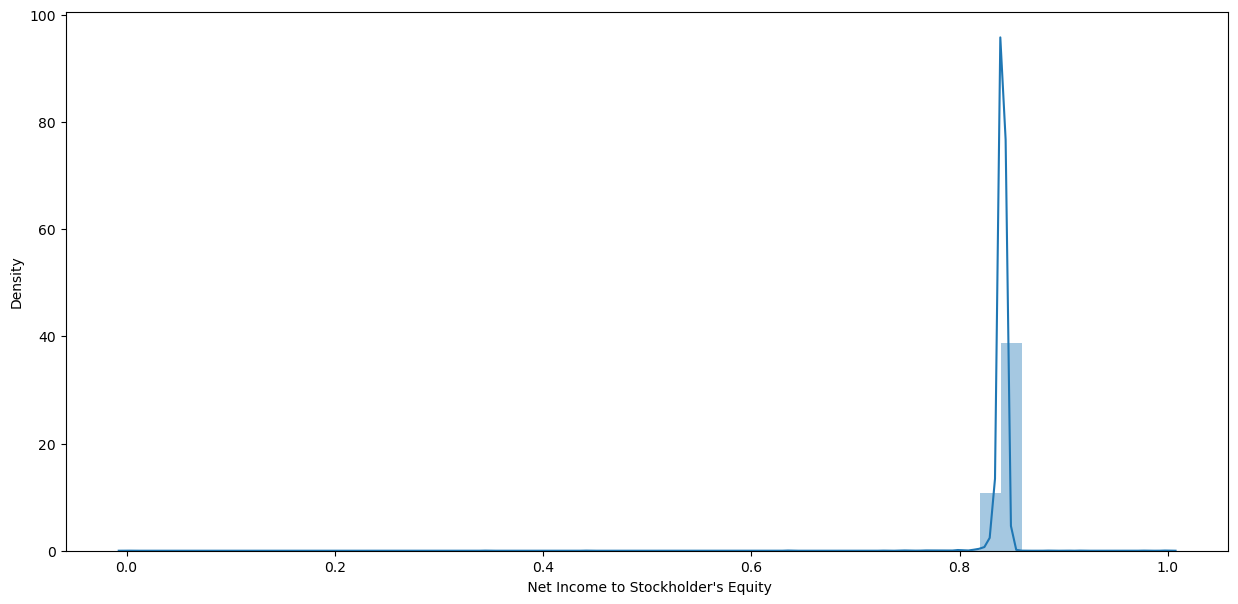

 Liability to Equity
27.453426420818683


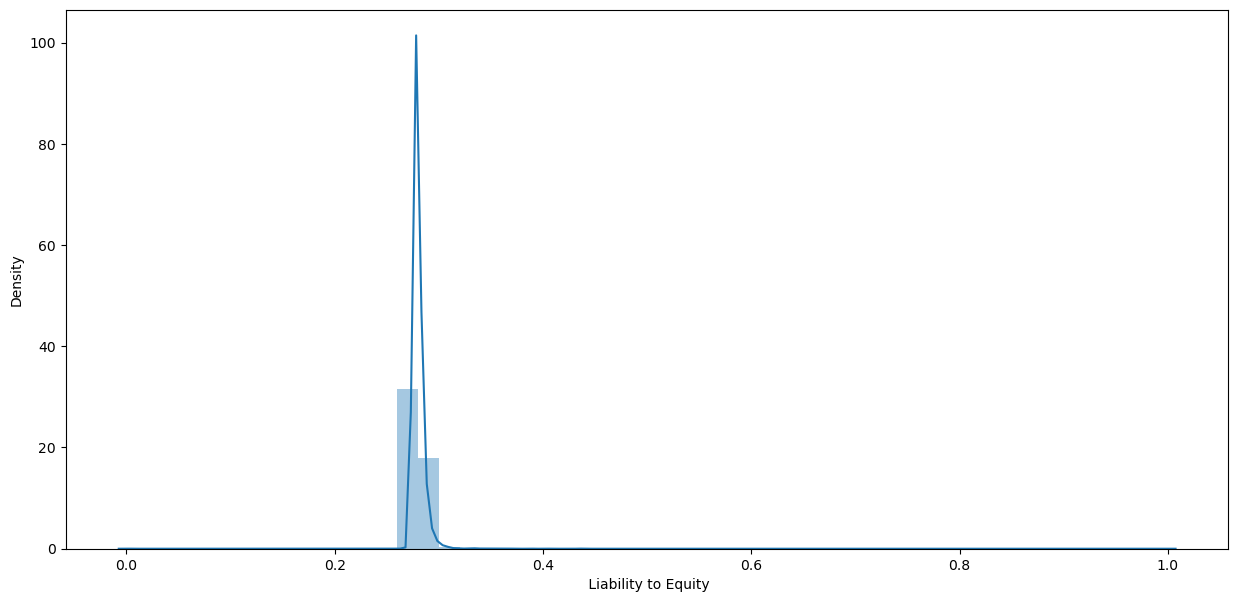

 Degree of Financial Leverage (DFL)
45.71413838129838


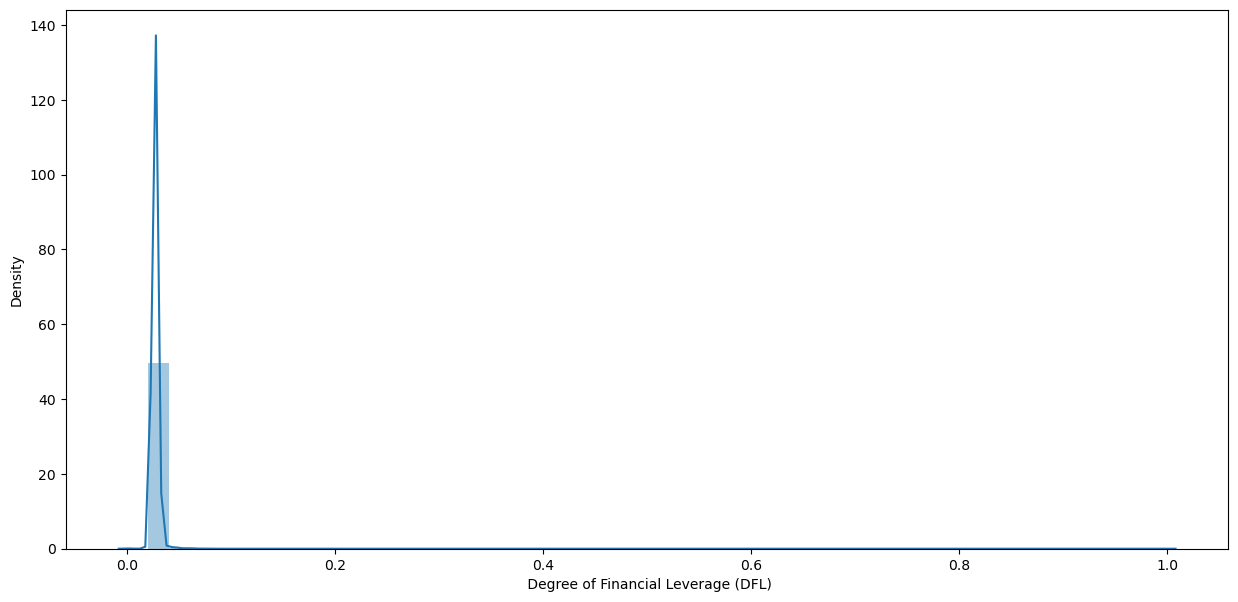

 Interest Coverage Ratio (Interest expense to EBIT)
-13.936461376860766


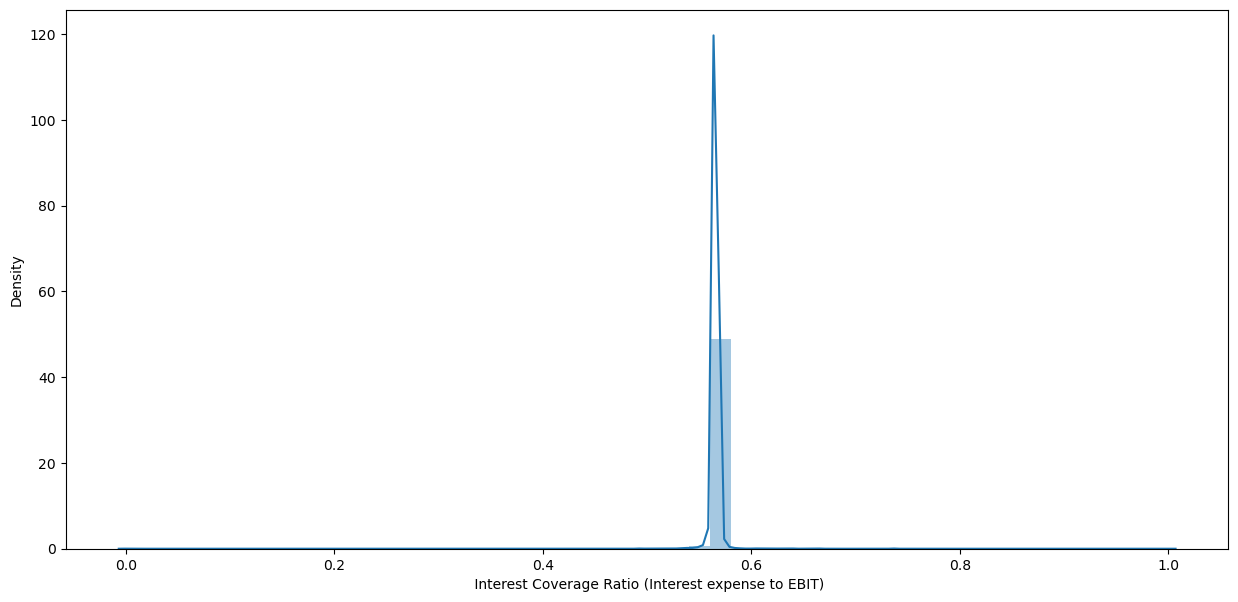

 Equity to Liability
7.3994726880151305


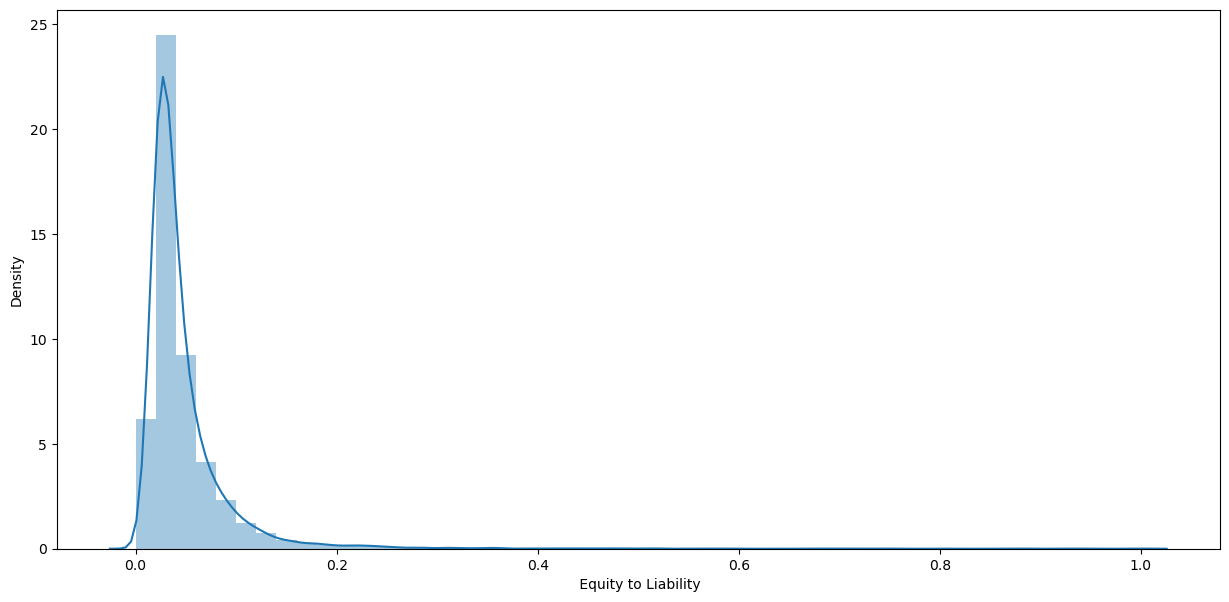

Bankrupt
5.294222599216838


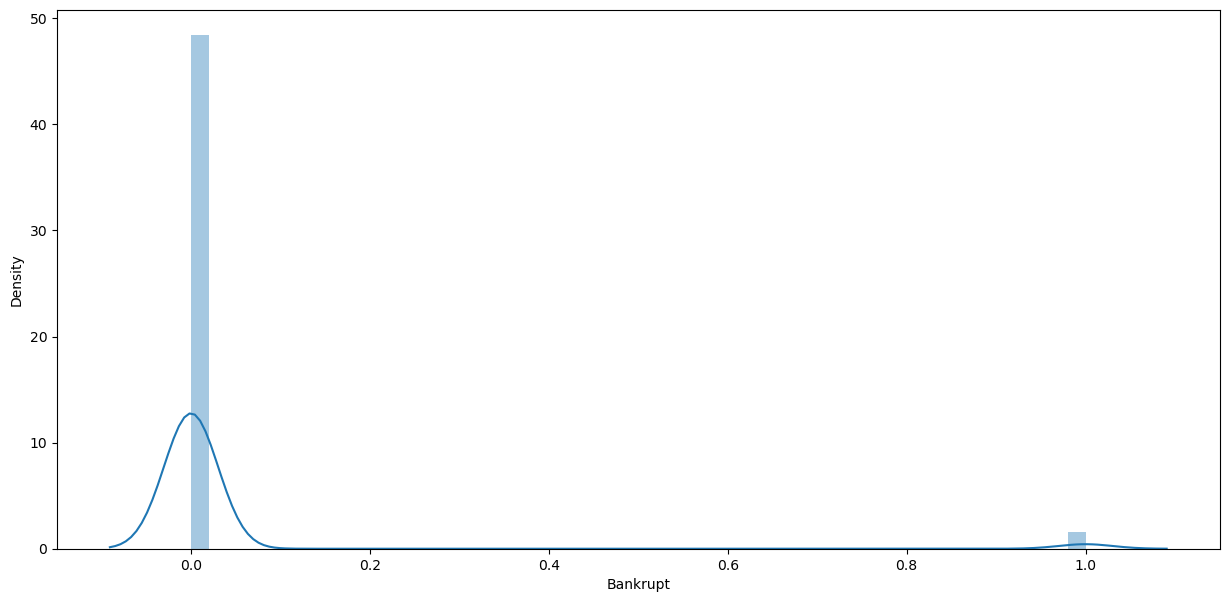

In [14]:
for col in data:
    print(col)
    print(stats.skew(data[col]))
    
    plt.figure()
    sns.distplot(data[col])
    plt.show()

In [15]:
skew=[]
for i in data.columns:
    skew.append(data.loc[:,i].skew())

In [16]:
skew_dict={'features': data.columns, 'skewness':skew}
skew_data= pd.DataFrame(skew_dict)
skew_data

features   skewness
0    ROA(C) before interest and depreciation befor...  -0.323941
1              ROA(A) before interest and % after tax  -1.033727
2    ROA(B) before interest and depreciation after...  -0.763564
3                              Operating Gross Margin  -8.043368
4                         Realized Sales Gross Margin  -8.066572
..                                                ...        ...
90                                Liability to Equity  27.459467
91                 Degree of Financial Leverage (DFL)  45.724197
92   Interest Coverage Ratio (Interest expense to ... -13.939528
93                                Equity to Liability   7.401101
94                                           Bankrupt   5.295388

[95 rows x 2 columns]

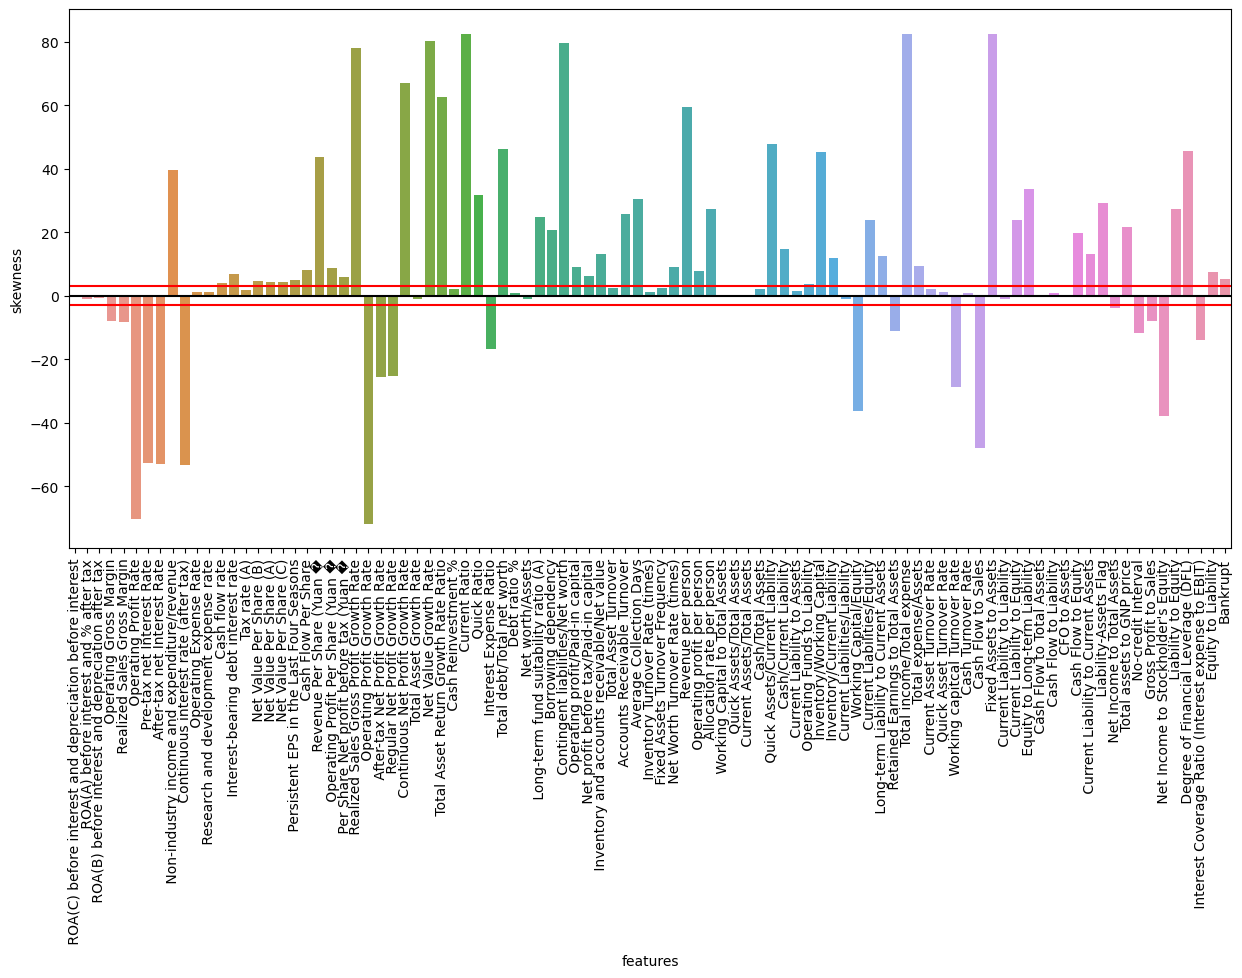

In [17]:
sns.barplot(x=skew_data['features'], y=skew_data['skewness'])
plt.axhline(y=3, color='r')
plt.axhline(y=-3, color='r')
plt.axhline(y=0, color='k')
plt.xticks(rotation=90)
plt.show()

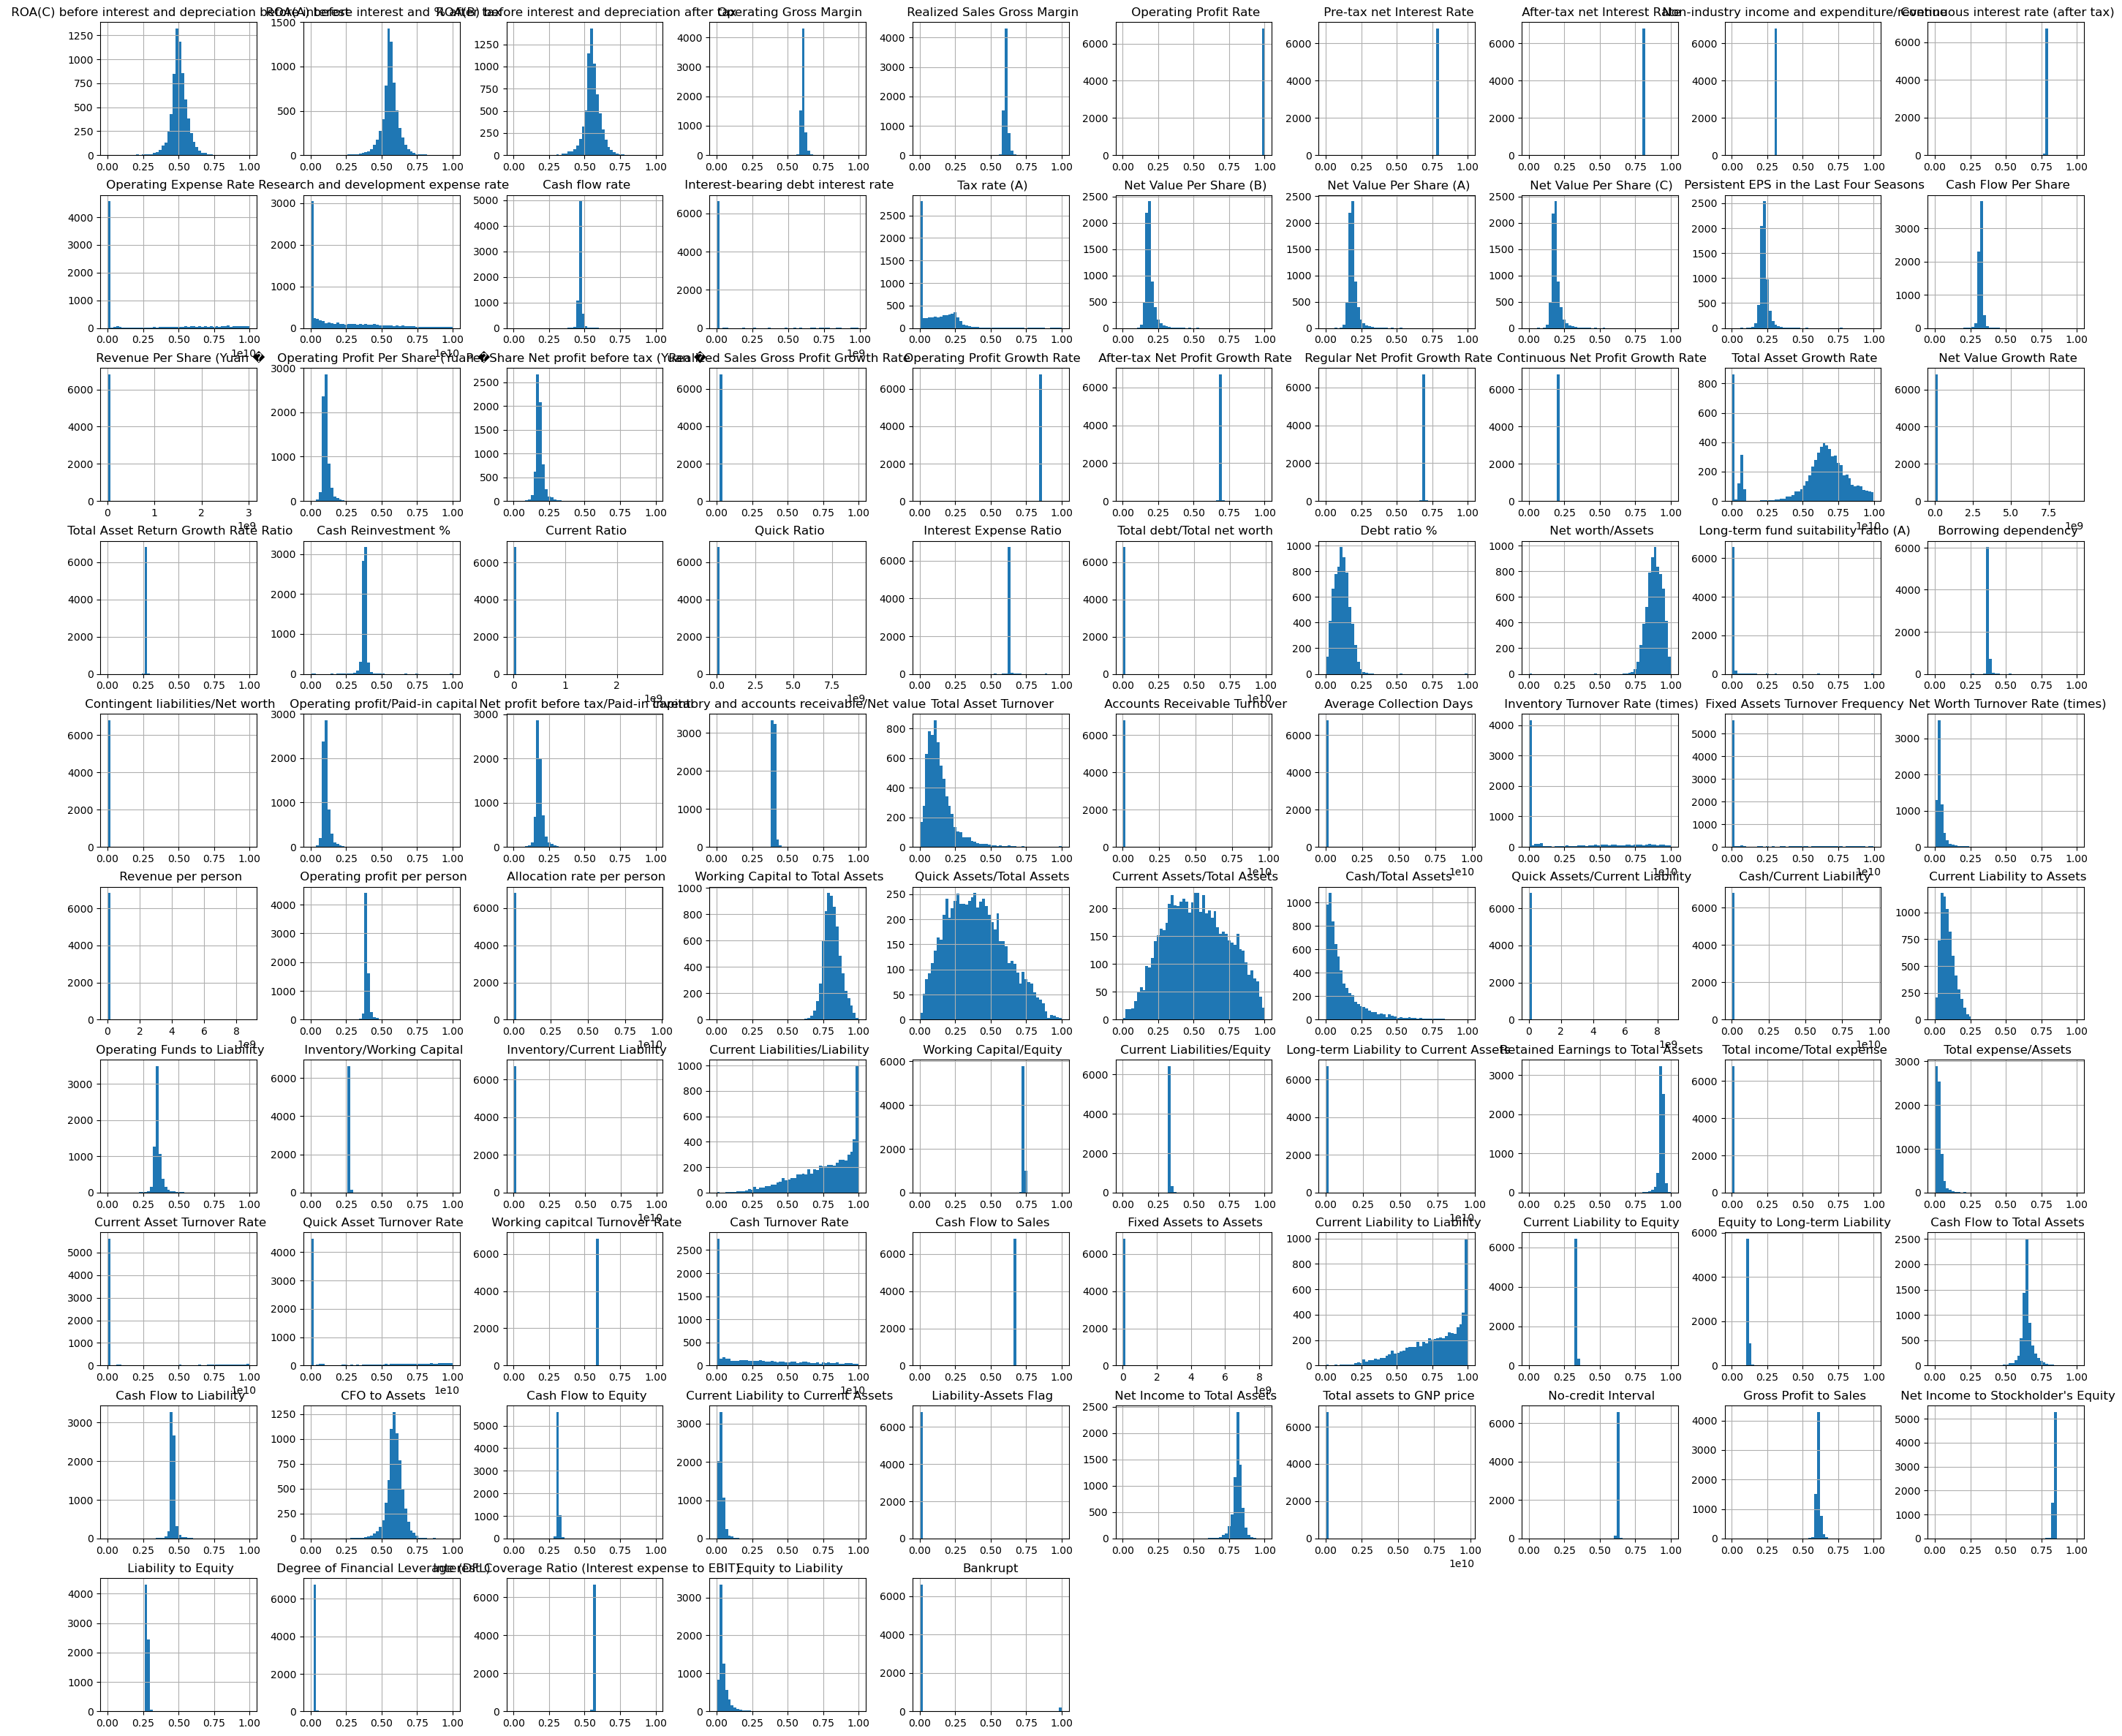

In [18]:
# Now a Glance on histogram and Heatmap for the correlation analysis..
data.hist(figsize = (35,30), bins = 50)
plt.show()

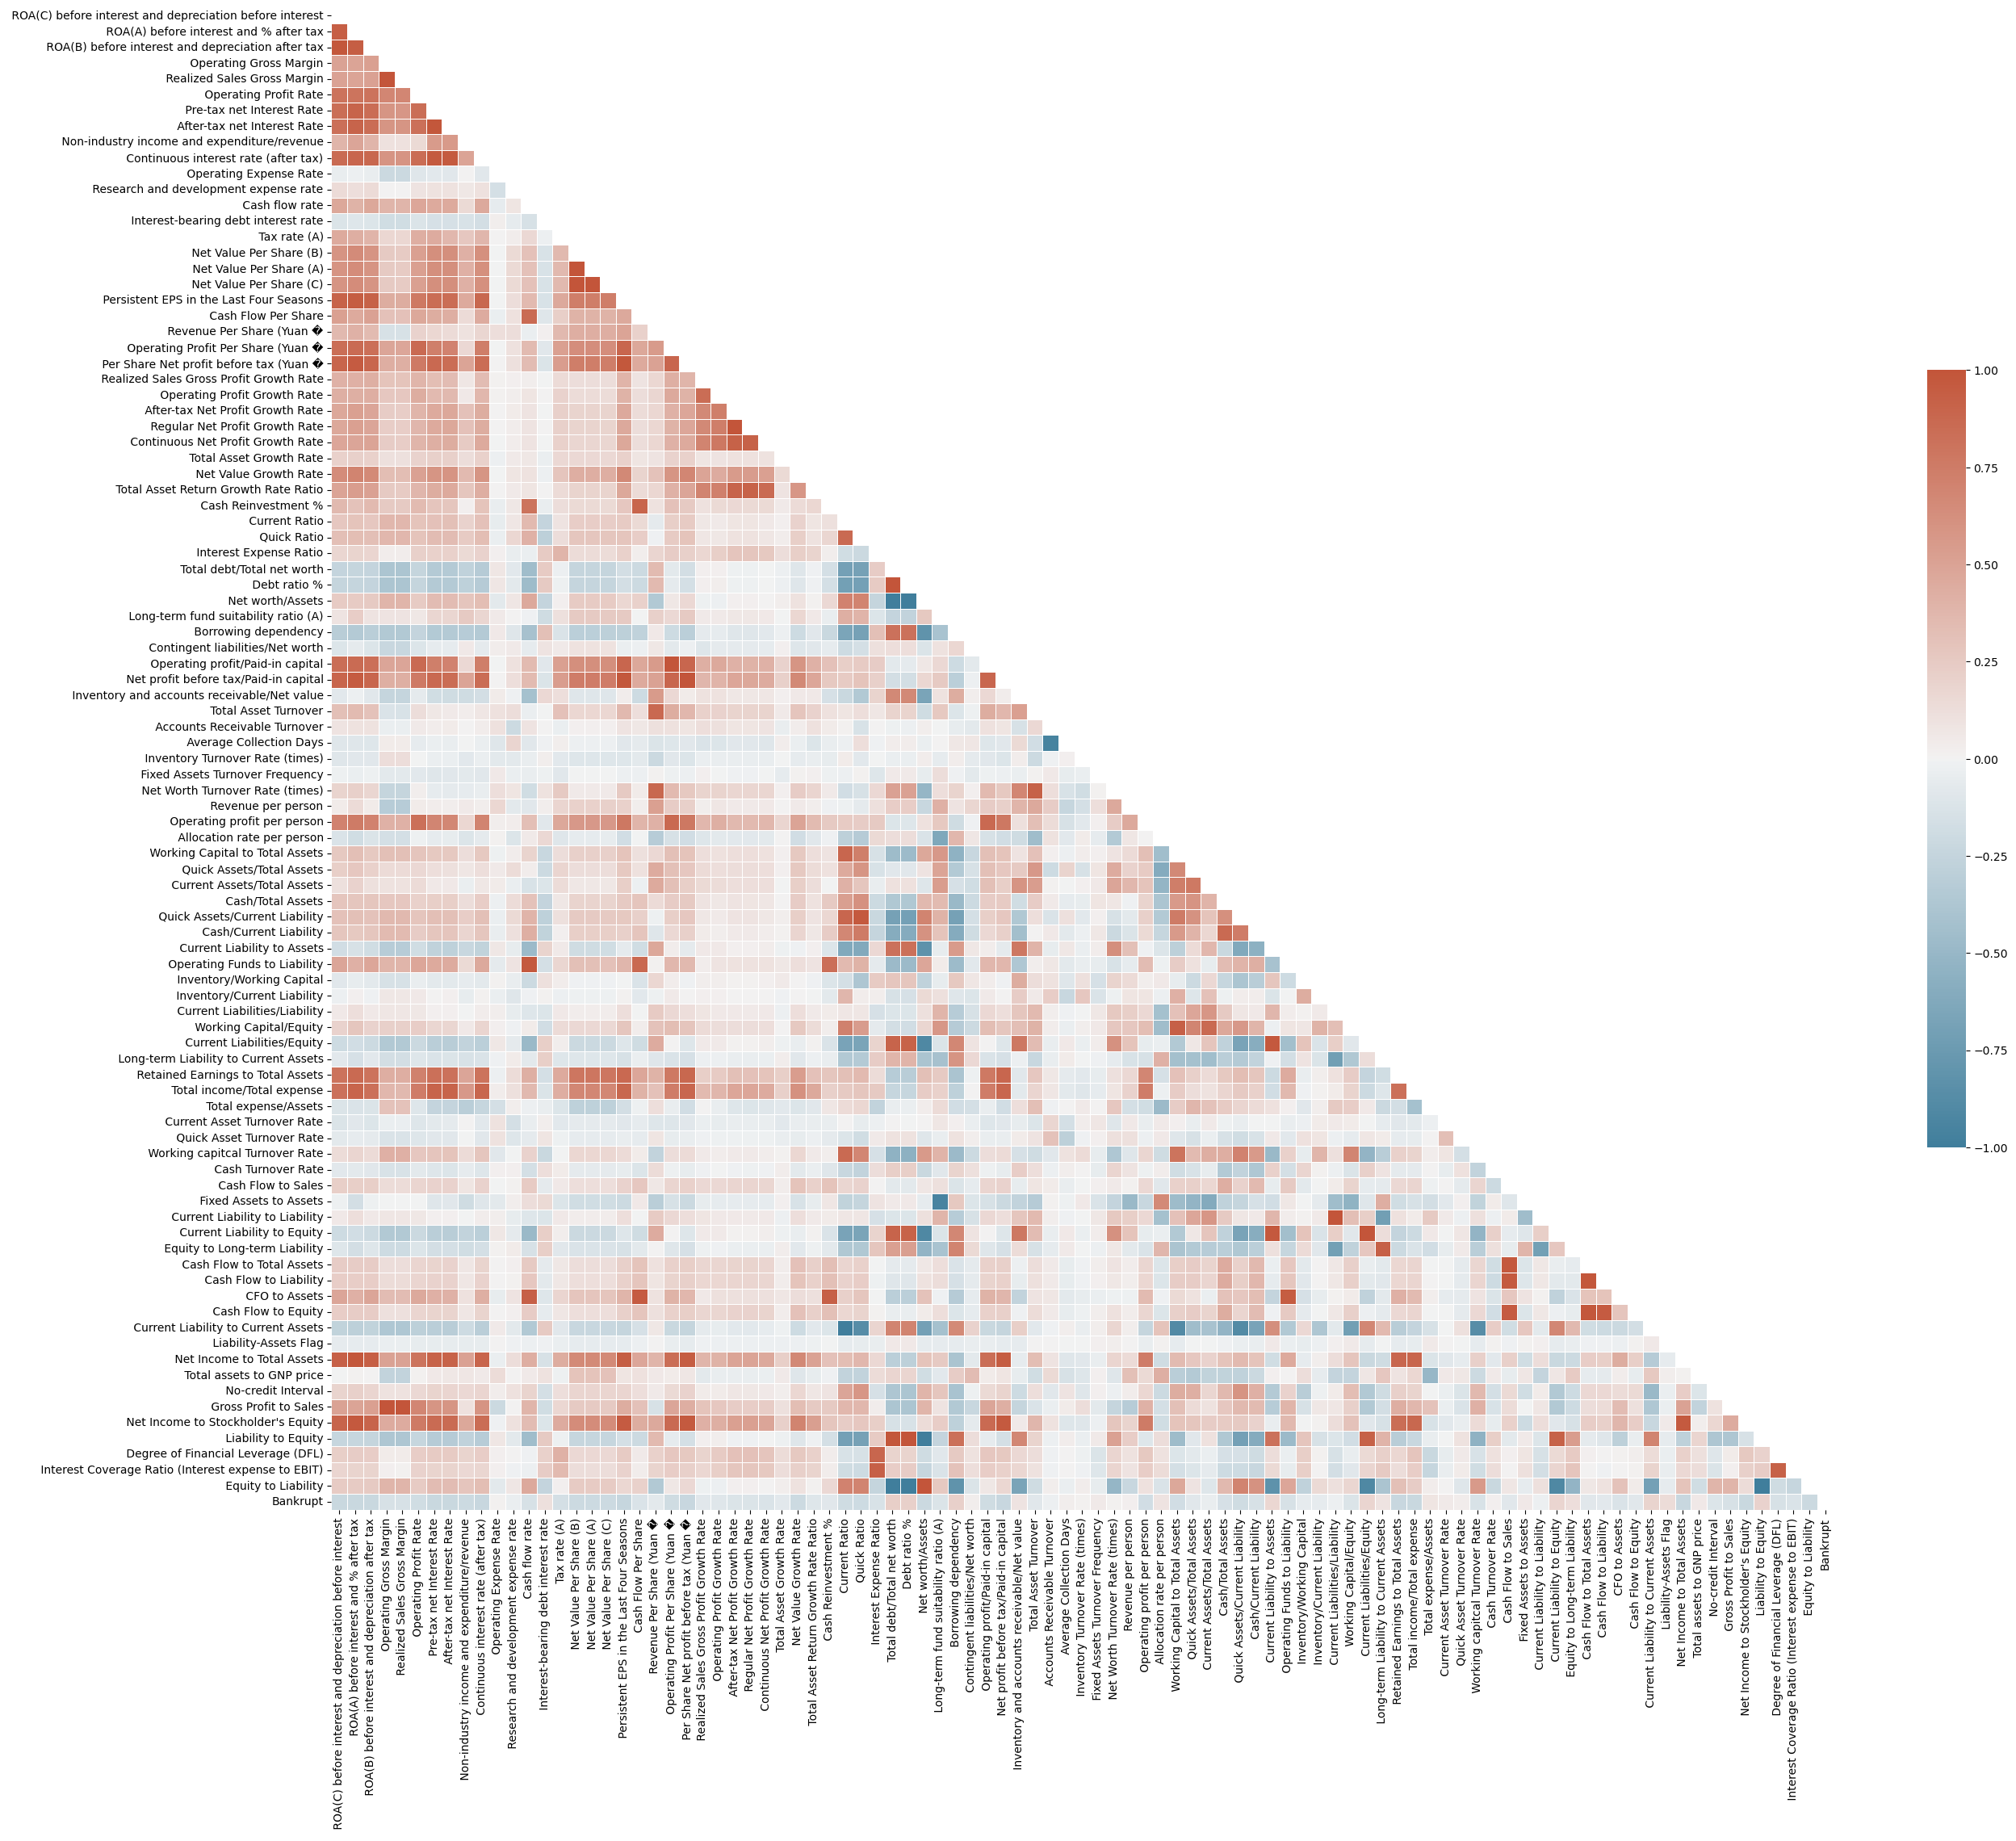

In [19]:
# Correlation Heatmap (Spearman)
f, ax = plt.subplots(figsize=(30, 25))
mat = data.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

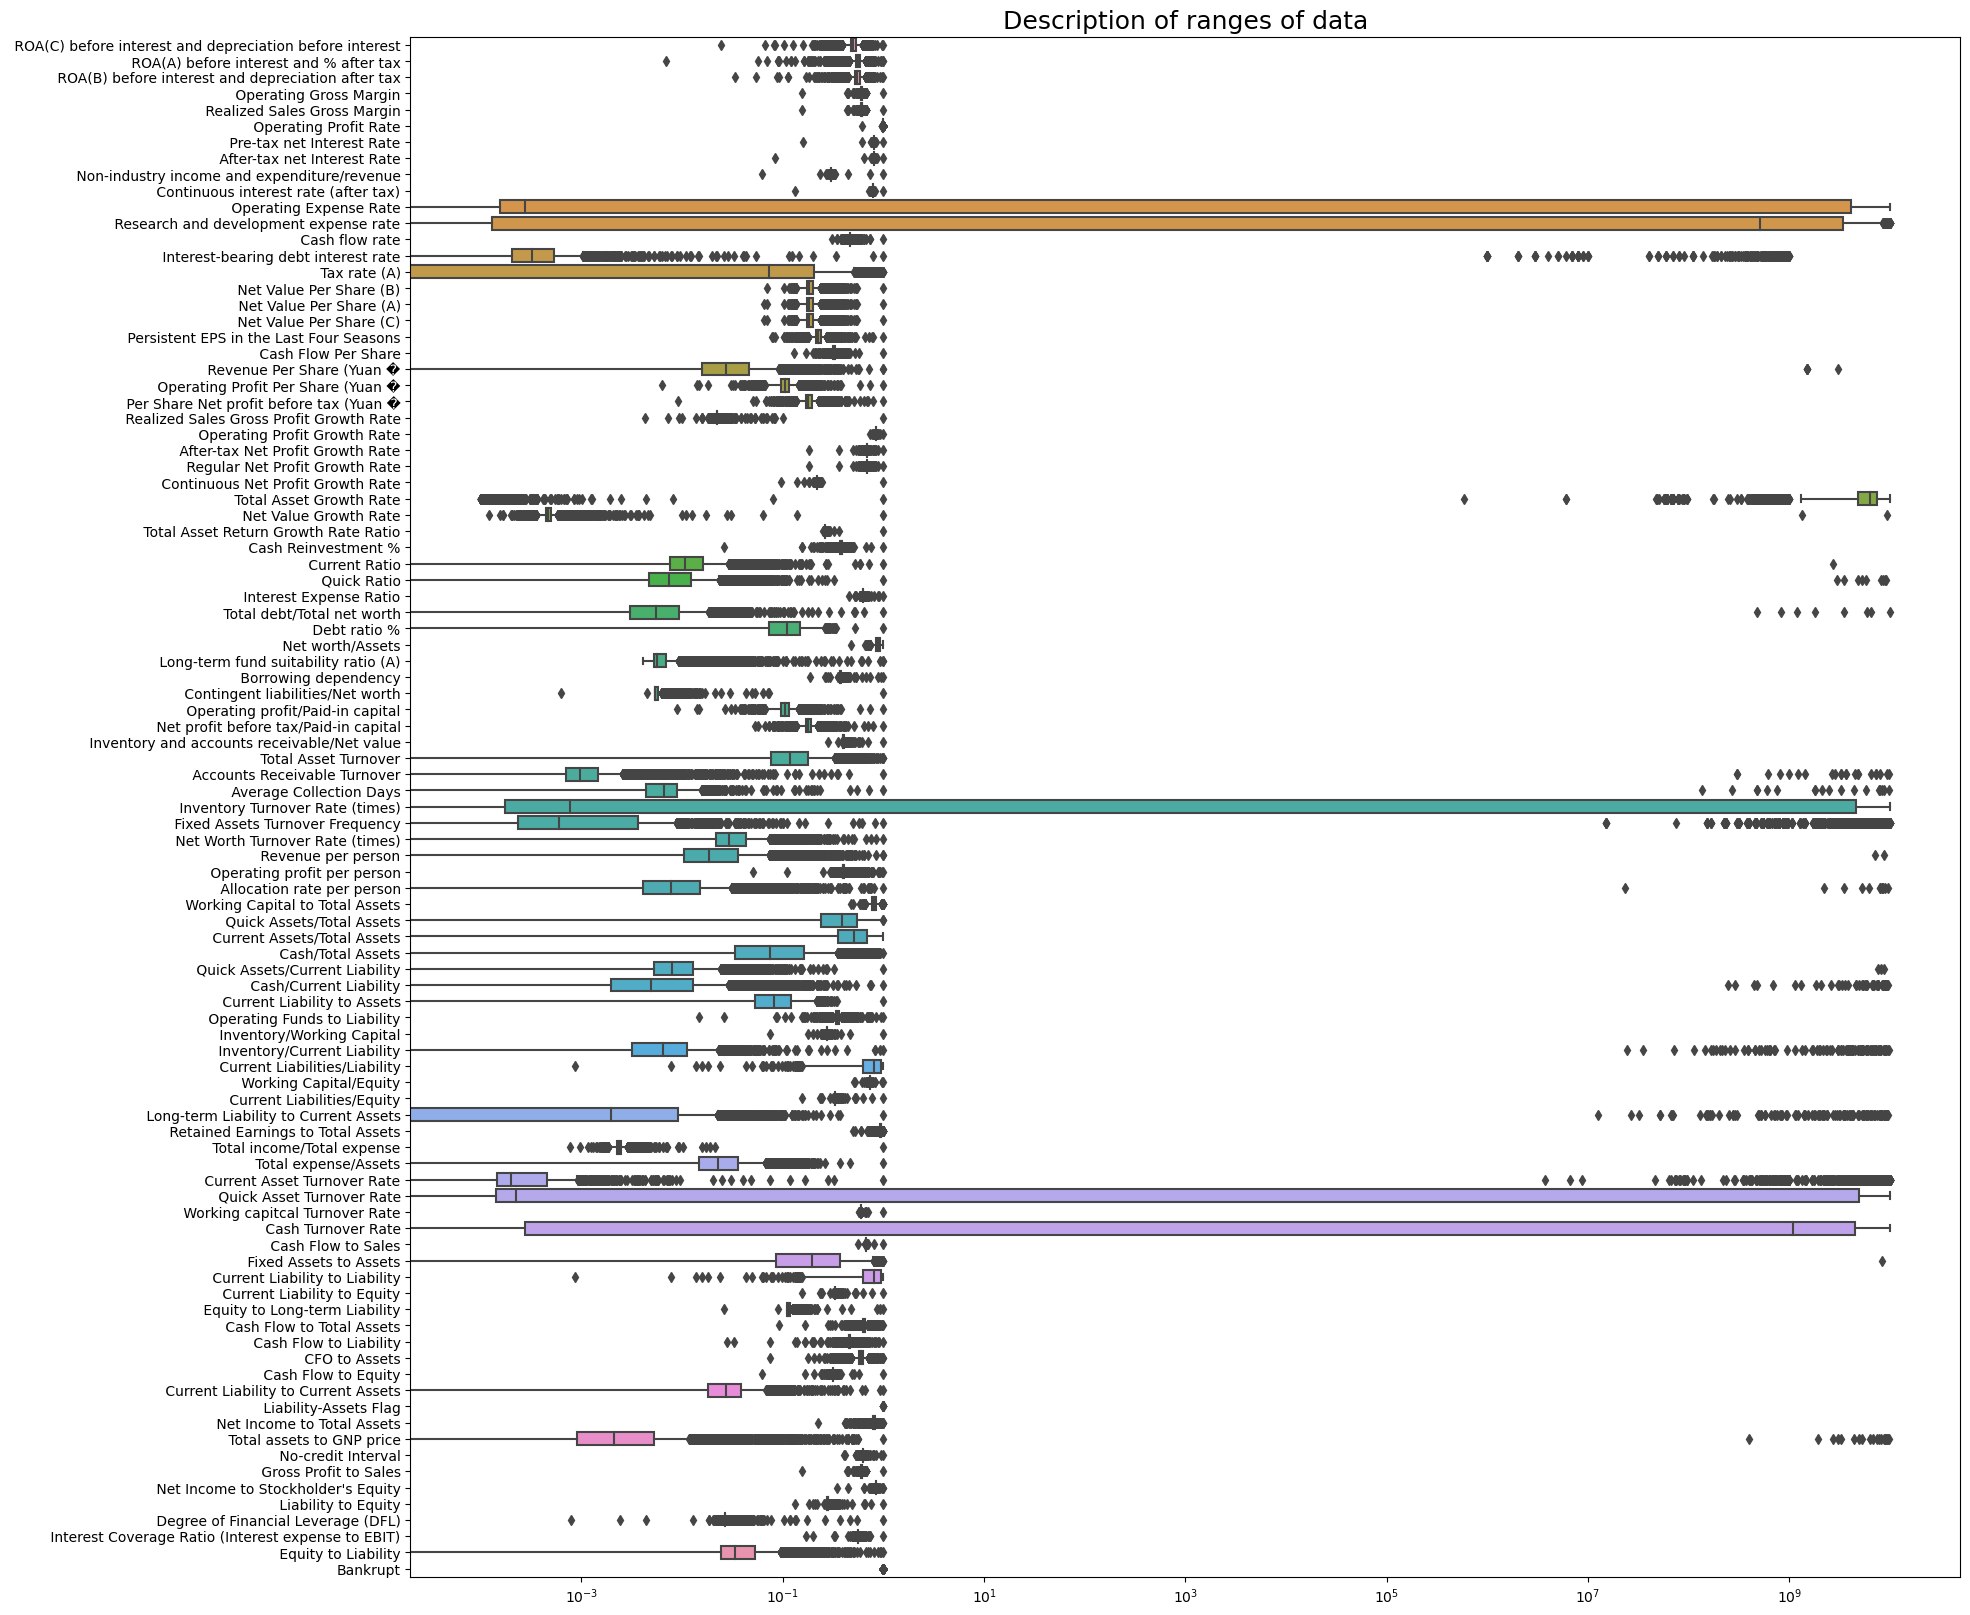

In [20]:
# For More Clear insights We can use Boxplot for numerical features.
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = data, orient="h")
ax.set_title('Description of ranges of data', fontsize = 18)
ax.set(xscale="log")
plt.show()

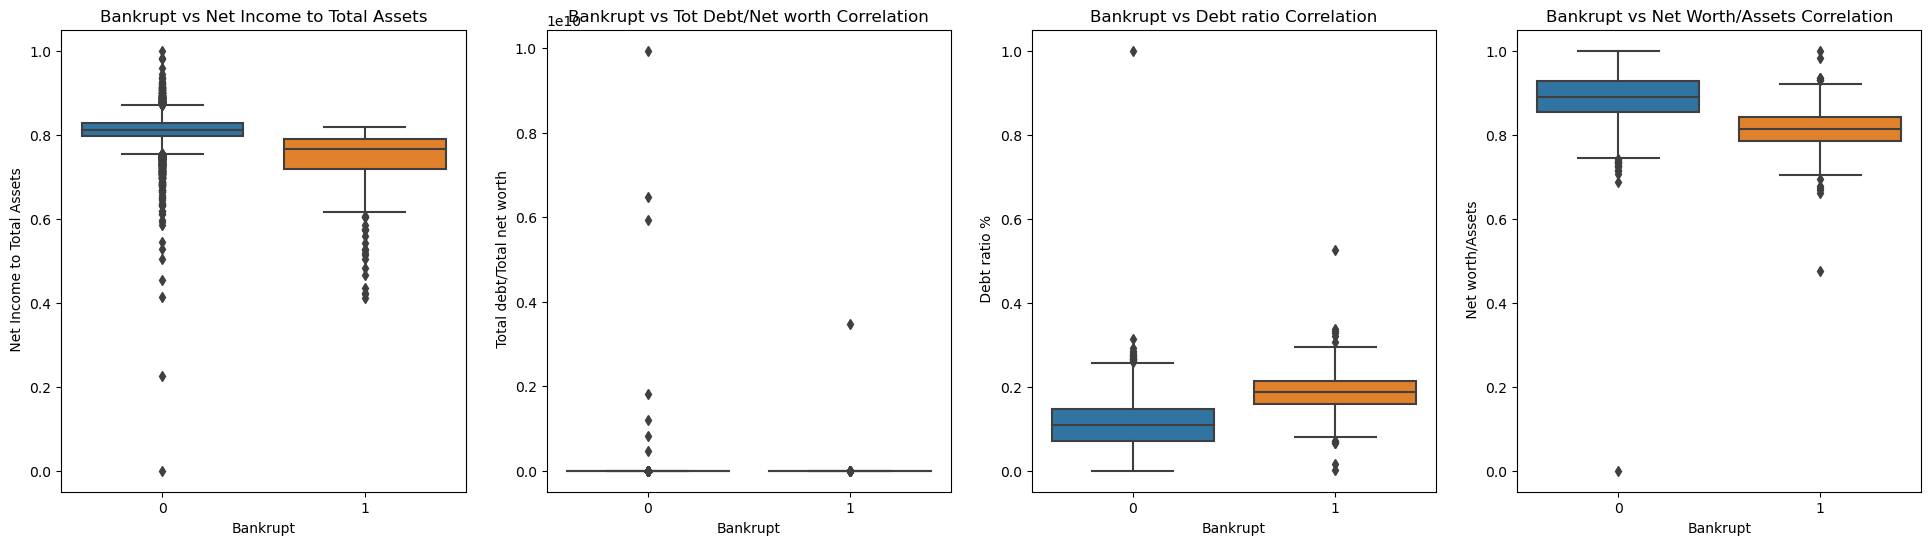

In [21]:
# Now lets plot those varibale whose its own value in any company's growth or demotion..

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt', y=" Net Income to Total Assets", data=data, ax=axes[0])
axes[0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt', y=" Total debt/Total net worth", data=data, ax=axes[1]) 
axes[1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')

sns.boxplot(x='Bankrupt', y=" Debt ratio %", data=data, ax=axes[2])
axes[2].set_title('Bankrupt vs Debt ratio Correlation')

sns.boxplot(x='Bankrupt', y=" Net worth/Assets", data=data, ax=axes[3])  
axes[3].set_title('Bankrupt vs Net Worth/Assets Correlation') 

plt.show()

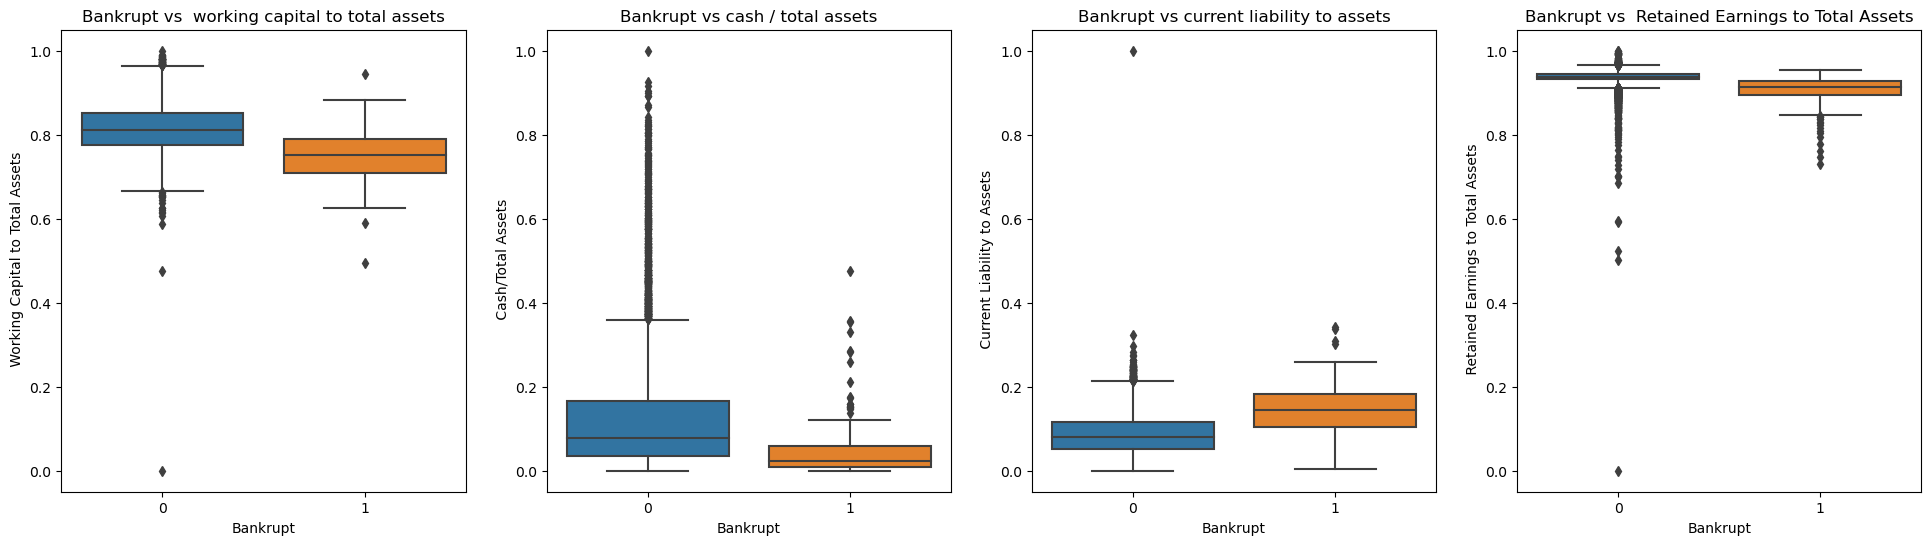

In [22]:
# Because Index 4 out of bounds error appear i.e why we are plotting in two times.
f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt', y=" Working Capital to Total Assets", data=data, ax=axes[0])
axes[0].set_title('Bankrupt vs  working capital to total assets')

sns.boxplot(x='Bankrupt', y=" Cash/Total Assets", data=data, ax=axes[1])
axes[1].set_title('Bankrupt vs cash / total assets')

sns.boxplot(x='Bankrupt', y=" Current Liability to Assets", data=data, ax=axes[2])
axes[2].set_title('Bankrupt vs current liability to assets')

sns.boxplot(x='Bankrupt', y=" Retained Earnings to Total Assets", data=data, ax=axes[3])
axes[3].set_title('Bankrupt vs  Retained Earnings to Total Assets')

plt.show()

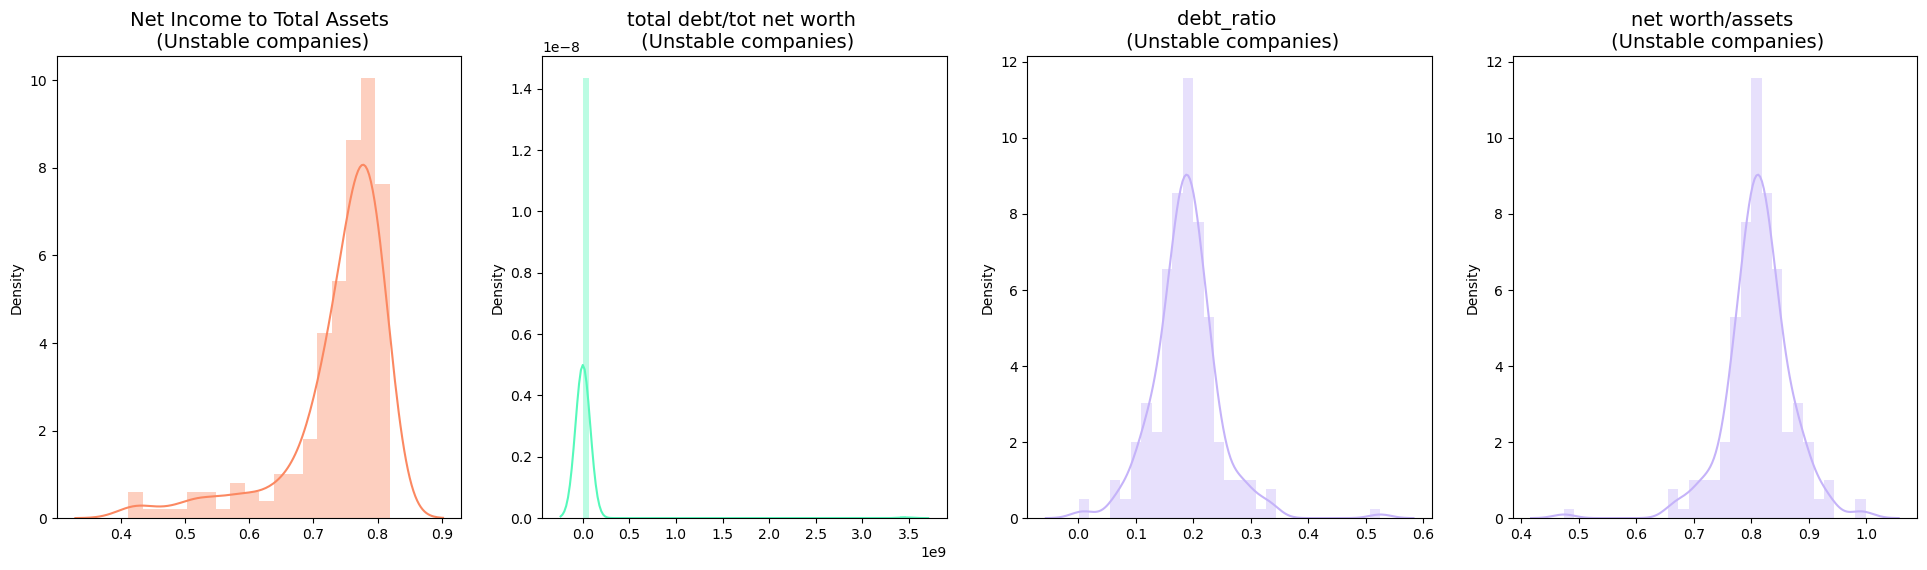

In [23]:
# Plotting the feature distributions for close to bankrputcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = data[' Net Income to Total Assets'].loc[data['Bankrupt'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = data[' Total debt/Total net worth'].loc[data['Bankrupt'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = data[' Debt ratio %'].loc[data['Bankrupt'] == 1].values
sns.distplot(debt_ratio,ax=ax3, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = data[' Net worth/Assets'].loc[data['Bankrupt'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

Text(0.5, 1.0, 'retain earnings to total assets \n (Unstable companies)')

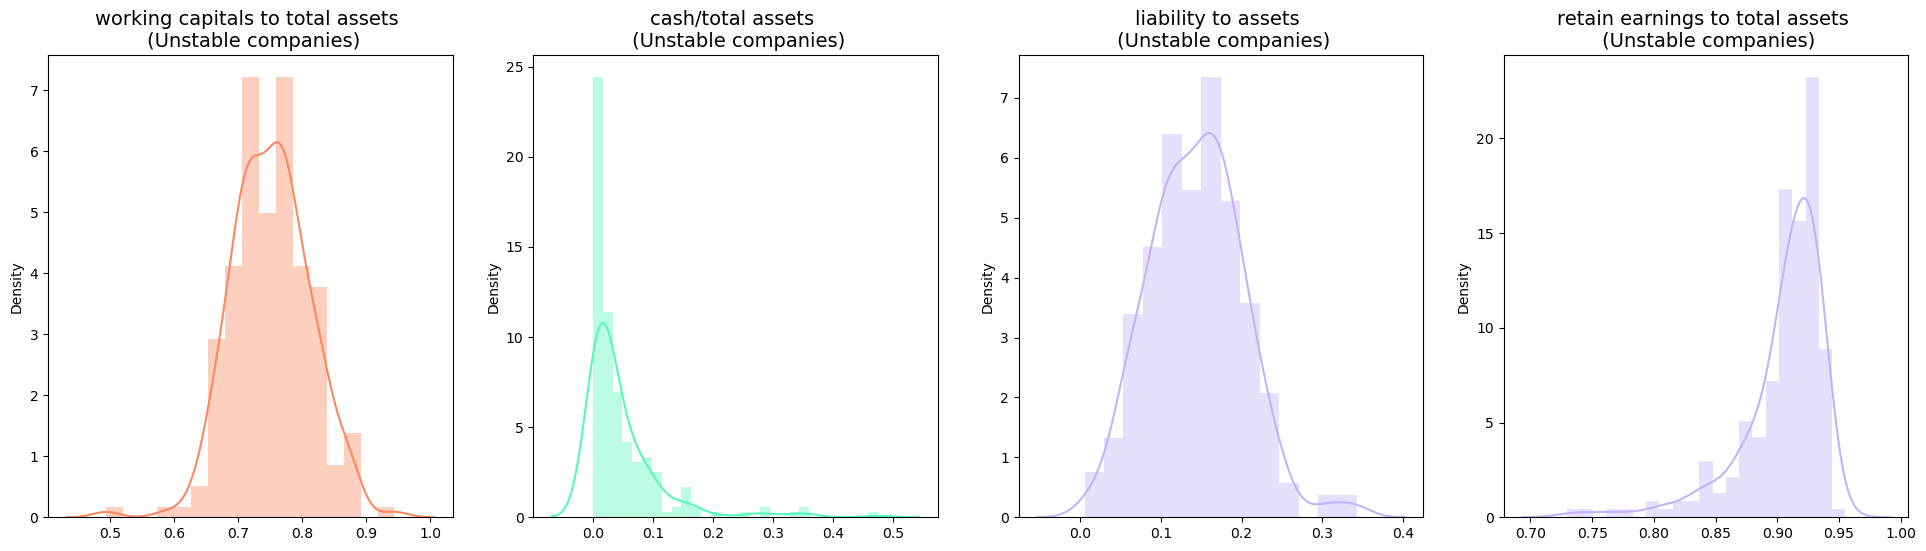

In [24]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

working_cap = data[' Working Capital to Total Assets'].loc[data['Bankrupt'] == 1].values
sns.distplot(working_cap,ax=ax1, color='#FB8861')
ax1.set_title('working capitals to total assets \n (Unstable companies)', fontsize=14)

cash_tot_assets = data[' Cash/Total Assets'].loc[data['Bankrupt'] == 1].values
sns.distplot(cash_tot_assets ,ax=ax2, color='#56F9BB')
ax2.set_title('cash/total assets \n (Unstable companies)', fontsize=14)


asset_liab = data[' Current Liability to Assets'].loc[data['Bankrupt'] == 1].values
sns.distplot(asset_liab,ax=ax3, color='#C5B3F9')
ax3.set_title('liability to assets \n (Unstable companies)', fontsize=14)

operating_funds = data[' Retained Earnings to Total Assets'].loc[data['Bankrupt'] == 1].values
sns.distplot(operating_funds,ax=ax4, color='#C5B3F9')
ax4.set_title('retain earnings to total assets \n (Unstable companies)', fontsize=14)

In [25]:
# will try to remove the most extreme outliers (note that you can also impute them with the mean or
# the median instead of removing them). This should increase our models' performance.

#outlier removal...
def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in data:
    new_df = outliers_removal(data[col],str(col),data)

Quartile 25: 0.47652708 | Quartile 75: 0.535562814
iqr: 0.05903573400000006
Cut Off: 0.08855360100000009
 ROA(C) before interest and depreciation before interest Lower: 0.3879734789999999
 ROA(C) before interest and depreciation before interest Upper: 0.6241164150000001
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.535542957 | Quartile 75: 0.5891572174999999
iqr: 0.053614260499999955
Cut Off: 0.08042139074999993
 ROA(A) before interest and % after tax Lower: 0.45512156625000005
 ROA(A) before interest and % after tax Upper: 0.6695786082499999
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
-----------------------------------------------------------------
Quartile 25: 0.527276621 | Quartile 75: 0.584105145
iqr: 0.05682852400000005
Cut Off: 0.08524278600000007
 ROA(B) before interest and depreciation after tax Lower: 0

Quartile 25: 0.021774194 | Quartile 75: 0.042903226
iqr: 0.021129032000000002
Cut Off: 0.031693548
 Net Worth Turnover Rate (times) Lower: -0.009919354000000002
 Net Worth Turnover Rate (times) Upper: 0.074596774
 Net Worth Turnover Rate (times) outliers for close to bankruptcy cases: 513
-----------------------------------------------------------------
Quartile 25: 0.010432854 | Quartile 75: 0.035854765499999997
iqr: 0.025421911499999998
Cut Off: 0.038132867249999994
 Revenue per person Lower: -0.027700013249999995
 Revenue per person Upper: 0.07398763274999999
 Revenue per person outliers for close to bankruptcy cases: 729
-----------------------------------------------------------------
Quartile 25: 0.392437982 | Quartile 75: 0.4018509305
iqr: 0.009412948499999962
Cut Off: 0.014119422749999944
 Operating profit per person Lower: 0.3783185592500001
 Operating profit per person Upper: 0.4159703532499999
 Operating profit per person outliers for close to bankruptcy cases: 876
---------

In [26]:
new_df.shape

(6599, 95)

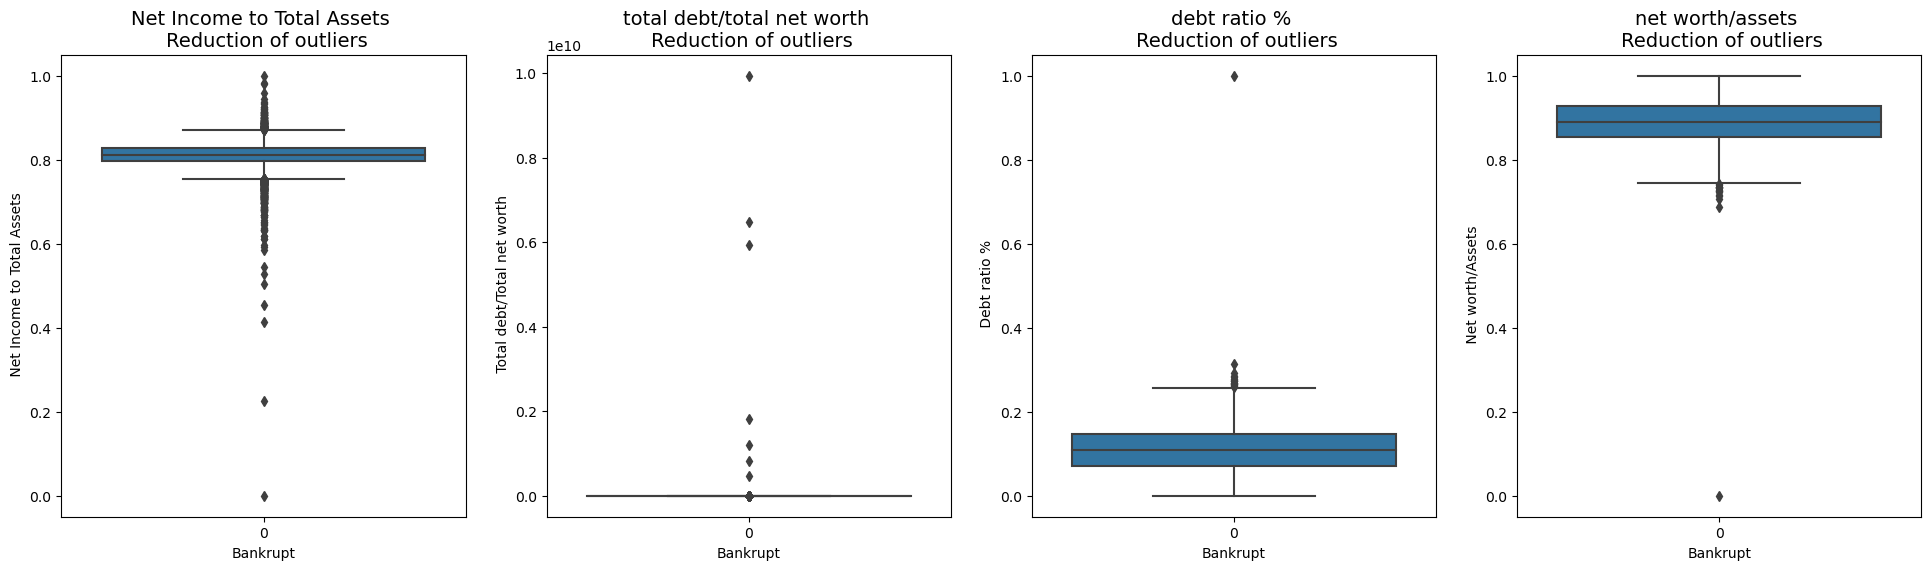

In [27]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt", y=" Net Income to Total Assets", data=new_df,ax=ax1) 
ax1.set_title("Net Income to Total Assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=" Total debt/Total net worth", data=new_df,ax=ax2) 
ax2.set_title("total debt/total net worth \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=" Debt ratio %", data=new_df,ax=ax3) 
ax3.set_title("debt ratio % \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=' Net worth/Assets', data=new_df,ax=ax4) 
ax4.set_title("net worth/assets \n Reduction of outliers", fontsize=14)
        
plt.show()

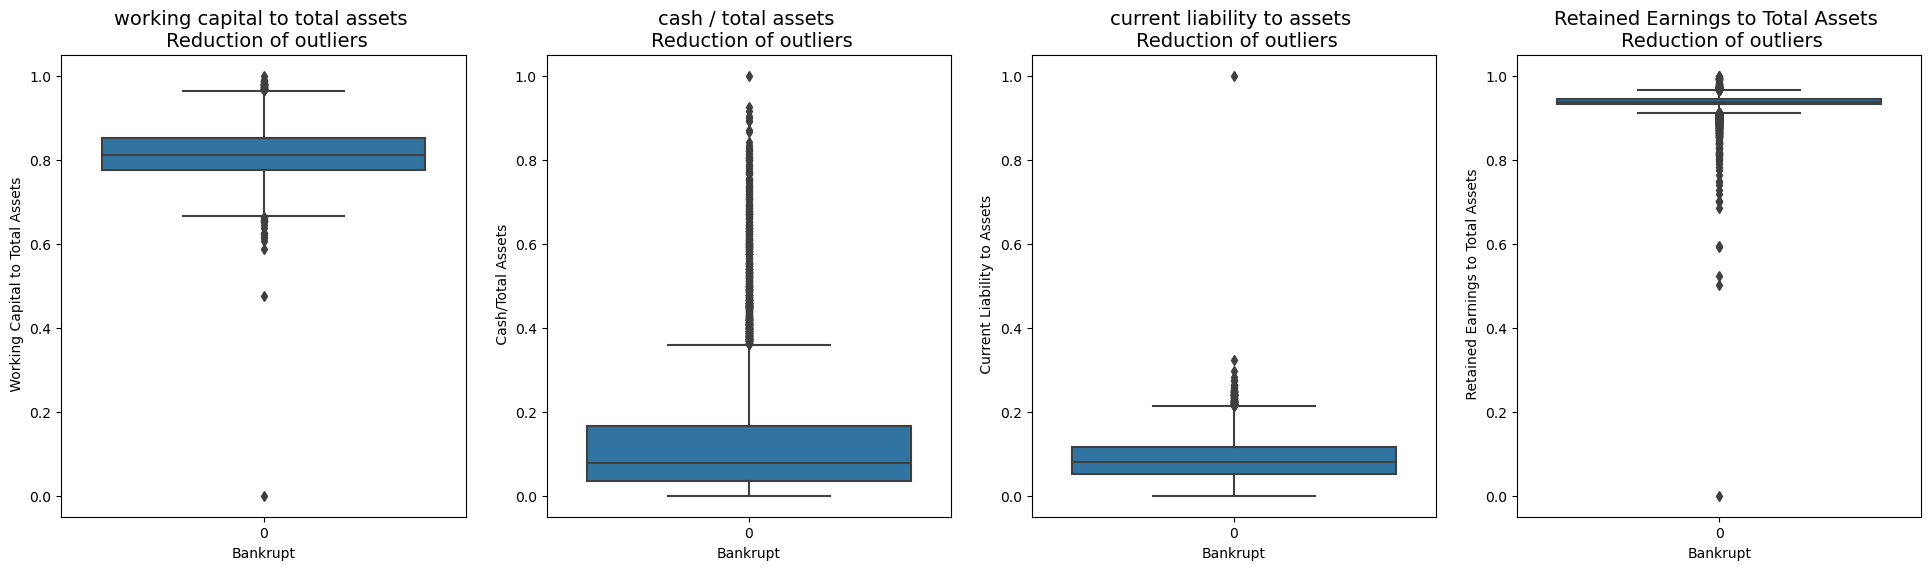

In [28]:
f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6))

# Boxplots with outliers removed

sns.boxplot(x="Bankrupt", y=' Working Capital to Total Assets', data=new_df,ax=ax1) 
ax1.set_title("working capital to total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=' Cash/Total Assets', data=new_df,ax=ax2) 
ax2.set_title("cash / total assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=' Current Liability to Assets', data=new_df,ax=ax3) 
ax3.set_title("current liability to assets \n Reduction of outliers", fontsize=14)

sns.boxplot(x="Bankrupt", y=' Retained Earnings to Total Assets', data=new_df,ax=ax4) 
ax4.set_title("Retained Earnings to Total Assets \n Reduction of outliers", fontsize=14)
plt.show()

In [29]:
# Using log transformation method for skewed data.
def log_trans(d):
    
    for col in d:
        skew = d[col].skew()
        if skew > 0.5 or skew < -0.5:
            d[col] = np.log1p(d[col])
        else:
            continue
            
    return d

data_norm = log_trans(new_df)

In [30]:
data_norm.shape

(6599, 95)

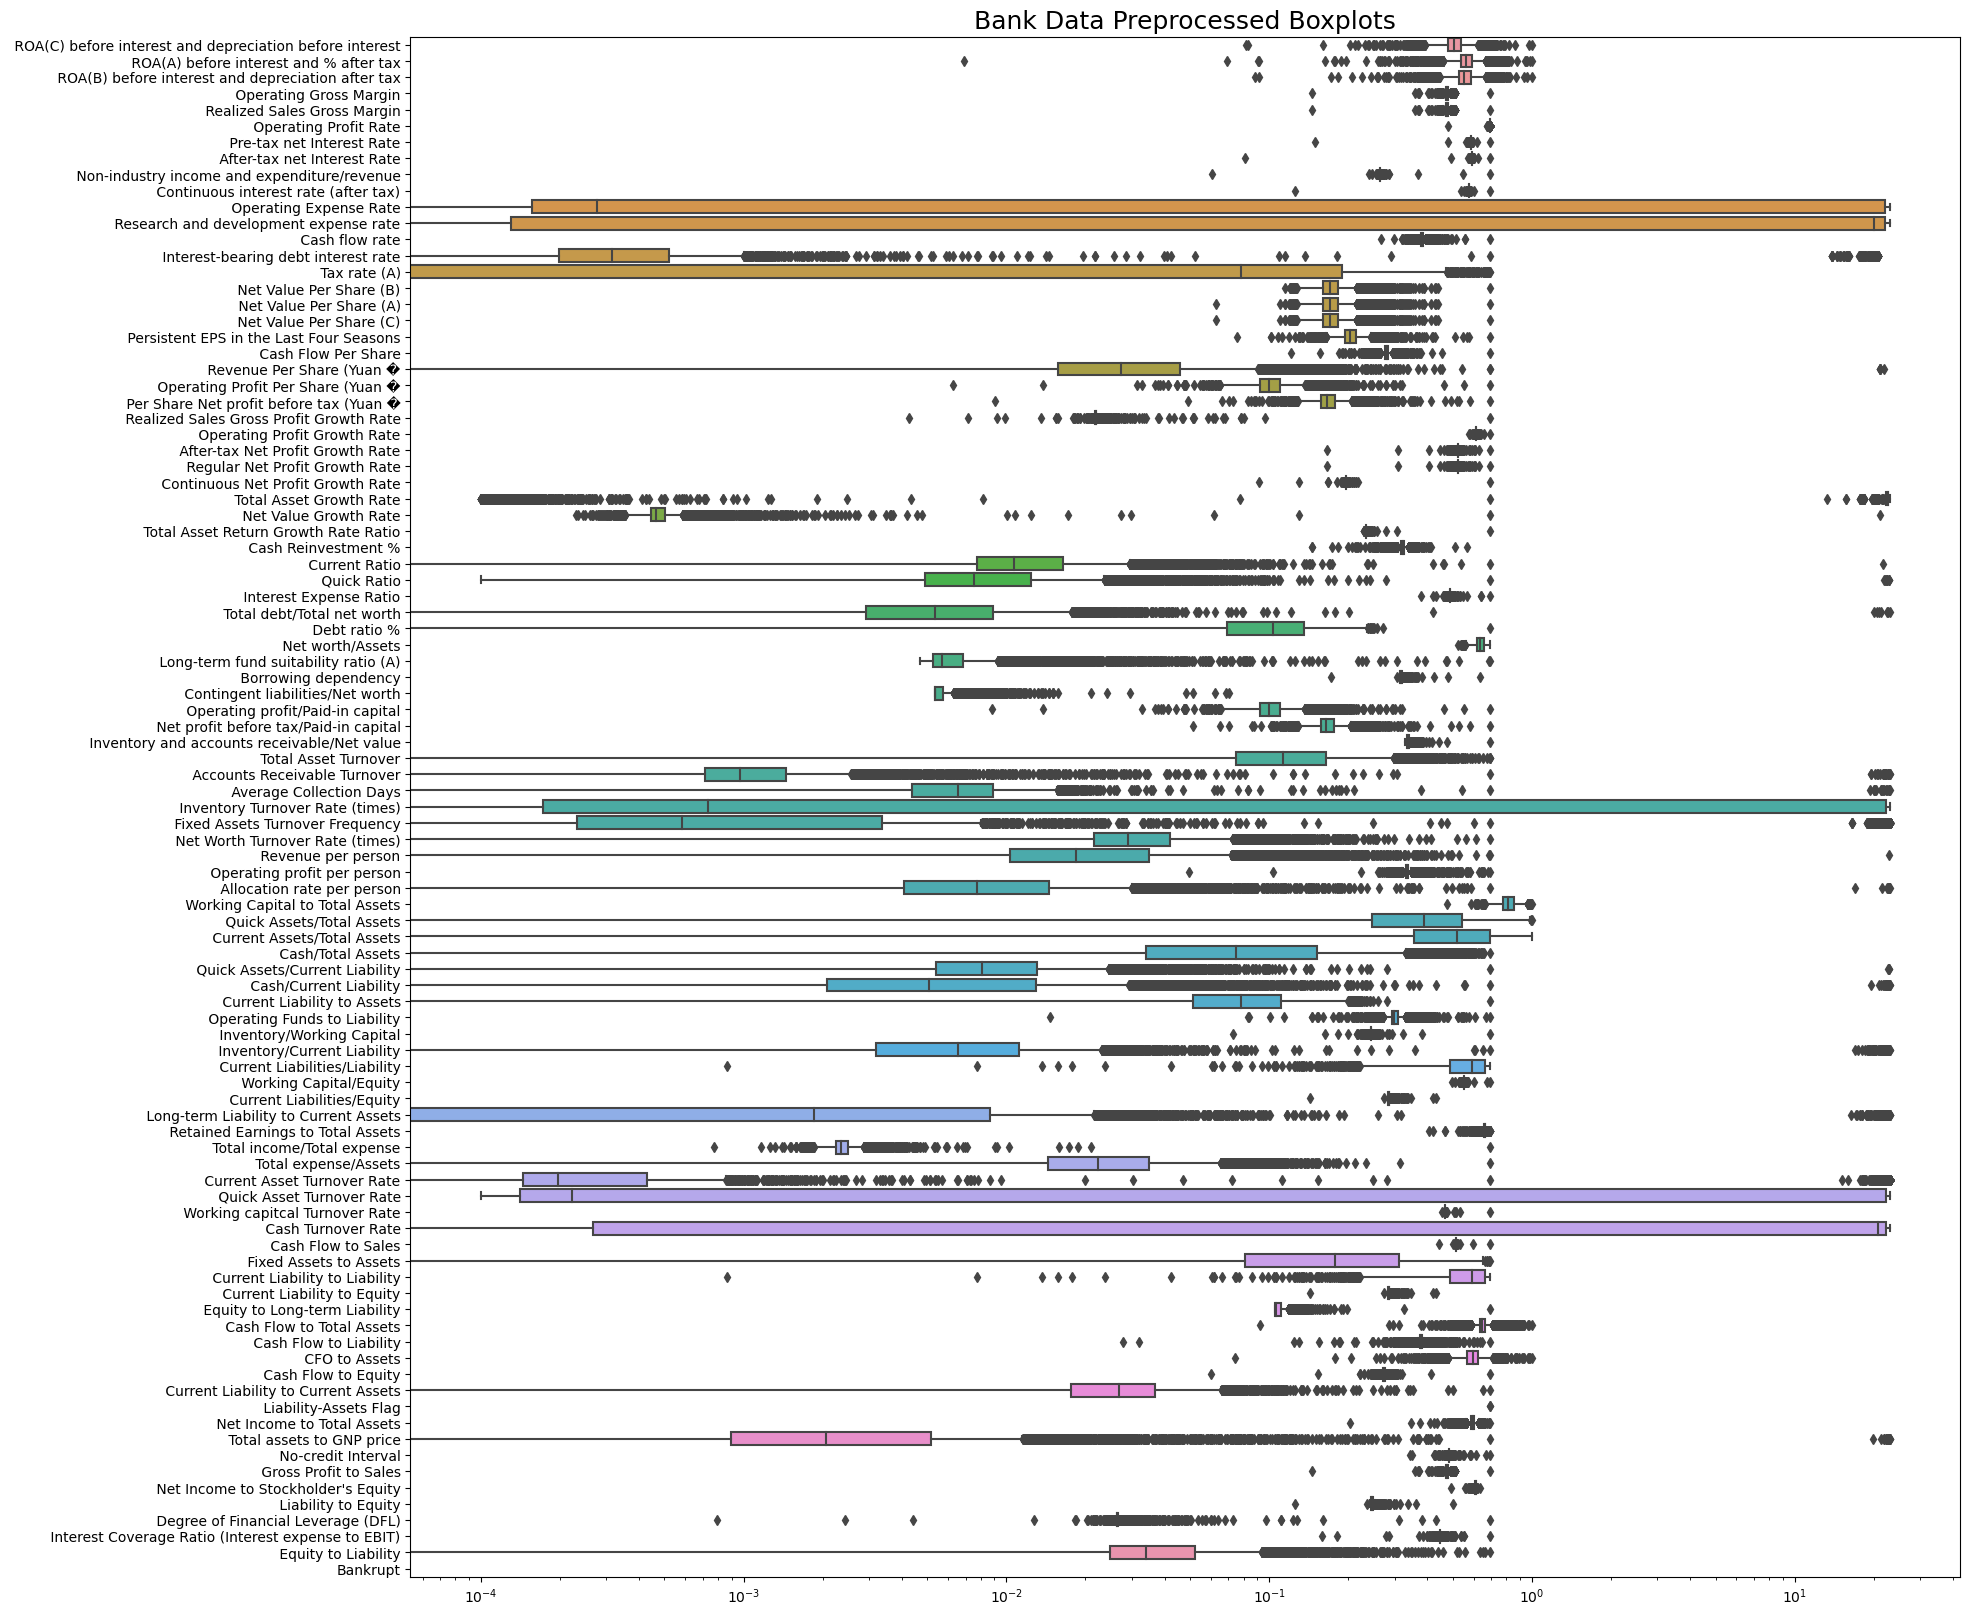

In [31]:
# Plotting Boxplots of the preprocessed numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = data_norm, orient="h")
ax.set_title('Bank Data Preprocessed Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [32]:
def preprocess(df):
    df = df.copy()
    y = df['Bankrupt']
    X = df.drop('Bankrupt', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state=2)
    
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [33]:
X_train, X_test, y_train, y_test = preprocess(data)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5455, 94), (1364, 94), (5455,), (1364,))

In [35]:
y_test.value_counts() / len(y_test)

0    0.972874
1    0.027126
Name: Bankrupt, dtype: float64

In [36]:
var_models = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (kernel SVM)": SVC(kernel = 'rbf', random_state = 0),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models.items():
  model.fit(X_train, y_train)
  print(name + ' was completed.')

Logistic Regression was completed.
K-Nearest Neighbors was completed.
Decision Tree was completed.
Support Vector Machine (LinearSVC) was completed.
Support Vector Machine (kernel SVM) was completed.
MLPClassifier was completed.
Random Forest was completed.
Gradient Boosting was completed.
AdaBoost Classifier was completed.
XgBoost Classifier was completed.
Learning rate set to 0.021259
0:	learn: 0.6483931	total: 155ms	remaining: 2m 35s
1:	learn: 0.6122140	total: 172ms	remaining: 1m 25s
2:	learn: 0.5701831	total: 195ms	remaining: 1m 4s
3:	learn: 0.5326707	total: 215ms	remaining: 53.5s
4:	learn: 0.5032742	total: 227ms	remaining: 45.2s
5:	learn: 0.4739339	total: 240ms	remaining: 39.7s
6:	learn: 0.4412118	total: 252ms	remaining: 35.7s
7:	learn: 0.4133075	total: 264ms	remaining: 32.8s
8:	learn: 0.3901965	total: 276ms	remaining: 30.4s
9:	learn: 0.3713083	total: 288ms	remaining: 28.5s
10:	learn: 0.3529467	total: 300ms	remaining: 26.9s
11:	learn: 0.3340139	total: 310ms	remaining: 25.6s
12:	le

157:	learn: 0.0611504	total: 1.6s	remaining: 8.53s
158:	learn: 0.0610115	total: 1.61s	remaining: 8.51s
159:	learn: 0.0608249	total: 1.62s	remaining: 8.49s
160:	learn: 0.0607703	total: 1.62s	remaining: 8.46s
161:	learn: 0.0607087	total: 1.63s	remaining: 8.45s
162:	learn: 0.0606759	total: 1.64s	remaining: 8.43s
163:	learn: 0.0605909	total: 1.65s	remaining: 8.41s
164:	learn: 0.0605651	total: 1.66s	remaining: 8.38s
165:	learn: 0.0603125	total: 1.67s	remaining: 8.37s
166:	learn: 0.0601305	total: 1.67s	remaining: 8.35s
167:	learn: 0.0599015	total: 1.68s	remaining: 8.32s
168:	learn: 0.0597086	total: 1.69s	remaining: 8.3s
169:	learn: 0.0595412	total: 1.7s	remaining: 8.28s
170:	learn: 0.0593879	total: 1.7s	remaining: 8.26s
171:	learn: 0.0592925	total: 1.71s	remaining: 8.24s
172:	learn: 0.0592636	total: 1.72s	remaining: 8.22s
173:	learn: 0.0590301	total: 1.73s	remaining: 8.2s
174:	learn: 0.0588559	total: 1.74s	remaining: 8.18s
175:	learn: 0.0588106	total: 1.74s	remaining: 8.16s
176:	learn: 0.058

318:	learn: 0.0431043	total: 2.85s	remaining: 6.08s
319:	learn: 0.0430323	total: 2.86s	remaining: 6.07s
320:	learn: 0.0429134	total: 2.87s	remaining: 6.06s
321:	learn: 0.0427992	total: 2.87s	remaining: 6.05s
322:	learn: 0.0427281	total: 2.88s	remaining: 6.04s
323:	learn: 0.0426802	total: 2.89s	remaining: 6.03s
324:	learn: 0.0425830	total: 2.9s	remaining: 6.02s
325:	learn: 0.0424706	total: 2.9s	remaining: 6.01s
326:	learn: 0.0424017	total: 2.91s	remaining: 6s
327:	learn: 0.0423223	total: 2.92s	remaining: 5.99s
328:	learn: 0.0422582	total: 2.93s	remaining: 5.98s
329:	learn: 0.0422315	total: 2.94s	remaining: 5.97s
330:	learn: 0.0421384	total: 2.95s	remaining: 5.96s
331:	learn: 0.0420985	total: 2.96s	remaining: 5.95s
332:	learn: 0.0420141	total: 2.96s	remaining: 5.94s
333:	learn: 0.0419158	total: 2.97s	remaining: 5.93s
334:	learn: 0.0418563	total: 2.98s	remaining: 5.92s
335:	learn: 0.0417613	total: 2.99s	remaining: 5.91s
336:	learn: 0.0416896	total: 3s	remaining: 5.9s
337:	learn: 0.0416419

490:	learn: 0.0321564	total: 4.28s	remaining: 4.44s
491:	learn: 0.0320994	total: 4.29s	remaining: 4.43s
492:	learn: 0.0320540	total: 4.3s	remaining: 4.42s
493:	learn: 0.0320365	total: 4.3s	remaining: 4.41s
494:	learn: 0.0319850	total: 4.31s	remaining: 4.4s
495:	learn: 0.0318758	total: 4.32s	remaining: 4.39s
496:	learn: 0.0318598	total: 4.33s	remaining: 4.38s
497:	learn: 0.0317810	total: 4.33s	remaining: 4.37s
498:	learn: 0.0316894	total: 4.34s	remaining: 4.36s
499:	learn: 0.0316211	total: 4.35s	remaining: 4.35s
500:	learn: 0.0315709	total: 4.36s	remaining: 4.34s
501:	learn: 0.0315009	total: 4.37s	remaining: 4.33s
502:	learn: 0.0314948	total: 4.37s	remaining: 4.32s
503:	learn: 0.0314376	total: 4.38s	remaining: 4.31s
504:	learn: 0.0313748	total: 4.39s	remaining: 4.3s
505:	learn: 0.0313281	total: 4.39s	remaining: 4.29s
506:	learn: 0.0312871	total: 4.4s	remaining: 4.28s
507:	learn: 0.0312636	total: 4.41s	remaining: 4.27s
508:	learn: 0.0312091	total: 4.42s	remaining: 4.26s
509:	learn: 0.031

668:	learn: 0.0244356	total: 5.69s	remaining: 2.81s
669:	learn: 0.0243962	total: 5.7s	remaining: 2.81s
670:	learn: 0.0243879	total: 5.71s	remaining: 2.8s
671:	learn: 0.0243797	total: 5.71s	remaining: 2.79s
672:	learn: 0.0243293	total: 5.72s	remaining: 2.78s
673:	learn: 0.0242909	total: 5.73s	remaining: 2.77s
674:	learn: 0.0242570	total: 5.74s	remaining: 2.76s
675:	learn: 0.0242396	total: 5.75s	remaining: 2.75s
676:	learn: 0.0242137	total: 5.75s	remaining: 2.75s
677:	learn: 0.0242059	total: 5.76s	remaining: 2.74s
678:	learn: 0.0241562	total: 5.77s	remaining: 2.73s
679:	learn: 0.0241392	total: 5.78s	remaining: 2.72s
680:	learn: 0.0241251	total: 5.79s	remaining: 2.71s
681:	learn: 0.0241048	total: 5.79s	remaining: 2.7s
682:	learn: 0.0240675	total: 5.8s	remaining: 2.69s
683:	learn: 0.0240326	total: 5.81s	remaining: 2.68s
684:	learn: 0.0240047	total: 5.82s	remaining: 2.67s
685:	learn: 0.0239971	total: 5.83s	remaining: 2.67s
686:	learn: 0.0239552	total: 5.83s	remaining: 2.66s
687:	learn: 0.02

849:	learn: 0.0192188	total: 7.12s	remaining: 1.26s
850:	learn: 0.0191802	total: 7.13s	remaining: 1.25s
851:	learn: 0.0191209	total: 7.14s	remaining: 1.24s
852:	learn: 0.0191054	total: 7.15s	remaining: 1.23s
853:	learn: 0.0190847	total: 7.15s	remaining: 1.22s
854:	learn: 0.0190603	total: 7.16s	remaining: 1.21s
855:	learn: 0.0190379	total: 7.17s	remaining: 1.21s
856:	learn: 0.0190331	total: 7.18s	remaining: 1.2s
857:	learn: 0.0189809	total: 7.19s	remaining: 1.19s
858:	learn: 0.0189419	total: 7.19s	remaining: 1.18s
859:	learn: 0.0189260	total: 7.2s	remaining: 1.17s
860:	learn: 0.0188894	total: 7.21s	remaining: 1.16s
861:	learn: 0.0188680	total: 7.22s	remaining: 1.16s
862:	learn: 0.0188480	total: 7.22s	remaining: 1.15s
863:	learn: 0.0188265	total: 7.23s	remaining: 1.14s
864:	learn: 0.0187920	total: 7.24s	remaining: 1.13s
865:	learn: 0.0187660	total: 7.25s	remaining: 1.12s
866:	learn: 0.0187414	total: 7.25s	remaining: 1.11s
867:	learn: 0.0187075	total: 7.26s	remaining: 1.1s
868:	learn: 0.0

In [37]:
var_results = []

for name, model in var_models.items():
  results = model.score(X_test, y_test)
  var_results.append(results)

  print('----------     '+name+'     ----------')

  model = var_models[name]
  y_test_pred = model.predict(X_test)
  print(metrics.classification_report(y_test_pred, y_test))
  print(name + ': {:.4f}%'.format(results * 100))
  print('Accuracy :{0:0.4f}'.format(metrics.accuracy_score(y_test_pred , y_test))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test_pred , y_test)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test_pred , y_test)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test_pred , y_test)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test_pred , y_test)))

----------     Logistic Regression     ----------
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1344
           1       0.19      0.35      0.25        20

    accuracy                           0.97      1364
   macro avg       0.59      0.66      0.61      1364
weighted avg       0.98      0.97      0.97      1364

Logistic Regression: 96.8475%
Accuracy :0.9685
AUC : 0.6638
Precision : 0.1892
Recall : 0.3500
F1 : 0.2456
----------     K-Nearest Neighbors     ----------
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1350
           1       0.16      0.43      0.24        14

    accuracy                           0.97      1364
   macro avg       0.58      0.70      0.61      1364
weighted avg       0.99      0.97      0.98      1364

K-Nearest Neighbors: 97.1408%
Accuracy :0.9714
AUC : 0.7028
Precision : 0.1622
Recall : 0.4286
F1 : 0.2353
----------     Decision Tree    

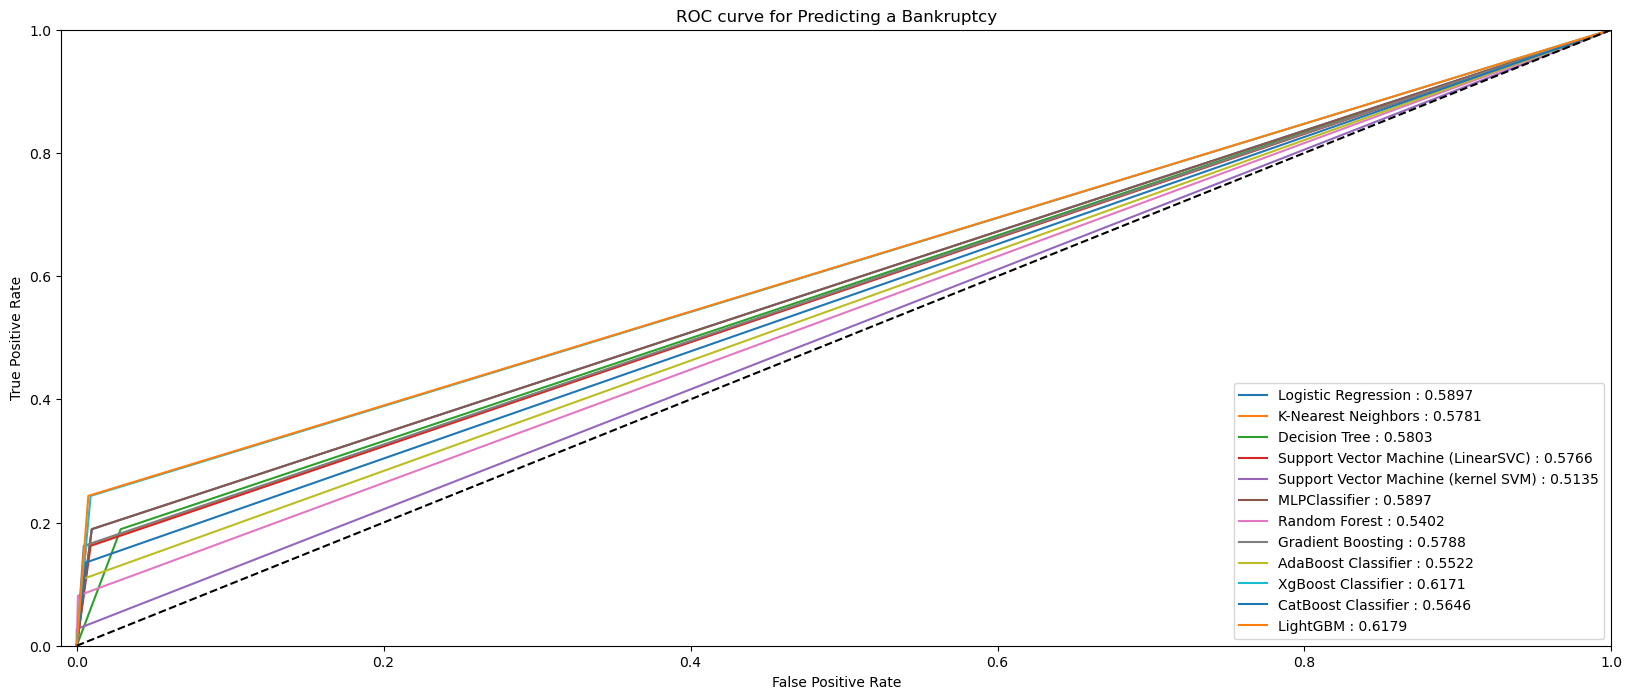

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

for i in var_models:
    y_pred = var_models[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision, recall, th = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= i + ' : {:.4f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0,1], [0,1], 'k--' )
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a Bankruptcy')
plt.legend(loc=4)
plt.show()

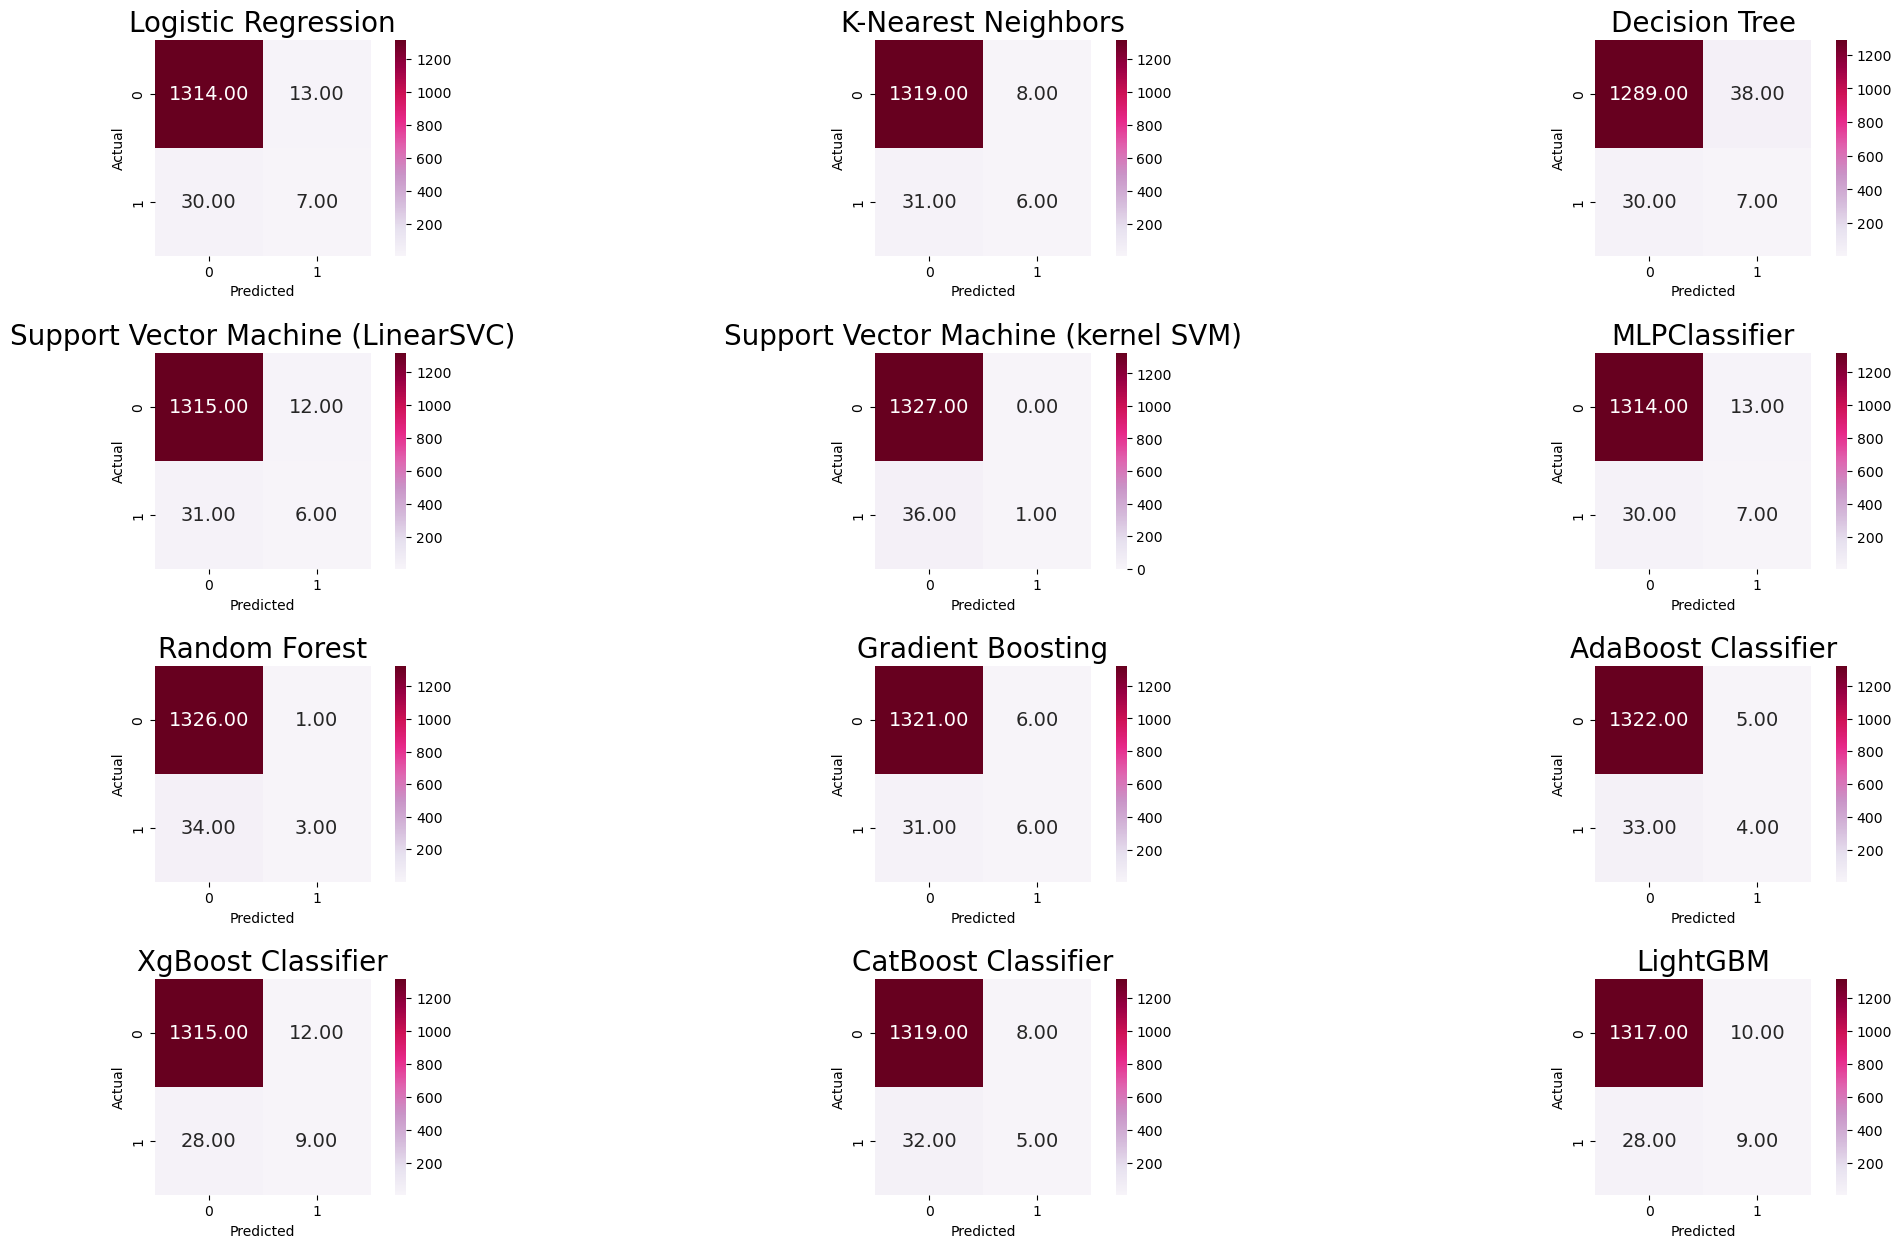

In [39]:
a = 1

fig = plt.figure(figsize=(25,15))

for name, model in var_models.items():
    results = model.score(X_test, y_test)
    model = var_models[name]
    y_test_pred = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace= 0.45)
    sns.heatmap(heat_cm, annot=True, fmt='.2f', square=True, annot_kws={"size": 14}, cmap = 'PuRd').set_title(name, fontsize = 20)
    a = a + 1

plt.show()

In [40]:
#################################################################################
# Till now it we are working with original data without any manupulation..
# Now with Smote
sm = SMOTE(random_state = 42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Bankrupt')

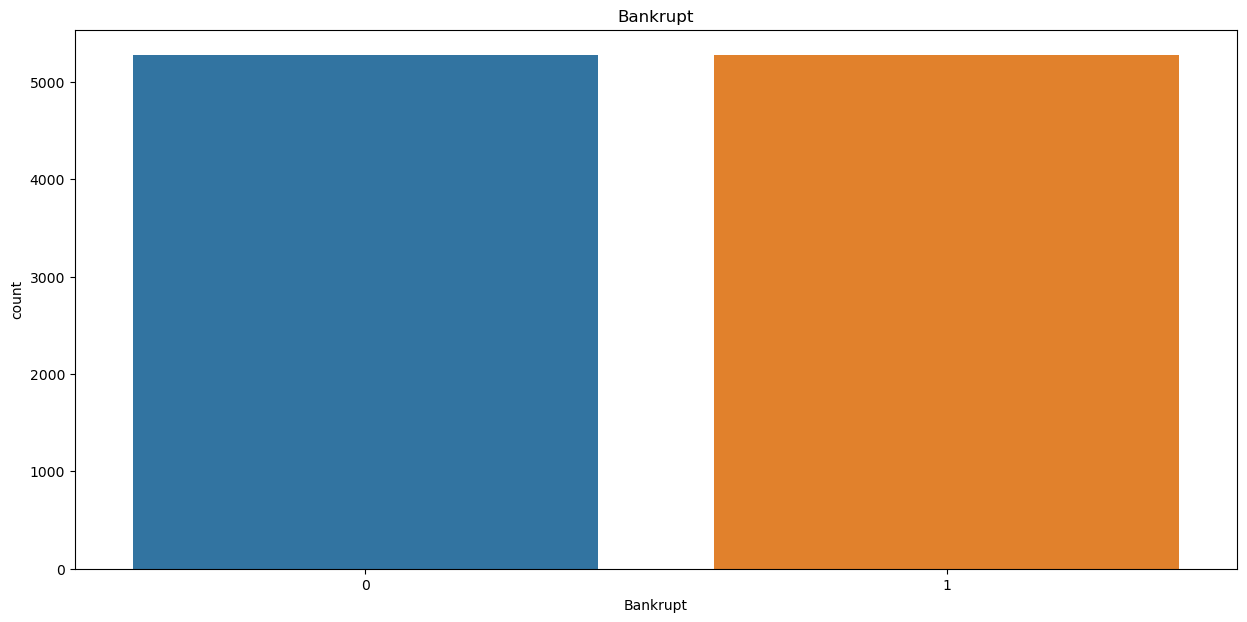

In [41]:
sns.countplot(x = y_train_smote)
plt.title('Bankrupt')

In [42]:
var_models_smote = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.4),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (LinearSVC)": LinearSVC(C = 0.3),
    "Support Vector Machine (SVC)": SVC(),
    "MLPClassifier": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(loss = "exponential"),
    "AdaBoost Classifier": AdaBoostClassifier(n_estimators = 60, learning_rate = 0.2),
    "XgBoost Classifier": XGB.XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in var_models_smote.items():
  model.fit(X_train_smote, y_train_smote)
  print(name + ' was completed.')

Logistic Regression was completed.
K-Nearest Neighbors was completed.
Decision Tree was completed.
Support Vector Machine (LinearSVC) was completed.
Support Vector Machine (SVC) was completed.
MLPClassifier was completed.
Random Forest was completed.
Gradient Boosting was completed.
AdaBoost Classifier was completed.
XgBoost Classifier was completed.
Learning rate set to 0.028168
0:	learn: 0.6600085	total: 21.6ms	remaining: 21.6s
1:	learn: 0.6293154	total: 37.3ms	remaining: 18.6s
2:	learn: 0.6006204	total: 54.1ms	remaining: 18s
3:	learn: 0.5681073	total: 68.9ms	remaining: 17.1s
4:	learn: 0.5446183	total: 82.5ms	remaining: 16.4s
5:	learn: 0.5224789	total: 96.1ms	remaining: 15.9s
6:	learn: 0.5014554	total: 110ms	remaining: 15.6s
7:	learn: 0.4819357	total: 124ms	remaining: 15.4s
8:	learn: 0.4671947	total: 137ms	remaining: 15.1s
9:	learn: 0.4516618	total: 152ms	remaining: 15s
10:	learn: 0.4363990	total: 165ms	remaining: 14.9s
11:	learn: 0.4204778	total: 179ms	remaining: 14.7s
12:	learn: 0.

154:	learn: 0.1101405	total: 1.83s	remaining: 9.97s
155:	learn: 0.1096719	total: 1.84s	remaining: 9.95s
156:	learn: 0.1091900	total: 1.85s	remaining: 9.94s
157:	learn: 0.1087104	total: 1.86s	remaining: 9.93s
158:	learn: 0.1084772	total: 1.87s	remaining: 9.91s
159:	learn: 0.1080205	total: 1.89s	remaining: 9.9s
160:	learn: 0.1076770	total: 1.9s	remaining: 9.89s
161:	learn: 0.1071339	total: 1.91s	remaining: 9.88s
162:	learn: 0.1066877	total: 1.92s	remaining: 9.86s
163:	learn: 0.1062981	total: 1.93s	remaining: 9.85s
164:	learn: 0.1057337	total: 1.94s	remaining: 9.83s
165:	learn: 0.1053366	total: 1.95s	remaining: 9.82s
166:	learn: 0.1048569	total: 1.97s	remaining: 9.81s
167:	learn: 0.1044417	total: 1.98s	remaining: 9.79s
168:	learn: 0.1041594	total: 1.99s	remaining: 9.78s
169:	learn: 0.1036806	total: 2s	remaining: 9.76s
170:	learn: 0.1030093	total: 2.01s	remaining: 9.75s
171:	learn: 0.1026062	total: 2.02s	remaining: 9.73s
172:	learn: 0.1023114	total: 2.03s	remaining: 9.72s
173:	learn: 0.101

320:	learn: 0.0602983	total: 3.71s	remaining: 7.84s
321:	learn: 0.0600325	total: 3.72s	remaining: 7.83s
322:	learn: 0.0598456	total: 3.73s	remaining: 7.82s
323:	learn: 0.0595536	total: 3.74s	remaining: 7.81s
324:	learn: 0.0593157	total: 3.75s	remaining: 7.79s
325:	learn: 0.0590928	total: 3.76s	remaining: 7.78s
326:	learn: 0.0589695	total: 3.77s	remaining: 7.77s
327:	learn: 0.0587639	total: 3.79s	remaining: 7.76s
328:	learn: 0.0585873	total: 3.8s	remaining: 7.74s
329:	learn: 0.0583614	total: 3.81s	remaining: 7.73s
330:	learn: 0.0581481	total: 3.82s	remaining: 7.72s
331:	learn: 0.0579512	total: 3.83s	remaining: 7.71s
332:	learn: 0.0578317	total: 3.84s	remaining: 7.69s
333:	learn: 0.0576523	total: 3.85s	remaining: 7.68s
334:	learn: 0.0574334	total: 3.86s	remaining: 7.67s
335:	learn: 0.0571403	total: 3.87s	remaining: 7.66s
336:	learn: 0.0570022	total: 3.88s	remaining: 7.64s
337:	learn: 0.0567635	total: 3.9s	remaining: 7.63s
338:	learn: 0.0566382	total: 3.91s	remaining: 7.62s
339:	learn: 0.

486:	learn: 0.0354055	total: 5.61s	remaining: 5.9s
487:	learn: 0.0352847	total: 5.62s	remaining: 5.89s
488:	learn: 0.0351893	total: 5.63s	remaining: 5.88s
489:	learn: 0.0351101	total: 5.64s	remaining: 5.87s
490:	learn: 0.0350441	total: 5.65s	remaining: 5.86s
491:	learn: 0.0349631	total: 5.66s	remaining: 5.85s
492:	learn: 0.0348632	total: 5.68s	remaining: 5.84s
493:	learn: 0.0347704	total: 5.69s	remaining: 5.83s
494:	learn: 0.0345985	total: 5.7s	remaining: 5.82s
495:	learn: 0.0344809	total: 5.71s	remaining: 5.8s
496:	learn: 0.0344096	total: 5.72s	remaining: 5.79s
497:	learn: 0.0342519	total: 5.74s	remaining: 5.78s
498:	learn: 0.0341397	total: 5.75s	remaining: 5.77s
499:	learn: 0.0340007	total: 5.76s	remaining: 5.76s
500:	learn: 0.0338597	total: 5.77s	remaining: 5.75s
501:	learn: 0.0337366	total: 5.78s	remaining: 5.74s
502:	learn: 0.0336232	total: 5.8s	remaining: 5.73s
503:	learn: 0.0334947	total: 5.81s	remaining: 5.72s
504:	learn: 0.0334193	total: 5.82s	remaining: 5.71s
505:	learn: 0.03

645:	learn: 0.0225266	total: 7.47s	remaining: 4.09s
646:	learn: 0.0224556	total: 7.48s	remaining: 4.08s
647:	learn: 0.0223529	total: 7.49s	remaining: 4.07s
648:	learn: 0.0223028	total: 7.5s	remaining: 4.06s
649:	learn: 0.0222355	total: 7.51s	remaining: 4.04s
650:	learn: 0.0222051	total: 7.52s	remaining: 4.03s
651:	learn: 0.0221437	total: 7.54s	remaining: 4.02s
652:	learn: 0.0220956	total: 7.55s	remaining: 4.01s
653:	learn: 0.0220576	total: 7.56s	remaining: 4s
654:	learn: 0.0219769	total: 7.57s	remaining: 3.99s
655:	learn: 0.0218743	total: 7.58s	remaining: 3.97s
656:	learn: 0.0218022	total: 7.59s	remaining: 3.96s
657:	learn: 0.0217322	total: 7.6s	remaining: 3.95s
658:	learn: 0.0216952	total: 7.61s	remaining: 3.94s
659:	learn: 0.0216604	total: 7.62s	remaining: 3.93s
660:	learn: 0.0215866	total: 7.64s	remaining: 3.92s
661:	learn: 0.0215198	total: 7.65s	remaining: 3.9s
662:	learn: 0.0214646	total: 7.66s	remaining: 3.89s
663:	learn: 0.0213764	total: 7.67s	remaining: 3.88s
664:	learn: 0.0213

814:	learn: 0.0149614	total: 9.37s	remaining: 2.13s
815:	learn: 0.0149129	total: 9.38s	remaining: 2.12s
816:	learn: 0.0148729	total: 9.39s	remaining: 2.1s
817:	learn: 0.0148549	total: 9.4s	remaining: 2.09s
818:	learn: 0.0148095	total: 9.41s	remaining: 2.08s
819:	learn: 0.0147922	total: 9.42s	remaining: 2.07s
820:	learn: 0.0147327	total: 9.44s	remaining: 2.06s
821:	learn: 0.0146825	total: 9.45s	remaining: 2.04s
822:	learn: 0.0146442	total: 9.46s	remaining: 2.03s
823:	learn: 0.0146166	total: 9.47s	remaining: 2.02s
824:	learn: 0.0145805	total: 9.48s	remaining: 2.01s
825:	learn: 0.0145404	total: 9.49s	remaining: 2s
826:	learn: 0.0144915	total: 9.5s	remaining: 1.99s
827:	learn: 0.0144358	total: 9.51s	remaining: 1.98s
828:	learn: 0.0143696	total: 9.52s	remaining: 1.96s
829:	learn: 0.0143374	total: 9.53s	remaining: 1.95s
830:	learn: 0.0143139	total: 9.54s	remaining: 1.94s
831:	learn: 0.0142941	total: 9.55s	remaining: 1.93s
832:	learn: 0.0142627	total: 9.57s	remaining: 1.92s
833:	learn: 0.0142

979:	learn: 0.0104962	total: 11.3s	remaining: 230ms
980:	learn: 0.0104751	total: 11.3s	remaining: 218ms
981:	learn: 0.0104556	total: 11.3s	remaining: 207ms
982:	learn: 0.0104344	total: 11.3s	remaining: 195ms
983:	learn: 0.0104137	total: 11.3s	remaining: 184ms
984:	learn: 0.0103886	total: 11.3s	remaining: 172ms
985:	learn: 0.0103762	total: 11.3s	remaining: 161ms
986:	learn: 0.0103448	total: 11.3s	remaining: 149ms
987:	learn: 0.0103271	total: 11.3s	remaining: 138ms
988:	learn: 0.0103077	total: 11.4s	remaining: 126ms
989:	learn: 0.0103005	total: 11.4s	remaining: 115ms
990:	learn: 0.0102891	total: 11.4s	remaining: 103ms
991:	learn: 0.0102714	total: 11.4s	remaining: 91.9ms
992:	learn: 0.0102384	total: 11.4s	remaining: 80.4ms
993:	learn: 0.0102274	total: 11.4s	remaining: 68.9ms
994:	learn: 0.0102139	total: 11.4s	remaining: 57.4ms
995:	learn: 0.0101890	total: 11.4s	remaining: 45.9ms
996:	learn: 0.0101738	total: 11.4s	remaining: 34.5ms
997:	learn: 0.0101550	total: 11.5s	remaining: 23ms
998:	le

In [43]:
var_results_smote = []

for name, model in var_models_smote.items():
  results_smote = model.score(X_test, y_test)
  var_results_smote.append(results_smote)

  print('----------     '+name+'     ----------')

  model = var_models_smote[name]
  y_test_pred_smote = model.predict(X_test)
  print(metrics.classification_report(y_test , y_test_pred_smote))
  print('Accuracy : {:0.4f}'.format(metrics.accuracy_score(y_test , y_test_pred_smote))) 
  print('AUC : {0:0.4f}'.format(metrics.roc_auc_score(y_test , y_test_pred_smote)))
  print('Precision : {0:0.4f}'.format(metrics.precision_score(y_test , y_test_pred_smote)))
  print('Recall : {0:0.4f}'.format(metrics.recall_score(y_test , y_test_pred_smote)))
  print('F1 : {0:0.4f}'.format(metrics.f1_score(y_test , y_test_pred_smote)))

----------     Logistic Regression     ----------
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1327
           1       0.16      0.78      0.27        37

    accuracy                           0.88      1364
   macro avg       0.58      0.84      0.60      1364
weighted avg       0.97      0.88      0.92      1364

Accuracy : 0.8849
AUC : 0.8358
Precision : 0.1629
Recall : 0.7838
F1 : 0.2698
----------     K-Nearest Neighbors     ----------
              precision    recall  f1-score   support

           0       0.99      0.91      0.94      1327
           1       0.14      0.54      0.22        37

    accuracy                           0.90      1364
   macro avg       0.56      0.72      0.58      1364
weighted avg       0.96      0.90      0.93      1364

Accuracy : 0.8966
AUC : 0.7235
Precision : 0.1389
Recall : 0.5405
F1 : 0.2210
----------     Decision Tree     ----------
              precision    recall  f1-score   

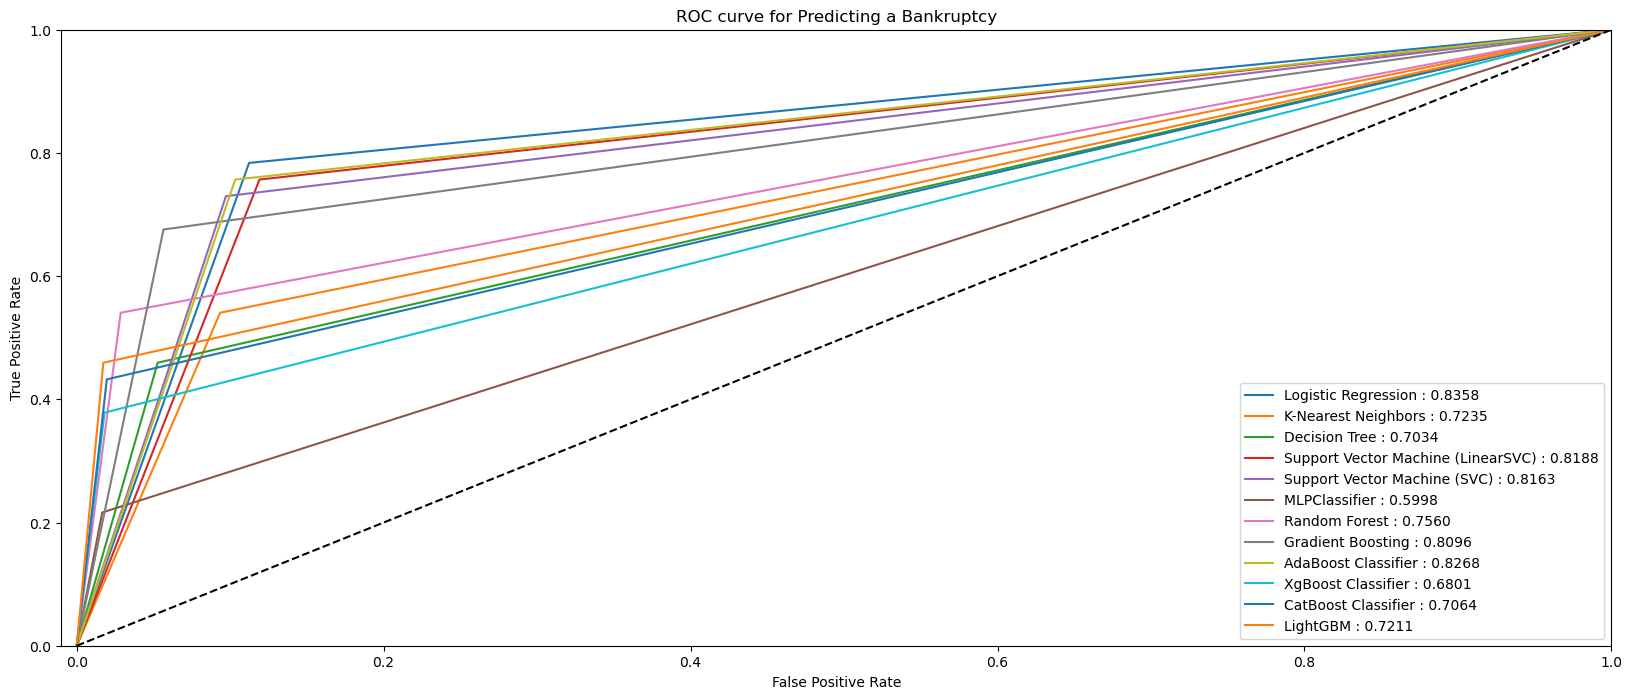

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)

for i in var_models_smote:
    y_pred = var_models_smote[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision, recall, th = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= i + ' : {:.4f}'.format(roc_auc_score(y_test, y_pred)))

plt.plot([0,1], [0,1], 'k--' )
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Predicting a Bankruptcy')
plt.legend(loc=4)
plt.show()

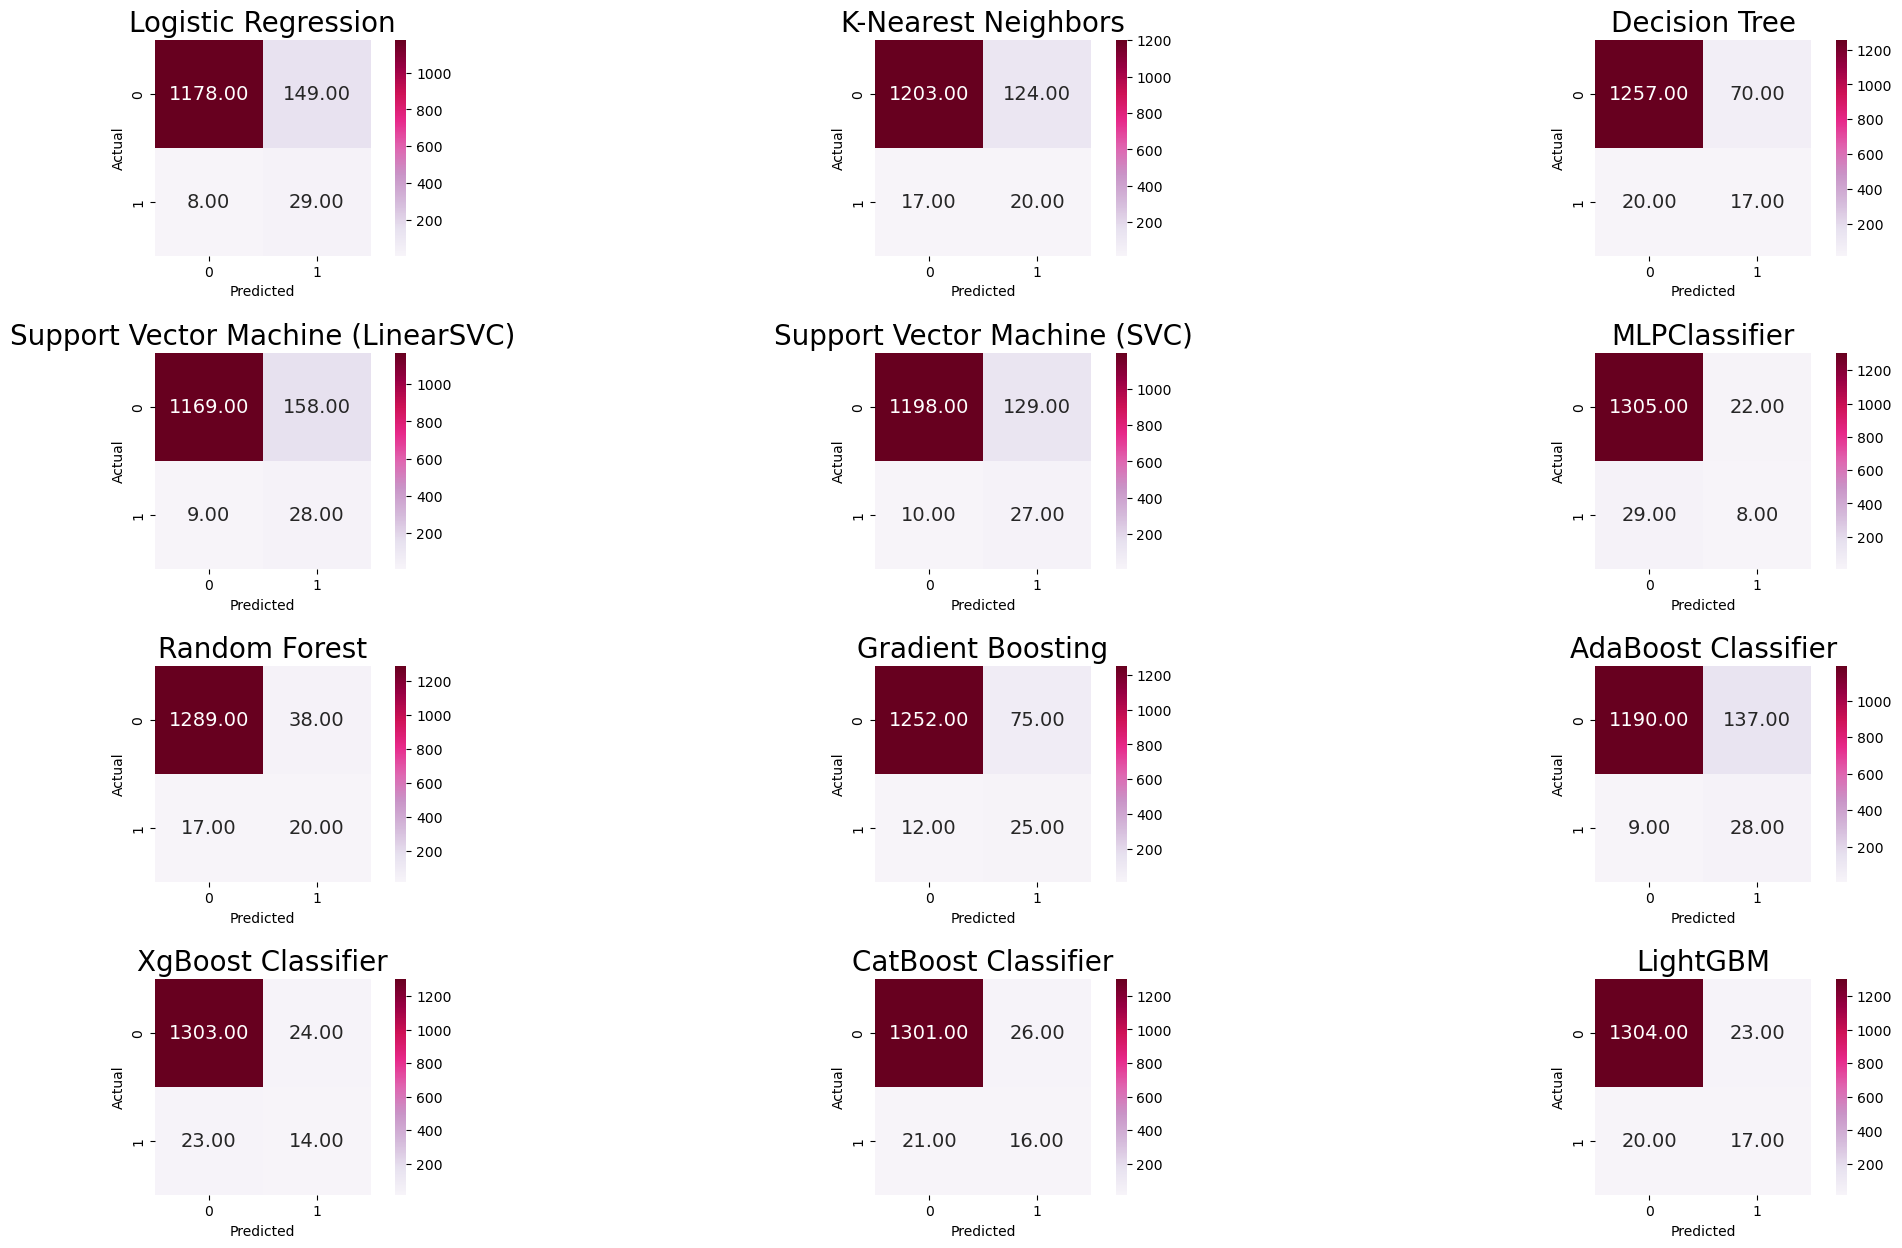

In [45]:
a = 1

fig = plt.figure(figsize=(25,15))

for name, model in var_models_smote.items():
    results = model.score(X_test, y_test)
    model = var_models_smote[name]
    y_test_pred = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred}

    conf_mx = confusion_matrix(y_test, y_test_pred)

    heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm.index.name = 'Actual'
    heat_cm.columns.name = 'Predicted'

    plt.subplot(4, 3, a)
    fig.subplots_adjust(wspace=0.45, hspace= 0.45)
    sns.heatmap(heat_cm, annot=True, fmt='.2f', square=True, annot_kws={"size": 14}, cmap = 'PuRd').set_title(name, fontsize = 20)
    a = a + 1

plt.show()

In [46]:
#mlp = MLPClassifier()

#params = [{'activation':['tanh','identity','logistic','relu'],'alpha': np.logspace(0.001,0.01,num=100),'solver': ['lbfgs','sgd','adam']}]
          
#grd = GridSearchCV(estimator=mlp,param_grid=params,cv=3)

#grd_model = grd.fit(xtrain,ytrain)
          
#grd_model.best_params_

In [47]:
#  The result of GridSearchCV is giving the following results:
# 'activation': 'tanh', 'alpha': 1.0058783356953453, 'solver': 'sgd'

In [48]:
# At this point, we can say lightbgm and RandomForest is giving good result compare to others..
# so we will look into feature importance in this model.
rf = RandomForestClassifier()
rf_model= rf.fit(X_train_smote, y_train_smote)
rf_model.feature_importances_

array([3.74602672e-02, 1.03540956e-02, 2.67034531e-02, 4.67215720e-03,
       4.42390640e-03, 8.36454175e-03, 9.75112314e-03, 1.08839285e-02,
       5.60466102e-02, 3.83199978e-02, 3.00402543e-03, 5.01647116e-03,
       5.54066528e-03, 1.74259663e-05, 3.14170475e-03, 5.23776074e-03,
       1.14652090e-02, 5.57041953e-03, 5.54168967e-02, 4.86501000e-03,
       0.00000000e+00, 7.90525766e-03, 3.06288926e-02, 4.58197272e-03,
       4.24003460e-03, 4.15151604e-03, 3.56634148e-03, 5.48841705e-03,
       9.97016754e-03, 1.18265992e-05, 4.29919518e-03, 3.57982270e-03,
       0.00000000e+00, 3.25514607e-05, 2.07461405e-02, 8.91716649e-04,
       3.01476931e-02, 2.91584988e-02, 4.65217527e-03, 4.20827616e-02,
       5.35883254e-03, 4.10228275e-03, 2.55250195e-02, 4.49690842e-03,
       7.05672478e-03, 2.23322698e-04, 2.52946898e-06, 4.95685732e-03,
       5.11469383e-03, 4.67857766e-03, 7.60022992e-03, 9.67137844e-03,
       3.70609366e-06, 4.15986297e-03, 4.47563973e-03, 3.93491184e-03,
      

In [49]:
importances = pd.DataFrame({'Features':data.drop('Bankrupt', axis=1).columns, 'Feature Importances': rf_model.feature_importances_})
importances

Features  Feature Importances
0    ROA(C) before interest and depreciation befor...             0.037460
1              ROA(A) before interest and % after tax             0.010354
2    ROA(B) before interest and depreciation after...             0.026703
3                              Operating Gross Margin             0.004672
4                         Realized Sales Gross Margin             0.004424
..                                                ...                  ...
89                 Net Income to Stockholder's Equity             0.026898
90                                Liability to Equity             0.023862
91                 Degree of Financial Leverage (DFL)             0.015129
92   Interest Coverage Ratio (Interest expense to ...             0.032976
93                                Equity to Liability             0.017847

[94 rows x 2 columns]

In [50]:
imp = importances.sort_values(by='Feature Importances',ascending=False)
imp

Features  Feature Importances
8    Non-industry income and expenditure/revenue             0.056047
18       Persistent EPS in the Last Four Seasons             0.055417
68                    Total income/Total expense             0.046383
85                    Net Income to Total Assets             0.045746
39                          Borrowing dependency             0.042083
..                                           ...                  ...
52                    Allocation rate per person             0.000004
46                       Average Collection Days             0.000003
32                                 Current Ratio             0.000000
57                Quick Assets/Current Liability             0.000000
20                     Revenue Per Share (Yuan �             0.000000

[94 rows x 2 columns]

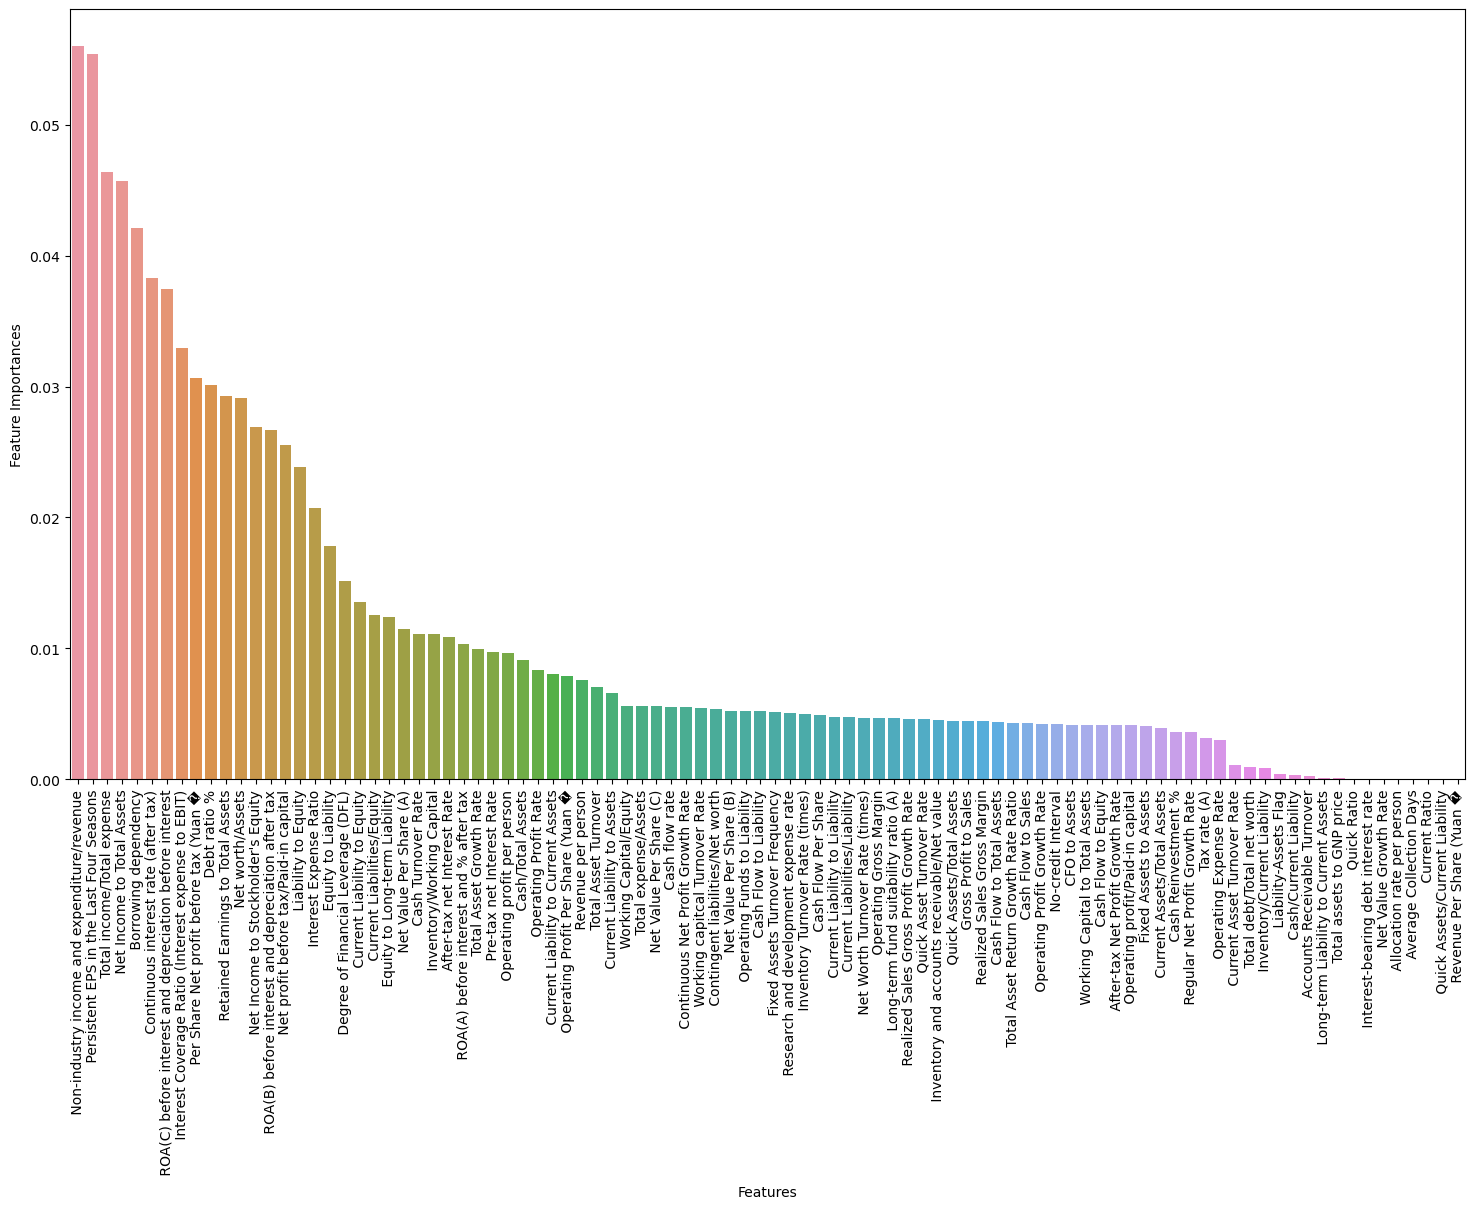

In [51]:
plt.figure(figsize=(18,10))
sns.barplot(y='Feature Importances',x='Features',data=imp)
plt.xticks(rotation=90)
plt.show()

In [52]:
imp['Features'][0:9].values

array([' Non-industry income and expenditure/revenue',
       ' Persistent EPS in the Last Four Seasons',
       ' Total income/Total expense', ' Net Income to Total Assets',
       ' Borrowing dependency', ' Continuous interest rate (after tax)',
       ' ROA(C) before interest and depreciation before interest',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Per Share Net profit before tax (Yuan �'], dtype=object)

In [53]:
xg = XGB.XGBClassifier()
xg_model= xg.fit(X_train_smote, y_train_smote)
xg_model.feature_importances_

array([0.00216257, 0.00532018, 0.0135829 , 0.00512425, 0.00074378,
       0.00106228, 0.00765329, 0.01785356, 0.04412973, 0.21478865,
       0.00370574, 0.00624844, 0.00705999, 0.        , 0.01117033,
       0.00387807, 0.00057104, 0.00168167, 0.0679729 , 0.00247477,
       0.00393111, 0.00441937, 0.00633167, 0.00251564, 0.00205026,
       0.00439271, 0.00187663, 0.00288911, 0.00663563, 0.        ,
       0.0033408 , 0.00544765, 0.        , 0.        , 0.05384963,
       0.03273252, 0.10381296, 0.        , 0.00340826, 0.02821977,
       0.01133347, 0.00348903, 0.00229014, 0.00231166, 0.00771923,
       0.        , 0.        , 0.0066524 , 0.00488575, 0.00059857,
       0.00494856, 0.01389257, 0.        , 0.00414958, 0.00193686,
       0.00214583, 0.00415807, 0.        , 0.00657846, 0.00641559,
       0.01359325, 0.00742518, 0.00552385, 0.00489821, 0.00475164,
       0.00429989, 0.        , 0.01718016, 0.00250484, 0.0034571 ,
       0.00125837, 0.00467761, 0.00698066, 0.01047576, 0.00442

In [54]:
imprtances = pd.DataFrame({'Feature':data.drop('Bankrupt', axis=1).columns, 'Feature Importance': xg_model.feature_importances_})
imprtances

Feature  Feature Importance
0    ROA(C) before interest and depreciation befor...            0.002163
1              ROA(A) before interest and % after tax            0.005320
2    ROA(B) before interest and depreciation after...            0.013583
3                              Operating Gross Margin            0.005124
4                         Realized Sales Gross Margin            0.000744
..                                                ...                 ...
89                 Net Income to Stockholder's Equity            0.063106
90                                Liability to Equity            0.010220
91                 Degree of Financial Leverage (DFL)            0.004959
92   Interest Coverage Ratio (Interest expense to ...            0.005215
93                                Equity to Liability            0.000445

[94 rows x 2 columns]

In [55]:
impr = imprtances.sort_values(by='Feature Importance',ascending=False)
impr

Feature  Feature Importance
9       Continuous interest rate (after tax)            0.214789
36                              Debt ratio %            0.103813
18   Persistent EPS in the Last Four Seasons            0.067973
89        Net Income to Stockholder's Equity            0.063106
34                    Interest Expense Ratio            0.053850
..                                       ...                 ...
76            Current Liability to Liability            0.000000
45              Accounts Receivable Turnover            0.000000
46                   Average Collection Days            0.000000
52                Allocation rate per person            0.000000
32                             Current Ratio            0.000000

[94 rows x 2 columns]

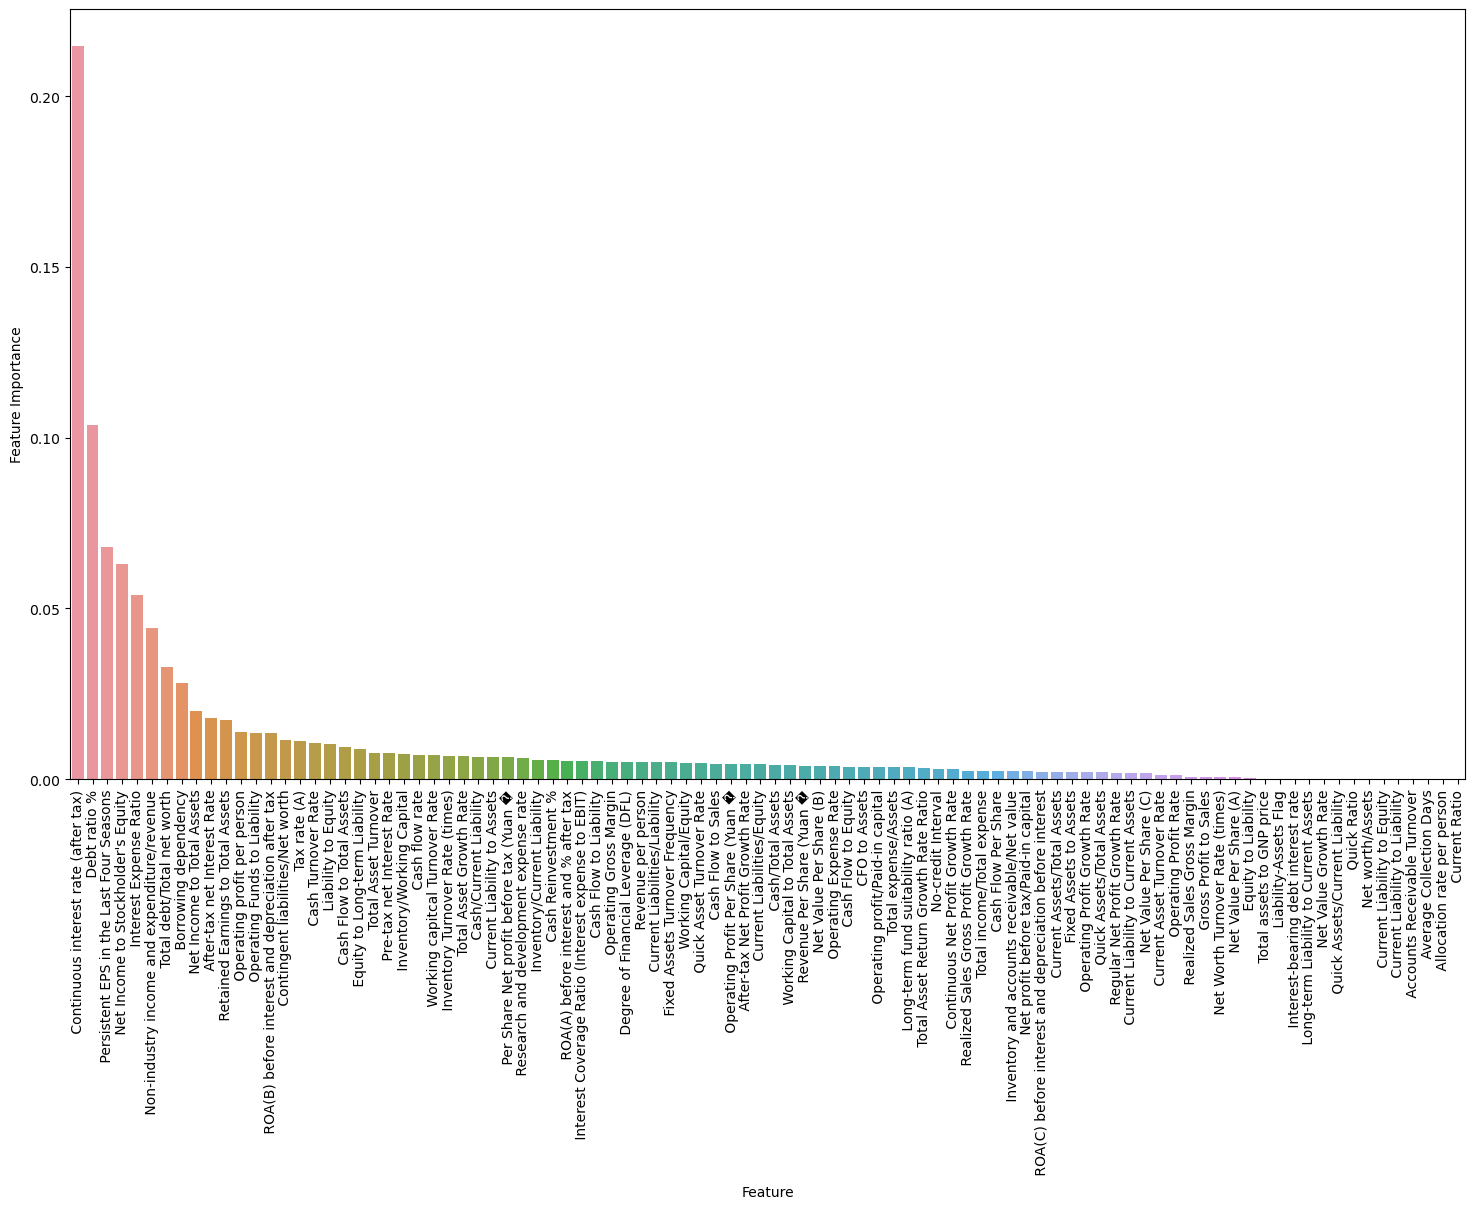

In [56]:
plt.figure(figsize=(18,10))
sns.barplot(y='Feature Importance',x='Feature',data=impr)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# As a result (Final Model) we can take anyone ensemble method( Random Forest , XGBoost) with smote technique and logarithmic 
# Transformation to get more accurate result. and less number of error %.


In [57]:
# The above cell's varibale are some of the most important factors which result in the bankruptcy of a company/organisation.